## Lectuer-7 Information Retrieval

In [1]:
file_base = "/Users/mqgao/Workspace/GuangzhouFastPrint/crawler/data/texts"

In [3]:
import os

In [5]:
len(os.listdir(file_base))

7019

### Task, build a search engine, input: some words, output are the documents.

In [6]:
"2.5 GHz Intel Core i7"

'2.5 GHz Intel Core i7'

In [11]:
(280000000 * 2) / 10**9

0.56

In [13]:
import jieba

In [17]:
def cut(string): return ' '.join(jieba.cut(string))

In [18]:
import os

In [19]:
corpus = [
    cut(open(os.path.join(file_base, f)).read()) for f in os.listdir(file_base)
]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [22]:
vectorizer.fit_transform(corpus)

<7019x57366 sparse matrix of type '<class 'numpy.float64'>'
	with 675686 stored elements in Compressed Sparse Row format>

In [27]:
min(vectorizer.vocabulary_.values())

0

In [28]:
max(vectorizer.vocabulary_.values())

57365

In [31]:
tfidf = vectorizer.fit_transform(corpus)

In [34]:
transposed_tfidf = tfidf.transpose()

In [35]:
transposed_tfidf

<57366x7019 sparse matrix of type '<class 'numpy.float64'>'
	with 675686 stored elements in Compressed Sparse Column format>

In [38]:
import numpy as np

In [48]:
transposed_tfidf_array = transposed_tfidf.toarray()

In [60]:
transposed_tfidf_array.shape

(57366, 7019)

In [59]:
np.where(transposed_tfidf_array[6])

(array([1618]),)

In [61]:
def get_word_id(word):
    return vectorizer.vocabulary_.get(word, None)

In [65]:
get_word_id('上海')

16440

In [120]:
from functools import reduce

In [121]:
from operator import and_

In [123]:
and_({1, 2}, {2, 3})

{2}

In [132]:
import re

In [201]:
def search_enginer(query):
    candidates_ids = get_candidates_ids(query)
    
    v1 = vectorizer.transform([cut(query)]).toarray()[0]
    
    candidates = [set(np.where(transposed_tfidf_array[_id])[0]) for _id in candidates_ids]
    
    merged_candidates = reduce(and_, candidates)
    
    pat = re.compile(get_candidates_pat(query))
    
    vector_with_id = [(tfidf[i], i) for i in merged_candidates]
    
    sorted_vector_with_ids = sorted(vector_with_id, key=lambda x: cosine(x[0].toarray(), v1))

    sorted_ids = [i for v, i in sorted_vector_with_ids]
    
    for c in merged_candidates:
        output = pat.sub(repl='** \g<1> ** ', string=corpus[c])
        yield ''.join(output.split())

<text hidden=True> Some Test </text>

In [209]:
with open('/Users/mqgao/Downloads/sz_result.md', 'w') as f:
    for i, document in enumerate(search_enginer('叠层 设计')):
        f.write('## search result {}\n'.format(i))
        f.write(document+'\n')
    print('done!')

done!


In [207]:
"my name is {name}, and my age is {age}".format(name="Jhon", age=18)

'my name is Jhon, and my age is 18'

In [208]:
"my name is {name}, and my age is {age}".format(**{"name":"Jhon", "age":18})

'my name is Jhon, and my age is 18'

## search result 0
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 1
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 2
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 3
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 4
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 5
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 6
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 7
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 8
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 9
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 10
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 11
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 12
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 13
深圳市鑫益城**机械**模具有限**公司**主要以**制造**精密FPC/PCB线路板模具、LED铝基线路板、铝/铜/铁基板模具为主，**公司**拥有先进的生产设备与专业的技术人员，以严格科学的管理为广大客户提供优质的线路板模具服务。本**公司**目前有日本沙迪AQ400L/AQ535L系列慢走丝、台湾台群850电脑锣、CNC数控钻、WireCut线割机、冲床、台湾建德大水磨床、旺磐精密小磨床、侧面铣、铣床、钻床等**制造**设备，并配有高精度检测仪器，结合韩国、日本模具总结出一套符合国际质量标准的高档线路板模具**制造**经验。**公司**全力推行ISO9001：2008版，严格按照标准化的流程作业。现有员工40余人，月生产能力达到200套以上。竭诚希望能与国内大中小型线路板企业合作，共创美好的明天！欢迎新老客户来厂参观考察。
## search result 14
引言20多年来，国内外电子设计/**制造**业正在发生一场由高档集成电路(IntegratedCircuit，IC)芯片、高速印制电路板(PrintedCircuitBoard，PCB)和电子设计自动化(ElectronicDesignAutomation，EDA)技术引发的变革。在电子**制造**业，PCB作为电子产品的子系统，扮演着核心模块单元的角色。据统计，电子产品的设计周期占整个研制生产周期的60%以上;而成本的80%～90%又是在芯片和PCB子系统设计环节决定的。PCB设计/**制造**数据由电子设计师用EDA工具生成，包括PCB的光绘制版(fabrication)、组装(assembly)和测试(test)等各个环节。PCB数据格式标准是规范PCB版图设计的一种描述式语言，用来实现EDA工具或设计师之间的数据传递、原理图和版图之间的数据交换以及设计与**制造**测试之间的无缝衔接等。Gerber是事实上的PCB数据工业标准，仍在广泛应用。从1970年问世的Gerber原型到1992年的Gerber274X，虽经不断改良，但对于日趋复杂的设计，一些与PCB加工和组装的相关信息在Ger2ber格式中仍无法表达或包含，例如PCB板料类型、介质厚度及工艺过程参数等。尤其是Gerber文件交到PCB加工者以后，通过检查光绘效果，常常会发现设计规则冲突等问题，这时必须返回设计部门重新生成Gerber文件，再进行PCB的加工。这类返工耗费了研制周期的30%，其症结在于Gerber属于单向数据传送，不能进行双向数据交换。Gerber退出PCB格式的主流圈已成定势，但是由哪一个来取代Gerber成为PCB数据新一代的标准，目前尚无定论。国外正在积极酝酿策划新的PCB数据交换标准，三个公认候选格式是:美国封装互连协会(InstituteforPackagingandInterconnect，IPC)的GenCAM(genericcomputeraidedmanufacturing)、Val2or的ODB++和美国电子工业协会(ElectronicIndus2triesAssociation，EIA)的EDIF400。之所以兴师动众研究标准，是因为近年来由于数据交换的不当，已经造成数百万美元的损失。据报道，每年有超过3%的印制板加工费用浪费在处理和验证数据上。换言之，每年对整个电子行业造成的浪费竟高达数十亿美元!除了直接的浪费，由于数据不标准，设计方和**制造**方之间反复的交互也消耗了大量的精力和时间。对于低利润率的电子**制造**业，这又是一笔无形的开销。IPCGenCAMGenCAM是IPC研究开发的一种PCB设计/**制造**数据交换标准蓝本，而IPC是美国国家标准局(ANSI)认可的PCB方面的标准化研究机构。Gen-CAM的正式文件命名为IPC-2511，包含IPC-2510系列的几个子标准(IPC-2512～IPC-2518)。IPC-2510系列标准基于GenCAD格式(由Mitron**公司**推出)，各子标准间呈互为依存关系。该标准的文件包括了板型、焊盘、贴片、插装、板内信号线等信息，几乎所有PCB加工的信息都可以从GenCAM的参数中获取。GenCAM的文件结构使设计师和**制造**工程师都能访问数据。在向**制造**方输出的数据中，还可以扩展数据，例如添加加工过程允许的容差、为面板**制造**给出多种信息等。GenCAM采用ASCⅡ格式，支持14种图形符号。GenCAM一共包括20个信息节，详细描述设计要求和**制造**细节。每一节表达一个功能或一项作业。每一节在逻辑上是独立的，都可以作为一个单独文件。GenCAM的20个信息节是:文件头(header)、订货信息(administratio)、基元(primitives)、图形(artworks)、层(layers)、压焊块(pad-stacks)、模板库(patterns)、封装及库(packages)、元件序列(families)、器件(devices)、**机械**信息(mechani2cals)、元件(components)、布线(routes)、电源/地(power)、测试点(testconnects)、板信息(boards)、**制造**组装控制(panels)、放置(flxtures)、绘制(drawings)以及变更(changes)等。GenCAM允许且只允许上述20个信息节在文件中出现一次，通过组合的变化向**制造**工序提供不同的信息。GenCAM保留了信息语义的层次和结构，每个**制造**设备只处理与其作业相关的信息节内容。GenCAM2.0以前版本的文件符合巴科斯范式(BNF)规则。GenCAM2.0版本采用了XML文件格式标准和XML方案，但IPC-2511A中根本的信息模型几乎没有改变，新版本只是改写了信息的组织方式，而信息的内容未变。目前，已有不少EDA和PCB的CAM软件商支持GenCAM作为数据交换格式。这些EDA**公司**中有Mentor，Cadence，Zuken，OrCAD，PADS及Veribest等;而PCB的CAM软件商中有ACT，IGI，Mitron，RouterSolutions，WiseSoftware及GraphiCode等。ValorODB++开放数据库(OpenDataBase，ODB++)由以色列Valor计算系统**公司**推出，它允许将面向**制造**的设计(DFM)规则体现在设计过程之中。ODB++采用可扩展的ASCⅡ格式，可在单个数据库中保存PCB**制造**和装配所必须的全部工程数据。单个数据库包含图形、钻孔信息、布线、元件、网表、规格、绘图、工程处理定义、报表功能、ECO和DFM结果等。设计师在进行DFM设计时可以更新这些数据库，以便在装配之前发现潜在的布局布线问题。ODB++是一种双向格式，允许数据的下传和上行。一旦设计数据以ASCⅡ形式传至PCB板加工车间，加工者就可顺利实施流程操作，如蚀刻补偿、面板成像、输出钻孔、布线和照相等。ODB++采用比较智能的显式结构，具体措施有：①包括了阻抗、镀金/非镀金过孔、特定过孔连接板层等更多的系统属性；②采用所见即所得(WYSIWYG)的信息描述方式以消除模糊不清的信息描述；③所有对象的属性处于单特征级别上；④独一无二的板层和次序定义；⑤精确的器件封装和管脚建模；⑥支持元器件清单(BOM)数据的嵌入。ODB++采用一种标准的文件结构，它将一个设计表示为一个文件路径树，设计文件夹下包含一系列相关设计信息的子文件夹。该路径树可在不同系统间移植而不丢失数据。与单一大文件相比，在对文件进行读写操作时，该树结构允许设计中的某些数据被单独读写而无需读写整个大文件。ODB++文件路径树的13个层次分别为多层步(steps)、多步矩阵(matrix)、步内符号(symbols)、层叠(stackups)、工作定义表(workforms)、工作流程(workflows)、属性(attributes)、孔径表(wheels)、接受多输入(input)、输出(output)多种设备格式、用户自定义(user)、第三方扩展(extension)及日志(log)等。一个普通的ODB++设计，在上述文件夹中最多可包含53种设计文件，在ODB++库设计中还另外包含2种文件。ODB++共支持26种标准图形符号。由于PCB设计的特殊性，数据库中有一些大文件不适于结构化的存储方式。为此，ODB++采用了行记录文本的文件方式，每一行均包括多个信息位，之间以空格分开。文件中行的顺序很重要，特定行可以要求后续行必须遵守某种顺序形式。每一行行首的字符又可以定义该行所描述信息的类型。Valor于1997年向公众发布ODB++；2000年推出支持XML标准的ODB++(X)1.0版本；2001年发布了ODB++(X)3.1A版本。ODB++(X)改写了ODB++的信息组织方式，目的是更方便设计与**制造**间的数据交换，而其信息模型并没有太大改变。一个ODB++(X)文件包含六大子元素，即内容(ODX-CONTENTS)、物料清单(ODX-BOM)、授权厂商(ODX-AVL)、辅助设计(ODX-CAD)、供应信息(ODX-LOGISTICS-HEADER)及变更(ODX-HISTORYREC)等，以构成一个高级元素(ODX)。EDA软件商，如Cadence，Mentor，PADS，VeriBest和Zuken等，已经开始支持ODB++/ODB++(X)。PCB的CAM软件商，如Mitron，FABmaster，Unicam和Graphic等也已经采纳了ODB++技术。这些软件**公司**间组成了Valor用户联盟，只要将EDA数据交换中性文件进行处理，就可以形成设备驱动程序、检测程序等。EIAEDIF400电子设计交换格式(ElectronicDesignInterchangeFormat，EDIF)由EIA制定并发布。它实际是一种建模的语言描述方案。EDIF采用BNF描述方式，是一种结构化的ASCⅡ文本文件。EDIF300以后的版本均采用了EXPRESS3信息建模语言。EDIF300描述的信息分为层次信息、连通性信息、库信息、图形信息、可实例化对象信息、设计管理信息、模块行为信息、仿真信息以及注释信息等部分。EIA于1996年发布了新版本EDIF400。除了EDIF300所具有的支持原理图(schematics)和连通性(connectivity)的能力外，EDIF400新增了对印制电路板和多芯片模块(MCM)的工艺装配的描述手段。在PCB设计与**制造**间出现的许多问题，包括Gerber数据的校准、不一致的数据格式、错误的元器件库调用和提供电子数据的方式等，EDIF400都给出了比较好的解决方案。它把EDA工具生成的单一实体(entities)数据，变换成**制造**组装过程所需的多种信息。包括Mentor和Candence在内的许多EDA开发商都已经正式采用EDIF400。其他PCB数据交换格式除了上述Gerber，GenCAM，ODB++以及EDIF400外，还有一些在用的PCB数据交换标准，它们是：①原始图形交换规格(InitialGraphicsExchangeSpecification，GES)———ANSI标准，用于三维立体几何模型和工程描述，包括技术描述、工程图形、电子设计数据、**制造**设计数据和数控信息等；②产品模型数据交换标准(STEP)———ISO标准，其最终目的是取代所有现存的国际设计/**制造**数据交换标准；③硬件描述语言(VHSICHardwareDescriptionLanguage，VHDL)———IEEE标准，用于定义数字电路系统的功能和逻辑结构关系，也可以对PCB进行行为和逻辑结构描述；④DPF和BARCO格式———IPC-D-351标准;⑤EIA494-CNC格式———IPC-D-352标准；⑥IDF2.0和IDF3.0格式———IPC-D-356，IPC-D-355标准；⑦INCASES格式(SULTAN)———IEC1182-10标准。PCB数据交换技术及标准化当前，在EDA软件、CAM设备经历巨大变革的同时，有专家称，在PCB产品数据交换领域的进展已滞后了20多年，数据交换欠缺标准化间接导致了设计/**制造**的成本上升。改变PCB数据交换模式的迫切性现有的PCB数据标准，例如IPCD350，普遍倾向于在两个特定对象(设计工具和设计工具、设计工具和**制造**应用)之间做点对点的交换。图1可形象化地说明这种混乱局面。其中，T代表不同的工具，D代表不同的PCB数据结构，A代表不同的应用，双线箭头表示点对点的PCB数据交换。EDA工具输出和**制造**应用之间多对多的映射关系，是乱象的根源。图1设计工具与**制造**应用之间点对点的交换在EDA工具T的输出端和**制造**应用设备A的输入端，如果用于交换的只有单一的PCB数据格式标准D，则将大大简化PCB的信息交换(如图2)。图2设计工具与**制造**应用之间理想的单一PCB数据转换PCB数据格式的竞争在PCB数据交换格式标准化的进程中，最激烈的竞争在GenCAM和ODB++之间展开。Valor表示愿意把ODB++捐赠给IPC，并提议该组织宣布ODB++为IPC/ANSI标准;相反，IPC要求Valor采用GenCAM作为数据标准，而将ODB++作为本地数据库。然而，Valor认为ODB++是最好的数据库，拒绝采用GenCAM。IPC认为，如果将ODB++作为一个正式标准，那么格式的升级将由Valor控制，这对PCB行业不利;Valor则认为，在推行一个数据格式时，作为**公司**行为，可能会比IPC这样的行业组织更贴近用户而体现出优势。实质上，ODB++与GenCAM二者的信息模型很相似。相比而言，GenCAM在蚀刻和润湿工艺方面不是太好，但在**制造**领域却很实用。其主要优势在于它能较好地支持电路内部测试、人工可读性强，以及拥有国际标准化组织支持与维护等。而ODB++则没有包含足够的**制造**信息、原理图以及测试固定信息，而且文件较大。目前多数EDA和CAM的软件商均同时支持这两种格式。尽管存在激烈竞争，ODB++和GenCAM的发展仍然是密不可分的。Valor是IPC的一个长期会员，ODB++和GenCAM之间的这种竞争将促使这两种格式日趋完善。PCB数据交换技术的关键以设计为源头的PCB数据交换方案和标准化进程，必须着力解决以下关键的技术问题，才能获得成功：①寻求完善的PCB单一数据结构；②研制出EDA工具的PCB输出交换器；③研制出CAM软件和**制造**设备的PCB输入交换器，以便将设计数据顺利变换成驱动设备控制数据；④征得PCB设计**制造**业各厂商的全方位认可。PCB数据交换研究和前景近年来，在PCB**制造**业影响最大的设计/**制造**数据交换研究项目是电子设计/**制造**数据交换(ElectronicCAD/CAMExchange，ECCE)和数据交换汇合项目(DataExchangeConvergenceProject，DECP)，其中，ECCE项目已经完成，DECP正在进行当中。ECCE项目由IPC和EIA两大标准化组织联合推进:IPC负责制定格式和参数标准，EIA负责建立信息模型。研究内容涉及设计/**制造**互连(EDIF400扩展应用)和CAM格式标准的筹建(IPC-2510系列)。项目实施的最终结果是使IPC发布了更加完善的GenCAM数据交换标准。DECP项目的策划者是美国国家电子**制造**促进会(NationalElectronicsManufacturingInitiative，NEMI)，参与者有IPC以及Valor**公司**;其目的是促进PCB设计/**制造**统一数据交换标准的形成。NEMI极力说服IPC和Valor实现合作，以Valor**公司**的ODB++(X)数据格式为原型，吸纳IPCGenCAM的强势部分，从而产生一个待公布的整合标准IPC-2581，并最终交由IPC维护和管理。目前，PCB行业已有数十家EDA和CAM的软件商以及供应链各环节的组织都参与到DECP中。如果在产业链各环节能够成功实施，将带来成本和研制周期的巨大收益。实现这一目标，显然是任重而道远。参与者和业界对此持谨慎的乐观态度。结束语随着PCB进入高频率、高密度阶段，促使设计师必须更多地折衷考虑测试与**制造**需求，吸纳**制造**装配方的参与和互动。这种互动的结果将频繁地改变原始设计，从而避免或减少**制造**中的错误。设计师、测试工程师、**制造**工程师都需要获得完整的数据信息，才能够进行必要的双向交流。因此，必须放弃以EDA工具输出为中心的传统交换结构，采用以数据为中心的新型模式。以数据为中心的PCB数据交换模式，呼唤着能适应各种EDA软件和**制造**设备的数据格式标准的诞生。PCB设计/**制造**数据的交换是电子设计**制造**一体化信息集成的关键，因此，制定新的PCB数据交换格式标准已经刻不容缓。目前大多数研究处于测试阶段，如DECP数据交换项目仍在继续进行。可以预见，一套统一、完善的数据交换格式标准即将问世。由于国内对这一研究活动的参与程度一直很低，推动并介入相应内容的研讨有着积极的现实意义。
## search result 15
随着电子行业的发展，电子产品得到了极其广泛的应用。电子产品功能多样化，室外应用环境也趋于复杂化，涌现出功能各异的电子产品。PCB设计朝着功能化发展，PCB作为电子元器件安装和互连使用的印制电路板必须适应当前表面安装技术（SMT）的迅速发展，现已普遍地把贴装表面安装元器件（SMD）的印制板称作表面安装印制板（SMB），它包括了较简单的单面板、较为复杂的双面印制板，也包括难度高、更为复杂的多层板。那么我们来看看为了顺应电子行业的快速发展，生产SMD中新技术有哪些发展动态。1、高精度照相底片制作技术光绘机向高精度和高速度方向发展，采用激光绘图系统代替普通光绘机，以色列Orbotech**公司**的光绘系统是其代表，过去需十多小时绘成的照相底片，现只要十分钟左右即可完成，而且精度提高，可达O.O03mm，该系统由CAM工作站，激光绘图仪和若干配套设备（如：自动上片机，自动下片机，自动显影机等）组成，并配备功能强大的软件，由于此设备价格昂贵且专业化程度高，因此已出现了激光光绘专业化**公司**。2、小孔、微孔的钻孔技术由于SMB上的金属化孔只作互连用，因此要求孔径越小越好，钻小孔和微孔需要小直径高韧性硬质合金钻头；高转速（12-16万转／分，最高已有35万转／分）、高稳定性、高精度的计算机数控钻床；能够减少钻头漂移和钻孔发热量的专用盖板、垫板材料及啄钻技术（由于板厚，一个孔需分2-3次才钻透，要求有高的重复精度）或采用激光钻孔技术钻出微孔，为了提高效率，国外已有自动上下料的数控钻床。3、微小孔的深孔镀技术一般将板厚／孔径比大于5:1的称为深孔，（实际上已高达10:1、20:1），要使整个孔径内得到镀层均匀的金属化孔是很困难的，因为孔直径小，孔深，镀液在孔内不易流动交换，易在孔壁产生气泡，因此，微小孔的深孔镀技术除采用高分散能力的镀液外，还要在电镀设备上实现孔内镀液畅通交换，这可采用强烈**机械**搅拌、振动、超声搅动和水平喷镀等技术，另外还要注意孔壁镀前处理，设法提高孔壁的湿润性。解决微小孔深孔镀的另一方法是采用化学镀加成技术，使孔壁镀层不受电力线不均匀的影响，得到孔壁均匀的化学镀层，还有采用直接电镀技术、黑孔技术等等。直接电镀有碳膜法，钯膜法和高分子导电膜法三大类。碳膜法占主导地位。直接电镀技术不仅减少污染，而且降低生产成本，简化工艺，提高层间互连质量和可靠性。1994年全世界已有250条直接电镀生产线，今后还将快速增长。黑孔化工艺是采用含碳微粒的黑孔化溶液取代化学镀铜工艺，碳粒子直径在10——20μm左右，溶液含碳量约1.35-1.43％，此溶液不含络合剂、不用甲醛，简化了工艺步骤，减少了污染，是具有发展前途的工艺，黑孔工艺过程如下：清洁（60-65℃）-->水洗-->微蚀-->水洗-->浸入黑孔化溶液中-->烘干（100-150，20分）-->微蚀去膜（30℃，30+/5秒）-->水洗-->电镀铜。4、细导线图形外观自动光学检查（AOI）技术当导线细至O.1-0.15mm时，已无法用目视检查导线上的缺口、断路、针孔、侧蚀等缺陷，必须采用自动光学检测设备，特别对多层板内层细线条，采用AOI后可有效地提高成品率，防止成品报废，因此虽然设备很贵（30万美元以上），但对于多层板生产还是合算的。AOI现已成为精细导线多层板生产中必备设备。5、裸板通断测试技术SMB给裸板测试技术带来了两个新问题：1测试点不再是金属化孔而是焊盘，要求采用适于表面安装测试用的插针。2由于裸板测试网络从2.54mm缩小到1.27、0.635mm，使针床上测试针过于密集，不少插针处于斜向状态，裸板测试愈来愈困难，设备愈来愈复杂，价格愈来愈昂贵（30万美元以上），有美国TRACE**公司**9090系列、Probot**公司**的Six-D系列以及MANIA**公司**、TiborDarvas**公司**、CircuitLine等**公司**的产品，近年来，英国BSL**公司**和美国Probot**公司**推出了不用针床的移动探针测试方法和设备（约20万美元），有立式和平放式两种。6、真空层压技术为了彻底解决多层板压制工艺中产生气泡的问题，提高层间粘合力，采用真空层压技术是必然趋势，除了真空层压机之外，也可采用较为简单的真空框架实现真空层压。7、高精度、高密度、细线条成像技术为了**制造**高精度、高密度细线条，首先要解决光致抗蚀剂问题，最近有如下四个方面的进展（1）干膜向薄型，无Mylar覆盖膜，高速感光和专用途方向发展。（2）使用液态光致抗蚀抗电镀印料（也称湿膜）（3）电沉积（ED）抗蚀剂和生产线采用电沉积抗蚀剂是目前制作细导线的先进PCB工艺，一般工艺过程是：表面准备（除去表面油污，杂质）-->ED电沉积，10-20μm厚-->水洗（除去不必要的ED）干燥-->涂覆保护层（PVAl-3μm）厚-->干燥-->冷却-->感光成像。（4）激光直接成像技术激光扫描直接成像不需照相底片，直接扫描在专门的激光感光干膜上成像，由于它不需底片，从而避免了底片的缺陷产生的影响及修版，并可直接连接CAD／CAM，缩短了生产周期，提高了定位精度，适用于小批量多品种生产。以上几种方法比较如下：一般干膜可做出0.1mm的细导线；湿膜为0.075mm；特殊干膜（特薄型和无覆盖层型）为0.05mm；ED抗蚀剂和激光直接成像为0.05mm。为**制造**高精度的细导线图形，除了要提高光致抗蚀剂性能外，还必须注意覆铜板表面处理工艺，由于尼龙磨料刷辊对铜箔表面有较深的划痕，影响细导线成像，易形成断线或缺口，因此发展了浮石粉擦板机和化学清洗设备以代替尼龙磨料刷辊型刷板机，高精度、细导线成像时还要注意曝光工艺，选择合适的曝光机，采用平行光源设备进行曝光可提高精度。8、SMB表面处理技术如上所述，SMB上的连接盘表面处理采用热熔的锡铅合金电镀层或垂直式热风整平焊料涂覆层均使连接盘表面呈弧形和厚薄不均，使贴装sMD定位不准，为此对双面和多层SMB要采用水平式热风整平技术或化学镀等其它镀（涂）覆层，使连接盘表面平整。在裸铜上涂复新型水溶性耐热预焊剂也可替代热风整平工艺，平整度符合SMB要求，并具有防氧化和长期存放后有优良的可焊性。9、液态感光阻焊膜自动生产技术由于SMB上连接盘和导线尺寸变小，采用网印技术难于做成高精度的阻焊图形，因此发展了幕帘式涂覆液体感光阻焊膜和感光阻焊油墨，两者在涂覆、干燥后均采用照相底片曝光、显影制得阻焊图形，阻焊图形精度高，能满足SMB需要而被广泛采用，国外已开发了幕帘式涂覆生产线、7kW大功率真空曝光机、高喷压显影机等新设备。我国有几家印制板厂已引进了美国Ciba-Geigy**公司**或Svecia**公司**或Coates**公司**的先进的帘涂阻焊生产线。此外还有采用静电喷涂感光阻焊膜。10、新型覆铜箔基板材料SMB对PCB基材提出了更高的要求，要求高的尺寸稳定性、低的膨胀系数，高的耐热性、低的介电常数和低损耗；超多层板为控制厚度和特性阻抗要求使用≤O.1mm的薄铜箔板材和薄预浸材料；为适应**制造**细导线，减少侧蚀，要求使用5μm，10μm的超薄铜箔，国外已开发了聚酰亚胺、BT树脂和石英纤维、芳纶纤维等增强的新型覆铜箔基材，以满足SMB的需要。11、计算机集成**制造**管理系统硬件和软件采用计算机联网管理PCB工厂的生产经营全过程，使厂长、经理能及时掌握PCB生产实时运行情况和及时处理出现的问题，将工厂生产经营全过程处于严格和高效的管理控制下，从而提高工作效率，缩短生产周期，提高产品质量，使PCB企业获得最佳经济效益，美国CIM-NET系统**公司**专门为PCB企业开发了先进计算机集成**制造**系统及其相应的应用软件系统。12、CAD／CAM系统**制造**SMB需要有设计表面安装印制板的先进CAD工作站硬件和CAD／CAM软件、数据库软件、专家系统软件和网络系统软件。CAM应包括有PCB设计输入，可对电路图形进行编辑、校正、修理和拼版，以磁盘为介质材料，并输出光绘、钻孔和检测（包括AOI和电气检测）的自动化数据。国外先进的CAD系统有：美国Gerber**公司**的CAMPLAM和ECAM，Jadason**公司**的PLANMASTER。以色列Orbotech**公司**的Xpertl00工作站等。13、洁净技术由于SMB高密度，高精度，细线条，细间距，必然对环境条件的要求极为严格，除厂房要求恒温恒湿外，照相间，干膜间，网印间，多层板叠层间要求厂房空气洁净度达l万级，国外专家认为生产O.13mm细线PCB，必需有一个l万级的洁净室，对高档次的SMB，洁净度要求更高，要求达到lO00级，而且要定期检测，对工艺用水也要求使用电阻大于1MΩ的纯水，并有相应的测试仪器。14、环境保护技术当前我国PCB行业环境污染情况相当严重，大部分企业领导的环境保护意识薄弱。根本上解决环境污染还需开发无污染和少污染新工艺，开发循环再生回收新工艺，实行清洁生产，推行ISO14000。在印制板生产全过程中，要求节约原材料和能源，取消有毒的原材料，减少各种废弃物的排放量和毒性。最大限度减少工业生产对环境的负面影响，使企业最大地获得经济效益。清洁生产是工业污染由末端治理转向生产过程控制的新的战略性转变。是实现工业可持续发展的重要手段。以上即是总结的生产SMD中新技术的发展动态，更多行业信息可查阅快点学院订阅号：eqpcb_cp。随着电子行业的发展，电子产品得到了极其广泛的应用。电子产品功能多样化，室外应用环境也趋于复杂化，涌现出功能各异的电子产品。PCB设计朝着功能化发展，PCB作为电子元器件安装和互连使用的印制电路板必须适应当前表面安装技术（SMT）的迅速发展，现已普遍地把贴装表面安装元器件（SMD）的印制板称作表面安装印制板（SMB），它包括了较简单的单面板、较为复杂的双面印制板，也包括难度高、更为复杂的多层板。那么我们来看看为了顺应电子行业的快速发展，生产SMD中新技术有哪些发展动态。1、高精度照相底片制作技术光绘机向高精度和高速度方向发展，采用激光绘图系统代替普通光绘机，以色列Orbotech**公司**的光绘系统是其代表，过去需十多小时绘成的照相底片，现只要十分钟左右即可完成，而且精度提高，可达O.O03mm，该系统由CAM工作站，激光绘图仪和若干配套设备（如：自动上片机，自动下片机，自动显影机等）组成，并配备功能强大的软件，由于此设备价格昂贵且专业化程度高，因此已出现了激光光绘专业化**公司**。2、小孔、微孔的钻孔技术由于SMB上的金属化孔只作互连用，因此要求孔径越小越好，钻小孔和微孔需要小直径高韧性硬质合金钻头；高转速（12-16万转／分，最高已有35万转／分）、高稳定性、高精度的计算机数控钻床；能够减少钻头漂移和钻孔发热量的专用盖板、垫板材料及啄钻技术（由于板厚，一个孔需分2-3次才钻透，要求有高的重复精度）或采用激光钻孔技术钻出微孔，为了提高效率，国外已有自动上下料的数控钻床。3、微小孔的深孔镀技术一般将板厚／孔径比大于5:1的称为深孔，（实际上已高达10:1、20:1），要使整个孔径内得到镀层均匀的金属化孔是很困难的，因为孔直径小，孔深，镀液在孔内不易流动交换，易在孔壁产生气泡，因此，微小孔的深孔镀技术除采用高分散能力的镀液外，还要在电镀设备上实现孔内镀液畅通交换，这可采用强烈**机械**搅拌、振动、超声搅动和水平喷镀等技术，另外还要注意孔壁镀前处理，设法提高孔壁的湿润性。解决微小孔深孔镀的另一方法是采用化学镀加成技术，使孔壁镀层不受电力线不均匀的影响，得到孔壁均匀的化学镀层，还有采用直接电镀技术、黑孔技术等等。直接电镀有碳膜法，钯膜法和高分子导电膜法三大类。碳膜法占主导地位。直接电镀技术不仅减少污染，而且降低生产成本，简化工艺，提高层间互连质量和可靠性。1994年全世界已有250条直接电镀生产线，今后还将快速增长。黑孔化工艺是采用含碳微粒的黑孔化溶液取代化学镀铜工艺，碳粒子直径在10——20μm左右，溶液含碳量约1.35-1.43％，此溶液不含络合剂、不用甲醛，简化了工艺步骤，减少了污染，是具有发展前途的工艺，黑孔工艺过程如下：清洁（60-65℃）-->水洗-->微蚀-->水洗-->浸入黑孔化溶液中-->烘干（100-150，20分）-->微蚀去膜（30℃，30+/5秒）-->水洗-->电镀铜。4、细导线图形外观自动光学检查（AOI）技术当导线细至O.1-0.15mm时，已无法用目视检查导线上的缺口、断路、针孔、侧蚀等缺陷，必须采用自动光学检测设备，特别对多层板内层细线条，采用AOI后可有效地提高成品率，防止成品报废，因此虽然设备很贵（30万美元以上），但对于多层板生产还是合算的。AOI现已成为精细导线多层板生产中必备设备。5、裸板通断测试技术SMB给裸板测试技术带来了两个新问题：1测试点不再是金属化孔而是焊盘，要求采用适于表面安装测试用的插针。2由于裸板测试网络从2.54mm缩小到1.27、0.635mm，使针床上测试针过于密集，不少插针处于斜向状态，裸板测试愈来愈困难，设备愈来愈复杂，价格愈来愈昂贵（30万美元以上），有美国TRACE**公司**9090系列、Probot**公司**的Six-D系列以及MANIA**公司**、TiborDarvas**公司**、CircuitLine等**公司**的产品，近年来，英国BSL**公司**和美国Probot**公司**推出了不用针床的移动探针测试方法和设备（约20万美元），有立式和平放式两种。6、真空层压技术为了彻底解决多层板压制工艺中产生气泡的问题，提高层间粘合力，采用真空层压技术是必然趋势，除了真空层压机之外，也可采用较为简单的真空框架实现真空层压。7、高精度、高密度、细线条成像技术为了**制造**高精度、高密度细线条，首先要解决光致抗蚀剂问题，最近有如下四个方面的进展（1）干膜向薄型，无Mylar覆盖膜，高速感光和专用途方向发展。（2）使用液态光致抗蚀抗电镀印料（也称湿膜）（3）电沉积（ED）抗蚀剂和生产线采用电沉积抗蚀剂是目前制作细导线的先进PCB工艺，一般工艺过程是：表面准备（除去表面油污，杂质）-->ED电沉积，10-20μm厚-->水洗（除去不必要的ED）干燥-->涂覆保护层（PVAl-3μm）厚-->干燥-->冷却-->感光成像。（4）激光直接成像技术激光扫描直接成像不需照相底片，直接扫描在专门的激光感光干膜上成像，由于它不需底片，从而避免了底片的缺陷产生的影响及修版，并可直接连接CAD／CAM，缩短了生产周期，提高了定位精度，适用于小批量多品种生产。以上几种方法比较如下：一般干膜可做出0.1mm的细导线；湿膜为0.075mm；特殊干膜（特薄型和无覆盖层型）为0.05mm；ED抗蚀剂和激光直接成像为0.05mm。为**制造**高精度的细导线图形，除了要提高光致抗蚀剂性能外，还必须注意覆铜板表面处理工艺，由于尼龙磨料刷辊对铜箔表面有较深的划痕，影响细导线成像，易形成断线或缺口，因此发展了浮石粉擦板机和化学清洗设备以代替尼龙磨料刷辊型刷板机，高精度、细导线成像时还要注意曝光工艺，选择合适的曝光机，采用平行光源设备进行曝光可提高精度。8、SMB表面处理技术如上所述，SMB上的连接盘表面处理采用热熔的锡铅合金电镀层或垂直式热风整平焊料涂覆层均使连接盘表面呈弧形和厚薄不均，使贴装sMD定位不准，为此对双面和多层SMB要采用水平式热风整平技术或化学镀等其它镀（涂）覆层，使连接盘表面平整。在裸铜上涂复新型水溶性耐热预焊剂也可替代热风整平工艺，平整度符合SMB要求，并具有防氧化和长期存放后有优良的可焊性。9、液态感光阻焊膜自动生产技术由于SMB上连接盘和导线尺寸变小，采用网印技术难于做成高精度的阻焊图形，因此发展了幕帘式涂覆液体感光阻焊膜和感光阻焊油墨，两者在涂覆、干燥后均采用照相底片曝光、显影制得阻焊图形，阻焊图形精度高，能满足SMB需要而被广泛采用，国外已开发了幕帘式涂覆生产线、7kW大功率真空曝光机、高喷压显影机等新设备。我国有几家印制板厂已引进了美国Ciba-Geigy**公司**或Svecia**公司**或Coates**公司**的先进的帘涂阻焊生产线。此外还有采用静电喷涂感光阻焊膜。10、新型覆铜箔基板材料SMB对PCB基材提出了更高的要求，要求高的尺寸稳定性、低的膨胀系数，高的耐热性、低的介电常数和低损耗；超多层板为控制厚度和特性阻抗要求使用≤O.1mm的薄铜箔板材和薄预浸材料；为适应**制造**细导线，减少侧蚀，要求使用5μm，10μm的超薄铜箔，国外已开发了聚酰亚胺、BT树脂和石英纤维、芳纶纤维等增强的新型覆铜箔基材，以满足SMB的需要。11、计算机集成**制造**管理系统硬件和软件采用计算机联网管理PCB工厂的生产经营全过程，使厂长、经理能及时掌握PCB生产实时运行情况和及时处理出现的问题，将工厂生产经营全过程处于严格和高效的管理控制下，从而提高工作效率，缩短生产周期，提高产品质量，使PCB企业获得最佳经济效益，美国CIM-NET系统**公司**专门为PCB企业开发了先进计算机集成**制造**系统及其相应的应用软件系统。12、CAD／CAM系统**制造**SMB需要有设计表面安装印制板的先进CAD工作站硬件和CAD／CAM软件、数据库软件、专家系统软件和网络系统软件。CAM应包括有PCB设计输入，可对电路图形进行编辑、校正、修理和拼版，以磁盘为介质材料，并输出光绘、钻孔和检测（包括AOI和电气检测）的自动化数据。国外先进的CAD系统有：美国Gerber**公司**的CAMPLAM和ECAM，Jadason**公司**的PLANMASTER。以色列Orbotech**公司**的Xpertl00工作站等。13、洁净技术由于SMB高密度，高精度，细线条，细间距，必然对环境条件的要求极为严格，除厂房要求恒温恒湿外，照相间，干膜间，网印间，多层板叠层间要求厂房空气洁净度达l万级，国外专家认为生产O.13mm细线PCB，必需有一个l万级的洁净室，对高档次的SMB，洁净度要求更高，要求达到lO00级，而且要定期检测，对工艺用水也要求使用电阻大于1MΩ的纯水，并有相应的测试仪器。14、环境保护技术当前我国PCB行业环境污染情况相当严重，大部分企业领导的环境保护意识薄弱。根本上解决环境污染还需开发无污染和少污染新工艺，开发循环再生回收新工艺，实行清洁生产，推行ISO14000。在印制板生产全过程中，要求节约原材料和能源，取消有毒的原材料，减少各种废弃物的排放量和毒性。最大限度减少工业生产对环境的负面影响，使企业最大地获得经济效益。清洁生产是工业污染由末端治理转向生产过程控制的新的战略性转变。是实现工业可持续发展的重要手段。以上即是总结的生产SMD中新技术的发展动态，更多行业信息可查阅快点学院订阅号：eqpcb_cp。
## search result 16
本人从事PCB**制造**行业6年(生产3年,工程制作3年).熟悉流程.熟练运用PROTEL99SE,POWERPCB,AUTOCAD2004等设计软件转换客户原资料.熟练运用CAM350,GENESIS2000制作菲林资料.熟练运用CAM350制作钻锣带.熟练运用AUTOCAD2004制作**机械**图.本人现在苏州,欲在苏州找CAM或MI制作工作.如哪个电路板**公司**有此人才需要.请联系本人.本人手机号是13402503296.QQ号是328942475.邮箱:liupeizhi83@163.com.
## search result 17
电子**制造**企业离无铅化还有多远-----------------------------------------------------------------中国电子报1月18日，国家质检总局发布的“电子电气产品中有毒有害物质检测行业标准”正式实施，这是国际上首批应对欧盟RoHS指令和WEEE指令的行业标准，距离RoHS指令生效期还有不到半年的时间，国内电子**制造**企业尤其是作为上游的基础电子企业推行无铅化**制造**迫在眉睫。业内人士指出，无铅化对我国电子**制造**企业来说，是一次技术实力和管理能力的挑战，无论是元器件、设备、材料供应商还是生产厂，都面临着知识更新和技术变革的压力。焊料是推行无铅化的难点Sn-Pb(锡铅)焊料以其优异的性能和低廉的成本，一直受到人们的重用，现已成为电子组装焊接中的主要焊接材料。但是，随着限制使用甚至禁止使用有铅焊料的呼声越来越高，无铅焊料呼之欲出，但其存在的某些不足使之成为无铅**制造**的主要瓶颈。上海华庆焊材技术有限**公司**吴念祖分析说，无铅焊料若要完全替代锡铅焊料从技术上应有一些考虑。他说，首先从电子焊接工艺的要求出发，为了不破坏元器件的基本特性，所用无铅焊料熔点必须接近锡铅共晶焊料的熔点，不能使用熔点高的焊料。其次从可焊性的观点出发，必须与电子元件及印制板的镀层铜、镍、银等有良好的润湿。从电子产品的可靠性角度出发，为了形成良好的冶金结合的焊点，焊料本身的**机械**强度是非常重要的，特别要求焊点具有耐热疲劳性能。他接着指出，从焊接的实际操作来看，尽量少的焊接缺陷是非常重要的，特别是桥接、拉尖等不良缺陷均和焊料的润湿性有密切关系。在再流焊接时，由于母材表面氧化，为了提高焊剂的去氧化作用，必须在助焊剂中增加活性剂，但是这将产生残留物而出现腐蚀和电迁移等现象。同时，在流动焊时，由于波峰焊产生的氧化锡渣也是一个问题，不仅造成焊点不良率上升，同时也使成本增加。此外焊膏的保存性是进行良好印刷的必要条件，由于在存放期间焊膏内的助焊剂与合金发生反应而劣化，造成粘度升高、印刷不良等现象发生。与锡铅焊料相比无铅焊料还属于新生派，因此遇到的问题与难点还有很多。武汉烽火科技股份有限**公司**系统部SMT工程师补充说，首先是无铅焊料的供应问题。目前所推广的无铅焊料中的某些金属，如银、铋和铟，特别是铟，在全球的供应有限。其次是无铅焊料的开发种类问题。无铅焊料的开发种类非常多，有超过70种以上，比较后有约12种至16种被予以重视和推广，在无铅焊料的统一和认同上工业界仍然需要努力。通过上述分析，我们可以得出结论，若想实现无铅化**制造**，选择适当的无铅焊料是关键。目前，锡银铜等成为实用的主流无铅焊料。期待无铅元件标准完善推行无铅化**制造**不是某一环节解决了就大功告成了，必须是电子**制造**产业链条上每个环节都参与进来才能真正实现绿色**制造**，其中元器件的无铅化扮演十分重要的角色。业内相关人士对无铅**制造**对元器件的影响进行了具体分析：无铅工艺对元器件的挑战首先是耐高温。要考虑高温对元器件封装的影响。由于传统表面贴装元器件的封装材料只要能够耐240℃高温就能满足有铅焊料的焊接温度了，而无铅焊接时，对于复杂的产品焊接温度高达260℃，因此元器件封装能否耐高温是必须考虑的问题。另外还要考虑高温对器件内部连接的影响。IC的内部连接方法有金丝球焊、超声压焊，还有倒装焊等方法，特别是BGA、CSP和组合式复合元器件、模块等新型的元器件，例如倒装BGA、CSP内部封装芯片凸点用的焊膏就是Sn-3.5Ag焊接，熔点221℃，如果这样的器件用于无铅焊接，那么器件内部的焊点与表面组装的焊点几乎同时再熔化、凝固一次，这对于器件的可靠性是非常有害的。因此无铅元器件的内部连接材料也要符合无铅焊接的要求。有铅元器件的焊端绝大多数是Sn/Pb镀层，而无铅元器件焊端表面镀层的种类很多。究竟哪一种镀层最好，目前还没有结论，因此还有待无铅元器件标准的完善。清华-伟创力SMT实验室副主任王豫明表示，作为产业链上游的元器件供应商，面临的技术挑战实际与电子整机**制造**商同样严峻。对元器件供应商来说，技术与管理是关键。在传统元器件引线镀层Pb-Sn的替代方案中，工艺、与焊料的兼容性以及结合强度、可靠性等多方面问题都给元器件供应商带来挑战。更为严重的问题是，目前无铅元器件没有明确的标准和标志，缺乏有效的管理措施，因此，元器件供应商的无铅化之路更不好走。无铅设备要关注生产工艺王豫明说，对于设备供应商来说，无铅**制造**的时代机遇与挑战共存。在无铅化的进程中，某些设备供应商率先推出了无铅产品，抢得了市场先机。对这些厂家而言，在抓住目前发展时机的同时，千万不可忽略设备应用的技术问题，即无铅设备生产工艺问题。目前，购买无铅设备的厂家大部分并没有真正进入无铅化生产，许多工艺过程的问题还没有暴露出来，特别是与可靠性有关的工艺控制技术还处于发展的初级阶段。设备供应商只有在应用工艺方面投入技术力量，进行较深层次的无铅工艺探索并逐步完善，为用户提供工艺技术层面的服务，才能实现持续发展。深圳日东**公司**工程研发部经理李忠锁表示，由于无铅焊料活性温度的升高和活性温度范围的缩小，对无铅焊接工艺提出了更高的要求，因此，相对于传统的Sn-Pb焊接设备，人们对无铅焊接设备提出了更高的要求。其中主要体现在预热温度的升高、预热区间的增长、焊接时间的增长、焊后快速冷却以及氮气保护系统等要求。另外，由于无铅焊料的特性以及焊接温度的升高，无铅焊料对设备的腐蚀性加强，同样对设备提出了更高的要求。因此无铅焊接设备必须满足新的无铅工艺的要求。同样，由于无铅焊接焊点表面亮度的降低，对检测设备也提出了更高的要求。相关链接世界各国电子**制造**的环保政策由电子产品导致的环保问题日益受到公众、相关人员和**制造**商的关注。世界各国加强了在电子**制造**方面的环保立法工作。美国早在1993年6月就发布了铅税法案。1998年11月，EPA(美国环境保护局)推出了防治PBT污染物的战略。EPA的有毒物质清单(TRI)在1998年提出了新规则，增加了一些PBT到TRI中，并且降低了TRI中已有PBT的报告标准。在日本，已制定并发布了电子材料和特殊产品回收的法律，如1998年通过的“家用电子产品回收法”，规定必须回收家用电子产品中所含的铅。日本许多**公司**正致力于替代有害环境的材料和工艺的研究。欧洲议会和欧盟理事会与日本同时提出了关于废弃电气电子设备(WEEE)的指令和关于在电气设备中限制使用危险物质(RoHS)的指令，并最终于2003年2月公布了清除铅的使用的指令，自2006年7月1日起生效。欧洲许多国家，如荷兰、瑞士、瑞典、丹麦、挪威等，也已制定了有关回收和再生电子垃圾的规定。我国已制定了《电子信息产品污染防治管理办法》，禁止或限制六种有害物质(铅、汞、镉、六价铬、聚合溴化联苯或者聚合溴化联苯乙醚)在中国生产或进口。编辑点评无铅**制造**必须上下联动-卓尔随着欧盟RoHS指令生效日期的日益临近，无铅**制造**已经不再仅仅是一个话题，而是不可回避的现实。业界应该认真了解相关立法的具体内容，密切关注“无铅**制造**”的进展。在有铅向无铅的转换期间，应该特别关注先进的无铅理念和实践、国际范围内无铅电子的进展，并积极推进无铅工艺、无铅元件贴装、无铅印刷、无铅检测、无铅再流焊、无铅返工与修理等技术的发展。电子企业应该立即着手确定无铅化日程表，积极参与这一转换过程，脚踏实地地推进本企业的无铅化进程。作为电子**制造**企业，要适应无铅化组装的趋势，应开展以下几项工作：根据自身的产品性质，选择正确合理的无铅焊料；做好无铅化组装量产现场的生产管理；提高判断能力，对组装过程中发生的不良点，能尽快出台纠正措施；搜集有用的应用数据，建立无铅化的应用数据库；加快培养无铅化组装的专业技术和工艺制程人才、生产组织管理人才；积极参加有关无铅化组装技术的研讨或培训，全面提高专业水平。除了企业的努力外，国家也应该拿出一定的资金，设立无铅**制造**专项计划，积极组织有能力的大学或科研部门的研究力量，与企业相配合，以攻关的形式，在几个大的方面争取有所突破，此外还应该对已实现无铅技术产品化的企业给予政策上的优惠，如减税等。鼓励企业或研究机构与国外加强合作，充分利用国外已有的经验和技术，加快无铅**制造**的转型。
## search result 18
石墨烯是由单层碳原子构成的六角形蜂巢晶格的平面二维材料，结构稳定，各项物理性质优异。石墨烯的发现颠覆了凝聚态物理学界既往的二维材料不能在有限温度下存在的观念。石墨烯具备众多优异的力学、光学、电学和微观量子性质，是目前最薄也是最坚硬的纳米材料，同时具备透光性好、导热系数高、电子迁移率高、电阻率低、**机械**强度高等众多普通材料不具备的性能，未来有望在电极、电池、晶体管、触摸屏、太阳能、传感器、超轻材料、医疗、海水淡化等众多领域应用，是最有前景的先进材料之一。石墨烯材料分为两类，一类是由单层或多层石墨烯构成的薄膜，另一种是由多层石墨烯构成的微片。石墨烯薄膜又分为单晶薄膜和多晶薄膜。其中单晶薄膜可以用于集成电路等电子领域，但是产业化尚待时日。而多晶薄膜有望在5-10年内实现产业化应用，替代ITO玻璃用于**制造**触摸屏(特别是柔性**制造**屏)和其他需要透明电极的领域。除了纯石墨烯之外，另外还有很多石墨烯衍生物，未来也会有较为广泛的应用。总体而言，石墨烯应用领域将主要集中在电子、新能源、生物医疗、高精度**制造**业、水处理等高精尖技术领域。传感器方面，纳米传感器尺寸小、精度高。原子级别的传感器与普通传感器相比，具备多种独有的微观性质，显著拓宽了传感器的应用领域。纳米传感器可广泛应用于生物、化学、**机械**、航空、军事等方面。纳米传感器主要包括纳米磁敏传感器、纳米生物传感器和纳米光纤传感器。纳米传感器尺寸主要取决于探针针头大小，传感器尺寸可显著减小，同时感应时间大大缩短，满足微观高精度测量需要。随着工业生产和环境监测的需要，纳米气敏传感器的研发获得了长足的进展，未来有望率先实现商业化应用。目前已经有用化学气相沉积法在分散有催化剂的SiO2/Si基片上制得的单个的单壁碳纳米管。此种碳纳米管使得传感器在复杂的气体环境中具有选择性，区分度和灵敏度较之传统的传感器显著提升。单壁碳纳米管具有优异的电子、**机械**、力学等性能，但是纳米管制备一直是难点。实现结构和性质可控的制备是单壁碳纳米管应用的基础和关键，同时也成为碳纳米管研究和应用发展的瓶颈。石墨烯良好的电导性能和透光性能，使其在透明电导电极方面有非常好的应用前景。试验证明，石墨烯比表面积高达2600平方米/克，导电性极高，且储能效率是现有材料的近两倍，是理想的电极材料。石墨烯在取代其他电极材料方面有广阔的应用前景，即便是目前商用超级电容器使用的活性炭等材料，比表面积也不过1000-1800平方米/克，石墨烯的电学综合性能显著超越当前的各种材料。传统电极材料多采用ITO(铟锡氧化物)。铟元素价格昂贵，且较为稀有。行业正在寻找一种成本更低的材料以替代ITO。石墨烯以其独有的导电透明性质成为备选材料。采用石墨烯制成的透明电极，不仅具备传统电极的导电特性，同时还可以弯曲折叠，在搭建过程中可与建筑构成一体化，更加经济和实用。透明导电电极不仅应用于太阳能领域，同时还可应用在触摸屏、液晶屏、发光LED和超级电容等多种光电领域。目前全球实验室将石墨烯电极应用至上述多类型产品，包括触摸屏和超级电容。若能成功商业化，未来有望改变电子行业**制造**格局。石墨烯受益股解析方大炭素：石墨资源稀缺带动龙头领涨，看好**公司**高端石墨突破方大炭素600516研究机构：信达证券分析师：范海波，吴漪撰写日期：2014-06-18事件：2014年6月17日报道，“中国石墨资源或成下个稀土20年内将耗尽”，受此影响，相关石墨烯概念股纷纷拉升，其中方大炭素早盘封涨停。点评：中国以全球42%的石墨储量供应全球68%的产量。据USGS数据，2013年探明的全球天然石墨储量约为1.3亿吨，储量前三位的国家为巴西、中国和印度，其中中国储量约为5500万吨，占全球储量的42%.2013年全球天然石墨产量为119万吨，其中中国生产81万吨，占全球产量的68%.在全球石墨供应格局中，墨西哥和越南主要供应微晶石墨(由土状石墨矿石经加工而得的产品)，中国、加拿大、马达加斯加主要供应鳞片石墨(由晶质石墨矿石经加工而得的产品)。以USGS数据估算，中国石墨储量还能开采67年。粗放经营、低出高进、深加工薄弱。据wind数据，截止2014年4月中国有127家石墨和滑石开采企业，919家石墨和炭素制品企业。中国经济周刊报道，近千家石墨企业中，石墨资源滥采乱掘、粗放经营的现象比较普遍，开采和加工呈现无序化状态。我国石墨初级产品出口价格长期保持在每吨3000~4000元人民币之间，但经国外加工提纯再进口至中国的深加工产品价格暴涨。例如，我国核电站使用的“各向同性石墨”几乎全部来自日本的东洋碳素，每吨价格约45万元，而成本不过5万元。由于先进石墨加工技术被美日欧盟等少数国家垄断，导致我国石墨资源“低出高进”状态长期存在。石墨或成下一个稀土?经济周刊报道，业内人士表示应该借鉴稀土资源管控模式，从全国范围内调控石墨产能。我们认为，由于中国在全球石墨资源格局中并不像稀土那样占据绝对地位，并且中国限制稀土出口已经在WTO败诉，管控模式在当前的国际贸易格局下作用有限。然而中国的石墨产业确实需要资源整合和产业升级，以实现从粗放向精细经营的转变，我们看好行业龙头在其中的作用。方大炭素是石墨和碳纤维行业龙头。方大集团拥有良好的并购整合经验，其从收购抚顺炭素起步，连续收购成都蓉光炭素、合肥炭素，并于2006年成功拍得以炭素为主业濒临退市的*ST海龙51.62%股份，其后更名方大炭素。经过多年的发展，方大炭素将方大集团旗下三家炭素企业整合进上市**公司**，发展成为亚洲第一大炭素企业。2013年方大炭素开始在碳纤维行业布局。2013年初方大炭素收购了方大集团持有的抚顺方泰精密碳材料有限**公司**99.17%股权，后者承担年产3100吨碳纤维项目建设。2013年9月方大炭素作为70%股权唯一受让方收购中钢江城碳纤维**公司**后，已成为石墨和碳纤维行业的龙头，形成了规模优势，有利于在行业低迷时期进行产业整合和布局。**公司**在高端石墨方面取得多项技术突破。**公司**发展战略为继续做优做强大规格、超高功率石墨电极和高炉炭块，以项目建设为载体，加快炭素新产品的开发，在核石墨、纳米炭材料、特种石墨、碳纤维、石墨导热片等领域取得突破。近年来**公司**取得的技术突破有：成功攻克了高温气冷炭堆内构件项目技术难题，取得了国家《民用核安全**机械**设备**制造**许可证》;低温辐射电热膜、锂电池负极材料等炭素新材料已陆续投放市场;在炭素制品领域获得多项专利。盈利预测及评：我们预计方大炭素14-16年摊薄EPS为0.18元、0.26元、0.34元。按14-6-16收盘价7.19元计算，对应的14年PE为39X.考虑到**公司**在石墨行业的龙头地位以及在高端石墨领域的发展前景，维持“增持”评级。风险因素：钢铁行业持续低迷;铁矿石价格大幅下跌;高端石墨项目进展低于预期。博云新材：业务步入收获期，主题热度渐升温博云新材002297研究机构：国泰君安证券分析师：桑永亮撰写日期：2014-06-12结论：维持增持评级，上调目标价至13.60元。依托中南大学科研实力，博云新材产品性能在全球保持领先，管理及销售的短板也在逐步修复，**公司**主业开始进入成长及收获期，预测2014—2016年EPS依次为0.05、0.17、0.26元。原2014、2015年EPS预测为0.18、0.29，下调盈利预测是因为民航飞机刹车片销售低于预期。目标价对应的PE估值依次为272、80、52倍，我们给予**公司**较高估值水平是由于**公司**准备定增收购的资产未来可能贡献较大利润、高管在网上业绩交流会上表示**公司**会考虑进入高铁刹车片市尝以及大飞机热度提升等。汽车刹车片收入预计保持50%的增长。2013年汽车刹车片业务收入1.42亿元，同比增长82%.我们草根调研了解到，博云新材都已取得多家国内车企的认证并供货，同时也在积极尝试与合资车企合作，预计2014年该业务可保持50%收入增速，且由于开工率上升，毛利率也会有所提升。硬质合金业务收入预计保持30%-50%的增长。2013年博云新材硬质合金业务在技术进步和取得认证方面获得突破，全年收入1.34亿元，同比增长30%.**公司**是国内唯一可以工业化生产0.2微米超细晶棒的企业，产品主要用于汽车和飞机发动机切削，我们测算国内市场空间60亿元，预测**公司**硬质合金业务会保持30%以上的增长。飞机刹车系统供货保持稳步增长。军机方面，**公司**承接国防飞机刹车系统的研发和供货，该业务销售与军机产量增速基本保持同步。民机方面，根据定增预案中的建设进度，博云新材与霍尼韦尔合资厂2014年下半年投产，2015年开始也有望逐步贡献利润。大飞机热度提升，**公司**受益。博云新材为C919大飞机供应刹车系统，2013年实现了C919飞机与非C919飞机两种型号炭刹车盘的热场设计与换型工作，并成功试生产多批产品。若2015年大飞机首飞，主题热度可以提升**公司**股价。风险：博云新材国内民机市场的开拓有不确定性。烯碳新材：农田实验效果良好，期待市场推广顺利烯碳新材000511研究机构：国泰君安证券分析师：桑永亮撰写日期：2014-03-21投资要点：结论：近期，我们从烯碳新材的碳肥广西总代理发布的农田实验结果看到，其纳米介孔活性碳液产品在茄子、玉米、脐橙、黄花梨、水稻、花卉、草莓等作物的种植试验中获得成功，其在作物抗并增产、降本等方面有明显效果。我们因此对**公司**碳肥产品的信心提升，**公司**实现高成长的可能性增大。同时近期国内外石墨烯研发屡获突破，潜在商业应用范围变广，主题热度提高。我们将烯碳新材2014年PE估值由30倍上调到35倍，目标价为6.54元。预测**公司**2013-2015年EPS为0.06、0.18、0.32元，对应PE依次为109、35、20倍，维持增持评级。部分实验结果如下：茄子实验结论：纳米炭液使用后减少施肥量30%，茄子产量比常规施肥增产16.4%，比常规多增加纯收入4343.0元/亩。玉米实验结论：纳米碳增效肥不仅促进玉米后期生长发育期和生育期进程，还对产量的形成起了重要的作用，施加纳米碳肥比只有常规追肥增产8.8%，70%纳米碳增效肥比70%常规追肥提高了10.7%.花卉实验结论：使用纳米炭液后，花卉叶片明显增大，叶片富有光泽植株形态匀称美观，花色艳丽，花瓣挺实，提高了观赏的品质。在同等条件下，叶开放时间都得到较大的改善，提高了花卉的商品效率，缩短了花卉的生长周期，提高了土地的利用率，为经济效益的提升、增效提供科学依据。果树实验结论：增强果树抗病性，提高水果品相口感红薯实验结论：效果不明显，风险提示：新兴产品在市场推广有不确定性，存在短期不达预期的风险。华丽家族调研报告：去库存、去杠杆已接近尾声华丽家族600503研究机构：东北证券分析师：高建撰写日期：2014-06-26**公司**为民营背景的地产**公司**，大股东目前持股比例较低，二级市场存在并购的可能。大股东及创始股东持续减持已经结束，股价长期下跌的动力衰弱。中小型房地产开发**公司**，开发规模不大。**公司**上市后没有从资本市场融过资。今年已启动再融资，盘活存货项目。**公司**货币资金多，但**公司**也没有短期债务，而且存货中有大量可销售的现房，资产负债率仅为34.5%，总体上**公司**没有短期财务压力。近4年来，**公司**在持续进行库存变现和降低负债，目前**公司**去库存和去杠杆应该已经接近尾声。投资看点：经过4年的去库存和去杠杆以及近3年来的原始股东持续减持，**公司**已经经历了最坏的投资预期。长期来看，未来**公司**的股票吸引力将会增长。预计**公司**2014年、2015年和2016年的每股EPS为0.03元、0.04元和0.05元。考虑到**公司**去杠杆和去库存已近结束，同时原始股东的减持也已经结束，**公司**存在着转型的预期，并有二级市场并购的潜在可能，首次覆盖给予**公司**增持的投资评级。本文引用地址eepw.com.cn/article/256631.htm
## search result 19
本帖最后由U-Precision于2018-11-2313:59编辑北京华卓精科科技股份有限**公司**（简称华卓精科）由清华大学IC装备团队创立，是一家肩负着专项重大科研成果产业化重任的高新技术企业。**公司**拥有由国内外一流高校毕业的博士、硕士组成的专业研发团队和超精密**制造**经验丰富的核心生产团队，主要面向芯片**制造**厂及芯片装备**制造**商，提供系列整机装备、核心子系统、关键零部件和定制服务。创新华卓精科是目前国内唯一一家成功设计研制集成电路光刻机双工件台的企业，也是在全世界仅次于ASML（阿斯麦）**公司**，第二家研发出磁悬浮双工件台的企业。责任华卓精科肩负着国家科技重大专项“浸没式光刻机双工件台”及“平面光栅”的研发任务，为打造中国“芯”发挥着关键作用。发展华卓精科于2015年12月在新三版挂牌（证券简称“华卓精科”，证券代码834733）；2018年，分别在美国、杭州设立子**公司**；2019年，**公司**位于亦庄的研发**制造**基地将正式投入使用。**公司**的高速发展，呼唤着各方有志之士加盟，让我们同心共筑，创造世界一流精密科技产品，打造世界最卓越的一流精密科技**公司**。我们将为您提供：◆具有竞争性的薪资：每年定期组织调薪；◆完备的五险一金：试用期全额缴纳；◆优渥的福利待遇：餐补、通讯交通补助（业务岗）、员工宿舍（生产岗）、销售提成、项目激励奖金、年终奖金、优秀员工奖等；◆广阔的发展空间：协助办理人才引进，骨干员工有机会获得**公司**股权；◆更多福利放送：节日礼物、健康体检、团建经费、集体活动……请您持续关注。**公司**招聘职位：产品研发工程师岗位职责：与多专业研发人员配合，完成新产品研发。包括：*技术调研、方案设计、运动和测控结构详细设计；*制定产品**制造**、装调、测控工艺；*撰写调研、试验、设计、工艺类文档资料；*负责样机装配与调试。任职资格：***机械**、仪器、电气、材料、物理、力学等相关专业毕业，985/211硕士以上学历；*具备独立研发能力，有半导体设备开发经验者优先；*熟悉常用**机械**设备原理；*熟练掌握至少一种3D和2D**机械**设计软件；*具备较好的英文资料阅读能力；*具备良好的团队精神，善于沟通，能够承受较大的工作压力。电气工程师岗位职责：1、负责整机产品的电气柜设计；2、负责绘制电气图纸，制定接线表，制定产品标准；3、负责电气元件、零部件等的选型、采购与检测；4、负责整机电气的集成与测试工作；5、进行简单的控制调试，现场技术支持工作。任职资格：1、本科及以上学历，**机械**电子、电气控制、自动化等相关专业；2、具有机电装备运行调试、自动控制编程与实现等经验者优先；3、能够进行PCB电路设计，熟练掌握CAD、elecworks等设计软件；4、动手能力强，工作责任心强，具有团队精神。福利待遇：1、**公司**上班时间：周一至周五早09:00至晚18:00。2、五险一金（到岗后即可办理）。3、餐补、绩效奖金、部门团建经费、带薪年假等。4、协助办理工作居住证和北京市户口。硬件工程师任职要求：1、电子、电气、通信、控制、自动化或**机械**电子等相关专业；2、硕士2年以上工作经验，本科3年以上工作经验；3、良好的模拟电路设计基础，有高精度ADC、DAC设计经验；4、有高速PCB设计经验，有6层以上PCB设计经验；5、精通Allegro和OrCAD，熟悉AltiumDesigner等设计工具；6、有机电一体化设备设计经验者优先；7、有DSP、ARM或FPGA等芯片电路设计经验者优先；8、良好的沟通和团队合作能力，工作积极主动，认真负责。岗位职责：1、负责硬件相关产品的方案制定、器件选型和原理图设计；2、负责PCB的布局、布线设计、器件封装设计，出生产文件和物料清单；3、负责硬件相关产品的调试工作；4、与其他技术方向的同事合作，完成整机产品的调试工作；5、负责撰写硬件相关的设计文档和调试报告；6、完成领导安排的其它工作。FPGA工程师任职要求：1、电子、通信、控制、自动化或**机械**电子等相关专业；2、硕士2年以上工作经验，本科3年以上工作经验；3、精通Verilog或VHDL编程语言，有良好的FPGA程序设计基础；4、熟悉Xilinx**公司**FPGA芯片，熟悉Vivado或ISE开发环境；5、有ZYNQ项目经验者优先，有图像处理设计经验者优先；6、熟悉高速LVDS、AXI、VDMA或ARM程序设计者优先；7、良好的沟通和团队合作能力，工作积极主动，认真负责。岗位职责：1、负责FPGA程序设计、时序约束、综合及仿真等相关工作；2、协助硬件工程师进行FPGA选型；3、负责FPGA程序相关的调试工作；4、与其他技术方向的同事合作，完成整机产品的调试工作；5、负责撰写FPGA程序相关的设计文档和调试报告；6、完成领导安排的其它工作。嵌入式软件工程师岗位职责1.负责国产光刻机双工件台控制调试系统软件DSP部分需求分析、详细设计、测试方案设计。2.基于项目进度和任务要求，独立完成相应软件的设计、改进工作；3.与中间层及上位机软件工程师共同完成接口和软件整体测试；4.负责产品生命周期内的软件维护工作，并根据需求变化及时修改相应功能。任职资格1.严谨踏实，眼界开阔，执行力强，思路清晰；有良好的团队合作精神和沟通协调能力，有很强的探索欲望与学习能力；良好的语言及文字表达能力，良好的英文专业资料阅读及书写能力，善于编写技术文档；2.计算机，软件工程，数学专业本科及以上学历，3年以上相关行业工作经验，或具有相关项目经验的优秀应届毕业生；3.熟练掌握C/C++语言编程技能，熟悉UML及某一建模工具。至少深入了解过一种实时系统(RTLINUX/VXWORKS/QNX/RTX/FreeRTOS)，了解进程调度策略及进程间通信策略，了解可能产生latency,jitter,overrun的原因及机理。4.熟悉CCS开发环境，有TIDSP6xxx芯片开发经验者优先；掌握常用控制算法(PID/FIR/ILC/Filter/Limiter)及其C语言实现优先；熟悉Simulink/StateFLow及代码生成工具优先；5.良好的编程风格，熟练使用git/souceinsight/svn版本管理工具。控制系统工程师岗位职责1.根据团队要求，独立规划并完成所承担的研发等相关任务；2.基于机电装备控制任务要求，独立完成相应控制算法设计、算法实现及设备调试工作；3.机电装备控制系统需求分析、控制系统详细设计、控制系统仿真分析、测试方案设计；4.机电装备运动控制系统及控制算法设计、分析、实现与测试。5.撰写相关技术文档，指导协调项目工程师完成工作，根据各职能工程师反馈结果更新设计；6.新项目的控制技术分解，各种运动轨迹的设计，控制器的设计及优化，电机的驱动及电流分配，被控对象的姿态解算及解耦。任职资格1.严谨踏实，眼界开阔，执行力强，思路清晰；有良好的团队合作精神和沟通协调能力，有很强的探索欲望与学习能力；良好的语言及文字表达能力，良好的英文专业资料阅读及书写能力，善于编写技术文档；2.自动化、高校机电一体化相关专业硕士及以上学历，3年以上精密运动产品研发经验，或具有相关项目经验的优秀应届硕士毕业生；3.有掌握自动化控制、机电装备**机械**、电气系统及其工作原理，具有机电装备运行调试、自动控制编程与实现等经验；4.具有一定的C/C++/Python/Matlab编程与算法实现能力，深入了解实时系统，熟悉各个环节Benchmark及仿真验证方法，熟练掌握matlab的仿真、控制器设计工具；5.有音圈电机、直线电机、永磁同步平面电机控制经验者优先；有VME/VPX/ATCA/CPCI架构下多节点控制系统研发经验优先；熟悉控制系统IO延迟及处理方法优先；
## search result 20
东莞市大路通真空设备**制造**有限**公司**近几个月连续签下几个大单，对**公司**而言，这些大单不仅意味着能缓解企业资金的压力，更重要的是企业找到了更适合本身的市场定位和品牌定位，让大路通在经济危机期间活得更加“滋润”了。放弃价钱战走中高端，东莞市大路通真空设备**制造**有限**公司**廖总介绍，在2016年上半年，大路通真空设备经历了一段短暂的疾苦期，因启动策略，将目光转向中高端大客户，价格偏高使销量整体订单减少。路线很明确，我们依然坚持本质，用最好的材料**制造**更好的**机械**，才能生产出优质的产品，一环接一环，后来终于熬过了难关，东莞大路通高端优质产品和诚心的服务在客户心中得到了肯定，此刻供应进口中高端真空泵，虽说生产时间延长了，但质量大大改变，大路通真空设备的附加值也得以晋升，为企业介入更多的大中型项目竞标晋升了实力。如今东莞大路通生产和进口各种德国高端品质真空泵，在尝到晋升产品档次和品牌附加值的甜头之后，东莞大路通设备**公司**下决心打造出同行业中的中高端优质真空泵，从幕后走上台前，打造最优质的真空泵和最真诚的服务。东莞市大路通设备为客户提供全面的真空技术应用解决方案和售后服务，为保证产品质量以及稳定性、耐用性，公供应进口水环真空泵、高温泵、小型离心泵、径向叶轮离心泵、涡旋离心泵、热煤油泵和潜水泵、转子泵等。百年老企业阿特拉斯GHSVSD+油润滑螺杆真空泵。莱宝真空泵，水环真空泵、罗茨泵、水环真空机组、罗茨水环机组、引水真空机组、负压吸引……为储蓄技术人才，东莞市大路通真空设备**制造**有限**公司**近期大量“招兵买马”。今年还将加大人才的储蓄，广纳技术人才。
## search result 21
高性能起重专用变频器生产技术资料深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：高性能起重专用变频器技术资料三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 22
高性能起重专用变频器生产技术资料深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：高性能起重专用变频器技术资料三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 23
高性能起重专用变频器生产技术资料深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：高性能起重专用变频器技术资料三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 24
高性能起重专用变频器生产技术资料深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：高性能起重专用变频器技术资料三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 25
高性能起重专用变频器生产技术资料深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：高性能起重专用变频器技术资料三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 26
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 27
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 28
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 29
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 30
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 31
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 32
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 33
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 34
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 35
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 36
三级菜单结构一级菜单供安装**公司**使用，简单应用只需设置电机铭牌数据、起重机机构类型和给定方式等几个数据即可正常运行，无需懂电气；可通过变频器参数微调或**机械**调整满足系统优化二级菜单供起重电气技术员使用，全部参数面向起重应用，如制动器松抱闸控制、轻载高速自适应、双电机**机械**硬连接时的力矩均衡控制或主从控制等，无需了解变频器原理，根据工艺需求设置参数三级菜单专供起重电气工程师使用，通过变频器参数细调可实现系统性能最优化，如电流PI参数细调，速度PI参数细调等低电压保护母线电压瞬时降低或停电时变频器快速停车并限制继续运行，确保不溜钩精密定位实现效率最优的指定位置无爬行定位停车基本规格380V电压等级：0.75~400kW可采用开环矢量控制、闭环矢量控制和V/F控制，也可实现同步电机开闭环矢量控制8路逻辑输入（含1路高速脉冲输入）、2路模拟量输入（可设置为逻辑输入）、4路继电器输出、1路高速脉冲输出、1路数字输出、1路模拟输出、1路RS485通讯接口。（本配置包含了1块带有3路逻辑输入、3路继电器输出和1路RS485通讯接口的扩展卡选件，作为3.7kW及以上机型的基本配置，使用工艺卡或I/O扩展卡时不能再使用该扩展卡）关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 37
低速纯电动车电机控制器技术资料**合作深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：低速纯电动车、场地车、叉车、电动特种车电机控制器技术资料性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 38
低速纯电动车电机控制器技术资料**合作深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：低速纯电动车、场地车、叉车、电动特种车电机控制器技术资料性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 39
低速纯电动车电机控制器技术资料**合作深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：低速纯电动车、场地车、叉车、电动特种车电机控制器技术资料性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 40
低速纯电动车电机控制器技术资料**合作深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：低速纯电动车、场地车、叉车、电动特种车电机控制器技术资料性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：2058843820联系电话：13823137464
## search result 41
阻焊层：soldermask，是指板子上要上绿油的部分；因为它是负片输出，所以实际上有soldermask的部分实际效果并不上绿油，而是镀锡，呈银白色！助焊层：pastemask，是机器贴片时要用的，是对应所有贴片元件的焊盘的，大小与toplayer/bottomlayer层一样，是用来开钢网漏锡用的。要点：两个层都是上锡焊接用的，并不是指一个上锡，一个上绿油；那么有没有一个层是指上绿油的层，只要某个区域上有该层，就表示这区域是上绝缘绿油的呢？答：暂时我还没遇见有这样一个层！我们画的PCB板，上面的焊盘默认情况下都有solder层，所以制作成的PCB板上焊盘部分是上了银白色的焊锡的，没有上绿油这不奇怪；但是我们画的PCB板上走线部分，仅仅只有toplayer或者bottomlayer层，并没有solder层，但制成的PCB板上走线部分都上了一层绿油。疑问：“solder层相对应的铜皮层有铜才会镀锡或镀金”这句话是否正确？答：这句话是一个工作在生产PCB厂的人说的，他的意思就是说：要想使画在solder层的部分制作出来的效果是镀锡，那么对应的solder层部分要有铜皮（即：与solder层对应的区域要有toplayer或bottomlayer层的部分）！现在：我得出一个结论：：“solder层相对应的铜皮层有铜才会镀锡或镀金”这句话是正确的！solder层表示的是不覆盖绿油的区域！mechanical,**机械**层keepoutlayer禁止布线层topoverlay顶层丝印层bottomoverlay底层丝印层toppaste,顶层焊盘层bottompaste底层焊盘层topsolder顶层阻焊层bottomsolder底层阻焊层drillguide,过孔引导层drilldrawing过孔钻孔层multilayer多层**机械**层是定义整个PCB板的外观的，其实我们在说**机械**层的时候就是指整个PCB板的外形结构。禁止布线层是定义我们在布电气特性的铜时的边界，也就是说我们先定义了禁止布线层后，我们在以后的布过程中，所布的具有电气特性的线是不可能超出禁止布线层的边界.topoverlay和bottomoverlay是定义顶层和底的丝印字符，就是一般我们在PCB板上看到的元件编号和一些字符。toppaste和bottompaste是顶层底层焊盘层，它就是指我们可以看到的露在外面的铜铂，（比如我们在顶层布线层画了一根导线，这根导线我们在PCB上所看到的只是一根线而已，它是被整个绿油盖住的，但是我们在这根线的位置上的toppaste层上画一个方形，或一个点，所打出来的板上这个方形和这个点就没有绿油了，而是铜铂。topsolder和bottomsolder这两个层刚刚和前面两个层相反，可以这样说，这两个层就是要盖绿油的层，multilayer这个层实际上就和**机械**层差不多了，顾名恩义，这个层就是指PCB板的所有层。topsolder和bottomsolder这两个层刚刚和前面两个层相反，可以这样说，这两个层就是要盖绿油的层；因为它是负片输出，所以实际上有soldermask的部分实际效果并不上绿油，而是镀锡，呈银白色！1Signallayer(信号层)信号层主要用于布置电路板上的导线。Protel99SE提供了32个信号层，包括Toplayer(顶层)，Bottomlayer(底层)和30个MidLayer(中间层)。2Internalplanelayer(内部电源/接地层)Protel99SE提供了16个内部电源层/接地层.该类型的层仅用于多层板，主要用于布置电源线和接地线.我们称双层板，四层板，六层板，一般指信号层和内部电源/接地层的数目。3Mechanicallayer(**机械**层)Protel99SE提供了16个**机械**层，它一般用于设置电路板的外形尺寸，数据标记，对齐标记，装配说明以及其它的**机械**信息。这些信息因设计**公司**或PCB**制造**厂家的要求而有所不同。执行菜单命令DesignMechanicalLayer能为电路板设置更多的**机械**层。另外，**机械**层可以附加在其它层上一起输出显示。4Soldermasklayer(阻焊层)在焊盘以外的各部位涂覆一层涂料，如防焊漆，用于阻止这些部位上锡。阻焊层用于在设计过程中匹配焊盘，是自动产生的。Protel99SE提供了TopSolder(顶层)和BottomSolder(底层)两个阻焊层。5Pastemasklayer(锡膏防护层，SMD贴片层)它和阻焊层的作用相似，不同的是在机器焊接时对应的表面粘贴式元件的焊盘。Protel99SE提供了TopPaste(顶层)和BottomPaste(底层)两个锡膏防护层。主要针对PCB板上的SMD元件。如果板全部放置的是Dip(通孔)元件，这一层就不用输出Gerber文件了。在将SMD元件贴PCB板上以前，必须在每一个SMD焊盘上先涂上锡膏，在涂锡用的钢网就一定需要这个PasteMask文件,菲林胶片才可以加工出来。PasteMask层的Gerber输出最重要的一点要清楚，即这个层主要针对SMD元件，同时将这个层与上面介绍的SolderMask作一比较，弄清两者的不同作用，因为从菲林胶片图中看这两个胶片图很相似。6Keepoutlayer(禁止布线层)用于定义在电路板上能够有效放置元件和布线的区域。在该层绘制一个封闭区域作为布线有效区，在该区域外是不能自动布局和布线的。7Silkscreenlayer(丝印层)丝印层主要用于放置印制信息，如元件的轮廓和标注，各种注释字符等。Protel99SE提供了TopOverlay和BottomOverlay两个丝印层。一般，各种标注字符都在顶层丝印层，底层丝印层可关闭。8Multilayer(多层)电路板上焊盘和穿透式过孔要穿透整个电路板，与不同的导电图形层建立电气连接关系，因此系统专门设置了一个抽象的层—多层。一般，焊盘与过孔都要设置在多层上，如果关闭此层，焊盘与过孔就无法显示出来。9Drilllayer(钻孔层)钻孔层提供电路板**制造**过程中的钻孔信息(如焊盘，过孔就需要钻孔)。Protel99SE提供了Drillgride(钻孔指示图)和Drilldrawing(钻孔图)两个钻孔层。阻焊层和助焊层的区分阻焊层：soldermask，是指板子上要上绿油的部分；因为它是负片输出，所以实际上有soldermask的部分实际效果并不上绿油，而是镀锡，呈银白色！助焊层：pastemask，是机器贴片时要用的，是对应所有贴片元件的焊盘的，大小与toplayer/bottomlayer层一样，是用来开钢网漏锡用的。要点：两个层都是上锡焊接用的，并不是指一个上锡，一个上绿油；那么有没有一个层是指上绿油的层，只要某个区域上有该层，就表示这区域是上绝缘绿油的呢？答：暂时我还没遇见有这样一个层！我们画的PCB板，上面的焊盘默认情况下都有solder层，所以制作成的PCB板上焊盘部分是上了银白色的焊锡的，没有上绿油这不奇怪；但是我们画的PCB板上走线部分，仅仅只有toplayer或者bottomlayer层，并没有solder层，但制成的PCB板上走线部分都上了一层绿油。那可以这样理解：1、阻焊层的意思是在整片阻焊的绿油上开窗，目的是允许焊接！2、默认情况下，没有阻焊层的区域都要上绿油！3、pastemask层用于贴片封装！SMT封装用到了：toplayer层，topsolder层，toppaste层，且toplayer和toppaste一样大小，topsolder比它们大一圈。DIP封装仅用到了：topsolder和multilayer层（经过一番分解，我发现multilayer层其实就是toplayer，bottomlayer，topsolder，bottomsolder层大小重叠），且topsolder/bottomsolder比toplayer/bottomlayer大一圈。
## search result 42
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 43
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 44
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 45
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 46
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 47
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 48
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 49
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 50
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 51
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 52
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 53
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 54
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 55
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 56
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 57
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 58
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 59
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 60
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 61
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 62
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 63
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 64
核心特点：1、输入电压18-75VDC，峰值输出电流可达8A；2、电机标配1000线编码器，支持矢量闭环控制，从根本上解决了传统步进电机丢步问题；3、可驱动混合伺服电机，电机转速可达3000RPM；4、采用先进的电流控制技术，能很好地改善电机加减速的特性，延长**机械**的使用寿命；5、6位拨码开关设置，最大微步细分可达40000，可设定正反方向、电机参数；6、驱动器配置过载信号输出，提升系统运行品质；7、支持RS232通信协议，简洁实用的ProTuner调试软件，完成参数设定、在线监测等功能；技术参数无须参数调整，使用更加方便；零速停止稳定，高速停止时不抖动；位置响应极快，尤其适合应用于短距离快速启停场合；转矩更大，安装尺寸更小；成本大幅降低达50%；不会发生丢步现象，能够保证电机精确定位；高速性能提升约30%，提高设备工作速度；电机发热下降约20%，延长电机使用寿命电机振动明显减小，运行更平稳；采用变电流控制技术，节省电能消耗；关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有学不好的知识，只有不好学的知识；没有做不好的事情，只有不好做的事情。没有改不了的恶习，只有不愿改正的态度；没有垮不过去的门槛，只有不奋起的腿脚。电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 65
性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM新能源汽车驱动器生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二五一二二六二四七一联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 66
性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM新能源汽车驱动器生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二五一二二六二四七一联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 67
性能特点：高性能闭环矢量控制算法；交流电机自适应控制；平稳的低速控制，爬坡比最大可达25%;工作效率极高，有效的利用电池，降低电机谐波及力矩脉动;优异的加速控制（4.5s可达最高转速）；世界一流的启动和制动控制，在保证安全的前提下增加了舒适感；高频静音运行;在电机减速时，可将**机械**能量转化为电能回馈给电池;模块的动态热模型控制；硬件特色：所有关键器件均由世界一流供应商供应；使用了先进的铝基板技术，导热更好，提升了产品单位体积的输出功率；坚固密封的外壳和连接器达到IP54防护等级，可在严酷的环境下使用;功能特色：丰富的控制及显示参数，可根据用户要求方便的调整及显示;对于电机和电控都具有过热警告，同时自动限制工作电流的功能，在极高温度时能自动停机;关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】没有永远的春天，却有永远的春意；没有永远的缠绵，却有永远的思念；没有永远的成功，却有永远的追求；没有永远的年青，却有永远的青春！电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低**公司**产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。**公司**主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与控制系统，④智能硬件、信息化管理平台等工业互联网解决方案。产品广泛应用于新能源汽车、机器人/**机械**手、3C**制造**、电梯、起重、机床、金属制品、电线电缆、塑胶、印刷包装、纺织化纤、建材、冶金、煤矿、市政、轨道交通、光伏等行业。双向变流器，储能变流器，光伏微电网matlabsimulink仿真+硬件实物DSP+TMS320F2812，F28335，PV建模，mppt，并网控制，LCL滤波，孤岛效应，无功补偿SVG，STATCOM新能源汽车驱动器生产技术方案提供商深圳市伊瑞软件技术有限**公司**ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二五一二二六二四七一联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
## search result 68
一：SMT设备的国产化进程自1985年开始引进SMT生产线批量生产彩电调谐器以来，中国电子**制造**业应用SMT技术已近30年。据不完全统计，目前我国SMT生产线大约5万条，贴片机总保有量超过10万台，自动贴片机市场已占全球40%，成为全球最大、最重要的SMT市场。焊接、检测和印刷设备已经接近国际先进水平。2005年以来，国内SMT设备企业在印刷机、焊接、检测等SMT设备方面已基本实现国产化，并凭借市场价格优势占据70%～80%的国内市场份额。锡膏印刷机方面，国内最早由日东研制成功。近年众多民营企业参与研制，已有多个品种问世，达到世界中上等水平。2006年东莞凯格精密**机械****公司**推出全自动印刷机，很快成为国内第一品牌。焊接设备方面，国内研发与**制造**起步很早，无铅焊接设备已达到国际先进水平，成为我国表面贴装设备市场中最具竞争力的产品。目前，低端市场都由国产品牌占领，高端市场仍为国外品牌所垄断(在稳定性方面，与国外先进水平存在一定差距。比如，某国外回流炉厂商横向温差仅为0.5度，而国内最高水平高达2度)。AOI设备方面，2010年之前国内AOI市场几乎由国外20多种品牌设备垄断，东莞神州视觉率先研发成功国内第一款AOI设备Aleader系列，至今已累计销售4000多台，年销售达到600~700台的水平。X-Ray检测设备方面，国内起步较晚，日联科技自2006年进入该领域以来，已于2008年实现核心部件的自主研发，达到世界领先水平。目前，**公司**产品年出货量达到400多台。贴片机仍100%依赖进口，其中六成以上来自日本。贴片机是SMT生产线最为关键、技术和稳定性要求最高的设备。十多年来，中国企业仍处于摸索阶段和样机试制阶段，一直未推出通过中试的成熟产品，几乎100%依靠进口(除小型的led贴片机);在华国外企业将核心贴片机的生产放在国外，在华工厂主要负责周边设备生产及贴片机维护、调试等服务。图12001～2013年中国自动贴片机进口情况2013年，国内自动贴片机进口金额达到13.01亿美元，进口来源国主要为日本，占比达到65.2%;从韩国、德国、新加坡、美国、荷兰进口占比分别为17.9%、6.1%、3.7%、1.3%、0.8%。图22013年中国进口自动贴片机国别和地区分布二：贴片机国产化的难点与瓶颈贴片机应用领域广，技术含量高，并能带动精密**机械****制造**、高精密传感、高性能马达**制造**、图像处理、X-Y伺服控制系统、软件等相关基础产业。从上世纪90年代初开始，国内先后有原电子部二所、715厂二所、43所、4506厂、熊猫电子、风华高科、上海现代、上海微电子、羊城科技等数十家企事业单位尝试过贴片机的国产化工作，但至今未有一款国产贴片机进入市场。比如，1994年，上海无线电专用设备厂又与日本合资组装过贴片机，后因日方变更而终止;2002年上海微电子装备**公司**与上海交大合作制成一台贴片机样机，未有商品化的后续消息;近年，华南理工大学与肇庆新宝华电子有限**公司**也对贴片机进行合作开发。通过调研，NEPCON展会上smt设备专家，主要原因归纳起来有以下几点：一是贴片机结构复杂、技术含量高，国内基础工业积累不足。贴片机是机电光等多学科一体化的高技术精密设备，仅元器件就有1到2万个，国外贴片机企业一般采购其中的70%，另外30%进行**公司**定制，而恰恰是这30%元器件国内企业由于缺乏基础技术人才，无法进行生产。二是贴片机研制费用高、投资风险大，民营企业无法保证持续的资金投入。目前，贴片机生产并未得到政府的足够重视。以往国有企业开发贴片机，通常是政府拨专款立项攻关，企业搞出样机组织鉴定，然后项目随之结束，缺乏持续创新的动力。民营企业创新活力强，是目前研制贴片机的主要力量(国内从事SMT设备**制造**的厂家有几百家，几乎都是民营企业)，但规模小、实力有限，缺乏生产样机后进一步研制与提升的资金投入。同时，国内企业一旦新品研制成功，国外企业便立马降价打压国内企业，导致国内企业研发资金链断裂，无法在性能日新月异的贴片机市场竞争中存活。三是SMT产业标准体系不完善。标准体系是整合供应链的关键。SMT技术、新材料和新工艺的快速变化，以及成本和环保的双重压力，迫使产品规格标准频繁变化，对SMT标准制定提出新的要求。长期以来，我国SMT产业过度依赖国外IPC标准，未根据中国SMT产业实际情况制定完备的标准体系。国内虽然制定了GB19247、GB3131、QJ165等标准，但存在标准繁杂、不成体系等问题。此外，国内SMT积极发起制定的国际标准也得不到强有力的支持和保护。比如，IPC-9853第一个由中国SMT企业发起，历时4年制定的IPC标准，但在2013年7月被IPC撤销，并未作任何说明和解释，伤害了中国SMT企业的竞争力。四是SMT高端技能人才缺乏。SMT设备涉及**机械**、电子、光学、材料、化工、计算机、自动控制等多学科。目前，国内仅有少数高校将重点放在工艺设备开发或微组装/封装领域，与SMT配套的学科、专业和教学体系建设刚起步，很难满足SMT行业发展需求，同时行业对电子**制造**技术研发和人才培养的牵动也不足，制约了SMT**制造**竞争力的提升。三：SMT设备的国产化路径经过十多年的探索，贴片机基础技术在国内已经成熟，随着SMT技术在计算机、网络通信、消费电子以及汽车电子等的广泛应用，实施贴片机国产化战略时机已经成熟。一是引进与培育相结合，通过产业投资基金等方式，鼓励国内企业并购国外二流贴片机企业。采用三星贴片机产业发展模式，通过产业投资基金等多方式并购国外二流贴片机企业，在此基础上实施自主创新战略，集中力量研发贴片机视觉技术、运动控制、软件等关键技术。定位中低速、高精度、高灵活性贴片机市场，在当前经济环境不景气的背景下，通过并购、入股等方式收购具备技术优势但市场销售不佳的厂商(比如荷兰安比昂等)，综合集成现有技术基础，降低研发成本，大大缩短产业化进程。二是集中国家优势力量，联合成立专项研发团队，并加强技术研发与市场对接。贴片机生产涉及多学科领域，单个企业很难完成，必须考虑上下游各环节协作、联合发展。建议政府以机电自动化程度高的大型国企为主体，组织国内分散研发力量，联合成立专门研发机构，同时配套专项基金并积极引导社会资金进入，多渠道保证持续研发能力。同时，技术研发与市场对接同步进行、相互促进，加快产业化进程。三是优化市场环境，加快制定中国SMT产业标准体系。一方面，应积极参与IPC最新SMT相关标准的制定，对已有的中国SMT产业标准，应从国家层面加强维权力度。另一方面，应顺应中国SMT市场产品、技术发展趋势，积极引导制定国内电子**制造**组装工艺质量技术标准，沟通分享国内SMT企业成功规范，推动其发展成为新的行业标准。四是成立国家级SMT研发基地，加强人才培养和国际合作力度。国家应结合产业发展战略和区域发展优势，围绕SMT相关技术和工艺基础较好的研究院所、高校、企业，设立以SMT为核心的电子**制造**技能实训基地，培养大批技能型SMT人才。同时，加强国际交流合作，积极参与国际学术交流会、课题研讨会。
## search result 69
【捷多邦PCB】楷登电子(美国Cadence**公司**)近日宣布发布Cadence&#174;Sigrity&#8482;2018版本，该版本包含最新的3D解决方案，帮助PCB设计团队缩短设计周期的同时实现设计成本和性能的最优化。独有的3D设计及分析环境，完美集成了Sigrity工具与CadenceAllegro&#174;技术，较之于当前市场上依赖于第三方建模工具的产品，Sigrity&#8482;2018版本可提供效率更高、出错率更低的解决方案，大幅度缩短设计周期的同时、降低设计失误风险。此外，全新的3DWorkbench解决方案弥补了**机械**和电气领域之间的隔阂，产品开发团队自此能够实现跨多板信号的快速精准分析。由于大量高速信号会穿越PCB边界，因此有效的信号完整性分析必须包括信号源、目标芯片、中间互连、以及包含连接器、电缆、插座等其它**机械**结构在内的返回路径分析。传统的分析技术为每个互连器件应用单独的模型后，再将这些模型在电路仿真工具中级联在一起，然而，由于3D分开建模的特性，从PCB到连接器的转换过程极易出错。此外，由于3D分开建模很可能产生信号完整性问题，在高速设计中，设计人员也希望从连接器到PCB、或是插座到PCB的转换过程可以得到优化。全球PCB打样服务商捷多邦了解到，Sigrity2018最新版可帮助设计人员全面了解其系统，并将设计及分析扩展应用到影响高速互连优化的方方面面：不仅包括封装和电路板，还包括连接器和电缆领域。集成的3D设计及分析环境使PCB设计团队能够在Sigrity工具中实现PCB和IC封装高速互连的优化，然后在AllegroPCB、AllegroPackageDesigner或AllegroSiPLayout中自动执行已优化的PCB和IC封装互连，无需进行重新绘制。而直至今日，优化结果导回设计软件的流程始终是一项容易出错、需要仔细验证的手动工作。通过自动化该流程，Sigrity2018最新版能够降低设计出错风险，免去设计人员花费数小时重新绘制和重新编辑工作的时间，更能避免在原型送到实验室之后才发现错误而浪费掉数天的时间。这不仅大大减少了原型迭代次数，更通过避免设计返工和设计延期而为设计项目节省大量的资金。捷多邦获悉，Sigrity2018最新版中的全新3DWorkbench解决方案桥接了**机械**器件和PCB、IC封装的电子设计，从而将连接器、电缆、插座和PCB跳线作为同一模型，而无需再对板上的任何布线进行重复计算。对互联模型实施分段处理，在信号更具2D特性且可预测的位置进行切断。通过仅在必要时执行3D提取、对其余结构则进行快速精准的2D混合求解器提取、再将所有互联模型重新拼接起来的方式，设计人员可实现跨多板信号的高效精确的端到端通道分析。此外，据捷多邦了解，Sigrity2018最新版为场求解器(如SigrityPowerSI&#174;技术)提供了Rigid-Flex技术支持，可对经过刚性PCB材料到柔性材料的高速信号进行稳健的信号分析。设计Rigid-Flex产品的团队现在可以运用以往仅限于刚性PCB设计的技术，在PCB**制造**和材料工艺不断发展的同时，开创分析实践的可持续性。“在Lite-On，我们的存储器业务组(SBG)专注于固态磁盘企业数据中心的产品设计。在极其密集的设计中考虑信号和电源的完整性问题变得越发重要，”Lite-OnSBG研发主管AndyHsu表示：“为了增强2Dlayout和3D连接器结构的集成，Lite-OnSBG采用了包括SigrityPowerSI3D-EM和Sigrity3DWorkbench在内的Cadence3D解决方案，该方案可支持无缝使用CadenceAllegrolayout和Sigrity提取工具，从而显著缩短了我们的设计周期。我们的工程师因此可以实现更加精准高效的仿真，并设计出以客户需求为导向的产品。”“Sigrity2018最新版通过紧密集成Cadence多个产品团队的技术，向前迈进了一大步，”Cadence**公司**资深副总裁兼定制IC和PCB事业部总经理TomBeckley表示：“通过整合Allegro和Sigrity团队的3D技术，我们不断完善客户的系统设计体验，帮助客户采取更全面的方法实现产品优化，不仅包括芯片、封装和电路板的优化，更包括**机械**结构的优化。”
## search result 70
招聘以下岗位，有意者投递简历至邮箱地址：广东省广州市天河区；联系人：张女士投递邮箱：307618409@qq.com招聘职位：一、工业机器人实习生（无经验要求-中专及以上学历-2k-3k/月-招30人）岗位职责：1、协助工业机器人工程师或主管进行工业机器人的安装、调试与维护等实操工作；2、辅助处理自动化生产线上的突发情况；3、工作过程中需要尽快学习并熟悉机器人的示教、编程，以便独立上岗。4、有较好的专业基础，实习结束后**公司**提供工业机器人自动化相关培训（线上+线下一个月的实操培训）；5、实习结束后分配到机器人集成商，从事相关调试、应用、集成、售后等工作；任职资格：1、大专及以上学历，**机械**类、电气类、计算机类专业，想转型工业机器人行业的人；2、想投身基于工业机器人的自动化产线，从事调试、应用、集成工程师；3、有良好的学习心态和就业意识，热爱工业机器人行业。4、工作地点有广州、深圳、珠海、东莞、佛山等城市二、**机械**自动化工程师（2年及以上经验-大专及以上学历-10k-15k/月-招2人）岗位职责：1)依据客户需求，制定自动化设备系统设计方案；2)设计**机械**图纸，包括：总体结构设计，功能设计、外观设计、各零部件设计等；3)负责BOM清单编制、非标零部件选型及质量确认；4)负责监督**机械****制造**的品质5)负责设备的调试及现场技术处理；6)负责项目全过程管理及与客户沟通；7)撰写设计过程资料文档。任职资格：1)专科及以上学历，**机械**、机电、模具制图、自动化专业毕业；2)专业基础扎实，掌握**机械**原理、**机械**制图知识，熟悉**机械**加工工艺，熟练掌握机构设计和计算校核；3)熟练使用Solidworks、AutoCAD，或ProE、UG等，熟练掌握有限元分析工具者优先；4)熟悉非标设计流程；5)有自动化整线设计运行经验，略懂电控，熟悉各控制元件、执行元件和电控元件的选型者优先。三、电气自动化工程师（1年以上经验-大专及以上学历-8k-15k/月-招6人）岗位职责：1)负责电气设计，包括电气图纸绘制、电气部件选型、料单申购等；2)编写程序，熟悉AB、西门子、三菱、欧姆龙、施耐德等至少一个品牌的PLC编程及应用；进行人机界面的编程及应用；3)样机试制，参加现场试验并处理电气故障，提出产品改进措施；4)电气外包部门供应商评估，以及外包部分设计的引进和转化；任职资格：1)22-45岁，大专及以上学历，工业自动化、机电一体化相关专业；2)1年以上非标自动化领域的PLC编程调试经验；3)性格乐观、开朗，工作主动，具有良好的沟通、组织、协调能力；4)较强的责任心、自律性与团队合作精神。注：工作地点有广州、深圳、珠海、佛山、东莞四、工业机器人调试工程师（2年及以上经验-大专及以上学历-5k-10k/月-招10人）岗位职责：1)根据项目要求，对机器人进行选型、仿真；2)负责机器人安装、接线、调试，示教编程及路径优化工作；3)负责机器人与周边设备的连接调试工作；4)定期对机器人进行维护维修及保养。任职资格：1)机电、电气工程、自动化等相关专业；2)具备电气硬件知识和机器人的操作和示教编程能力；3)有ABB、KUKA库卡、安川、法那科等相关机器人调试、应用经验者优先；4)细心、有良好的服务意识、较强的时间管理和工作计划能力；5)工作热情积极、细致耐心，能承担一定的工作压力，责任心强，忠诚度高，严守机密；6)良好的团队协作精神，有较强的自我学习能力。注：工作地点有广州、深圳、珠海、佛山、东莞五、工业机器人应用工程师（2年及以上经验-大专及以上学历-1ok-15k/月-招3人）岗位职责：1)负责机器人的系统配置和选型；2)负责机器人工站及产线的规划及组建；3)负责机器人系统离线仿真和离线编程；4)负责机器人自动化生产工艺的编排；5)负责机器人项目现场安装调试；6)配合**机械**和电气相关人员，进行机器人系统在线调试；任职资格：1)专科以上学历、工业自动化、机电一体化、**机械**设计与**制造**等专业；2)两年以上自动化系统集成或开发工作经验；3)熟悉市场上常用的机器人品牌，如ABB、Fanuc、KUKA、Motoman，至少熟悉其中一种的配置、示数、编程与调试；4)能独立进行工作站或生产线的机器人调试工作；5)做过机器人焊接、喷涂、码垛系统者优先，有较强的沟通协调能力，能在协调现场推动相关工作顺利完成；6)能对一般机器人故障进行诊断并排除；懂机器人仿真、离线编程优先；7)有**机械**设计、装配、调试经验，工装夹具等或类似非标**机械**设备的设计、装配、调试经验优先。六、工业设计师（1年及以上经验-大专及以上学历-6k-8k/月-招2人）岗位职责：1)明确产品设计需求，负责产品外观设计及产品创意表达2)负责产品思维发散、草图、建模、出图整个设计流程3)产品设计提案及客户沟通和项目跟进任职资格：1)1年以上工作经验，工作期间一直工作于产品外观设计领域，大专以上学历；有设计**公司**工作经验优先；2)熟练使用Rhinoceros、Coreldraw、Photoshop、Keyshot等工业设计相关设计软件，可独立完成项目设计任务；3)工作严谨细心，具有较强的审美能力和洞察能力；4)有较强的设计沟通表达能力，独立提案并进行项目跟踪；5)有极强的工作责任心和时间观念，按时提交项目；6)优秀应届生也可以考虑培养！
## search result 71
本方案为原创方案，版权归本**公司**所有。如需转载，请注明文章出处。一、方案基本情况该方案可适用于3台以上西门子PLC，S7-200或S7-200Smart之间实现一主多从Modbus通讯协议的无线通讯。·适用PLC型号：S7-200和S7-200SMART·通讯协议：Modbus-RTU·通讯关系：一主4从·通讯距离：3KM·通讯方式：全数字加密无线传输·无线通讯装置：DTD434MCY西门子PLC专用无线通讯装置二、方案的好处1.免布线2.免运行费用3.传输稳定可靠，达泰电子16年工业无线通讯品牌三、主站程序主站程序我们采用分时循环采集的方式来依次读写4个从站的状态。程序编程采用毫秒定时器【T32】来作为系统的通讯采集周期。我们可根据实际需求调整参数大小。若使用GPRS通讯方式，出于对流量成本的考虑，需要根据实际情况调整通讯周期，以免增加不必要的后期费用。四、从站程序从站程序只需要根据主站的通讯格式设置保持一致，然后再使从站响应指令即可正常通讯。其他从站通讯程序,除地址不一样外，其他的参数均相同，后期可根据实际使用情况调整。五、指令调用说明【ModbusMasterPort0（v1.2）】通讯口0作为Modbus主站用到的指令。【MBUS_SLAVE】通讯口0作为Modbus从站响应主站读写指令六、成功案例·浙江箭环电气，两台西门子plc之间的无线通讯，一端移动，200米；·宝钢集团余能电厂，分布机组转炉煤气流量监测，1公里；·苏州水都环境**公司**，PLC在线控制液位，压力等信号，800m；·太原市汾源供水设备有限**公司**，台达PLC和台达触摸屏的通讯，50米，2017；·国电投朝阳燕山湖发电有限责任**公司**,两台水泵到控制室PC组态王，500米，2017；·成都纳尔美环境科技,西门子PLC与PC之间,3KM；·青岛嘉华环境工程有限**公司**;S7-200和变频器到组态王，200M；·渤海石油管理局（有限天津分**公司**）渤南作业**公司**数据采集器到值班室，500米；·潍柴动力股份有限**公司**，威纶触摸屏和5台S7-200PLC无线通讯，300米，2012年；·山东重联电动车辆**制造**有限**公司**,S7-1200与3台S7-200无线通讯，1KM，2017；·天马花源停车设备（北京）有限**公司**，1主5从PLC无线通讯，60M，2017；·盘锦晨通锅炉有限**公司**，触摸屏到S7-200，200米，2017；·蚌埠市康普压缩机有限**公司**，威纶屏到200PLC，50米，2018；·天津科技大学，威纶屏和PLC，200米，2017；·山东聊城阳谷电缆有限**公司**，PLC到触摸屏，200米，2017；·丹东东方测控技术股份有限**公司**，PLC到组态王，2017；·上海首坤机电科技有限**公司**，S7-1200与11台S7-200之间无线通讯，500M，2017·连云港振兴集团石化设备**制造**有限**公司**，力控与4台200smart无线通讯，300m，DTD434MC,2018；·山西易通环能科技集团有限**公司**，wincc到S7-200，300m,2018；·佛山市泓尔水处理设备有限**公司**，200smart之间无线通讯，600m,2018；·山东威普斯橡胶股份有限给**公司**，威纶屏到S7-200，PPI协议，1KM,2018；·江苏朝阳液压**机械**集团，200smart之间无线通讯，100m,2018七、相关案例【资料】完整方案资料下载.pdf【产品】DTD434M——西门子PLC专用无线通讯终端【西门子】S7-1200与S7-200之间无线通讯视频【西门子】S7-1200之间无线通讯实例【台达】台达触摸屏与PLC的无线通讯实例【三菱】8台三菱FX3U无线网络通讯方案
## search result 72
捕捉政策指向性，是环保型垃圾撕碎机把握发展方向的一大秘籍。近年来节能环保设备受到各级政府的高度关注，兼具绿色、环保、工程精细等优势现代化**机械**产品也受到业界的广泛关注。垃圾撕碎机设备促使，工业和信息化部节能与综合利用，废旧物资循环再生，北京固本耐磨焊丝厂家将携手废旧物资回收行业推进节能减排发展。垃圾撕碎机也叫做滚剪式撕碎机是一种节能环保的新型设备，撕碎机的出现让废旧资源得到合理的回收再利用。生活垃圾撕碎机是根据利用切、研磨相结合的原理，节约人力，降低劳动强度，对生活废料进行撕碎。工作过程中垃圾撕碎机刀具表面常常产生剥落、崩刃、磨损等形式的失效，因此要求刀具表面既具有较高的耐磨性，又要求有较高的韧性，以适应恶劣的工作条件。北京固本科技有限**公司**，是一家提供工业磨损、腐蚀专业解决方案的**公司**。**公司**以耐磨焊丝为核心，为垃圾撕碎机刀具磨损、腐蚀问题提供专业解决方案。采用北京固本耐磨焊丝堆焊**制造**垃圾撕碎机刀具，焊后的撕碎机刀具成型好，几乎无裂纹。与同等材料堆焊层结合性相比，堆焊效果更好，耐磨性高。大大地增加了垃圾撕碎机的使用寿命，提高了垃圾撕碎机的生产质量。
## search result 73
东莞市崴敏自动化设备有限**公司**地处华南经济飞速发展的东莞城区,是一家集研发、**制造**、销售和服务为一体的科技型企业。**公司**的主要产品有铣刀式PCB分板机、全自动钢网清洗机、BGA检测返修设备等。另外，WIMIN第二代分板机已全面上市，全新铝悬挂机头和高精度的软件，使产品行程速度更快、更精确、更稳定。铣刀式PCB分板机RM-285全自動銑刀式分板機也稱基板切割機，使用高速旋轉的主軸帶動銑刀進行切割。可切割高密度插貼件后的基板，精确高速切割PCB板和其他材质的基板。一、产品亮点●全电动控制，保证设备长期工作精度●360度2分度旋转工作台面，提高生产效率●自主研发控制系统，安全稳定升级方便●合理**机械**结构，体积小、切割精度高●服务与配件供应及时，快速解决生产问题二、产品设计理念●电动控制,无需气源●高稳定性,维护方便●操作简单,换线时间短●设计用于中小型PCBA板三、产品应用领域数码，通讯，光电照明，其他四、产品特点高刚性一体化机架设计：高精度和高刚性的一体化结构设计，长期保证设备的高精度、高稳定性。独创悬挂式机头：中间驱动，两边从动提高了设备精度及稳定性，设备结构紧凑合理，占地面积小（小于同行业的50%）旋转工作台结构：使用精密两分度（180度）大扭矩分割器，使设备在生产过程中更加精密稳定，简单快捷，优于同行业气缸传动（一边驱动，一边从动，容易形成夹角，降低精度）。独创旋转工作台，A、B工作台同时可编几种不同产品同时切割，有效降低闲置时间，提高生产效率。运动系统：X、Y、Z三轴使用五级研磨丝杆，配合AC伺服电机，具有完美的性能表现和稳定性：（1）自动调整增益，（2）高速高响应，频率最高达1KHz，（3）低震动自适应滤波器。精湛的视觉系统：高像素CCD相机制作程序，编辑切割路线，视觉自动校正，系统幅度提高切割精度。人性化设计：（1）首创自动清洁功能；（2）两道防护门，避免生产过程中断刀才人体伤害。方便的操作系统：采用WindowsXPSP2中文版操作界面，自主知识产权的控制软件，界面合理，操作方便，维修方便，IO端口一目了然。除尘系统：强力吸尘配合，静电消除装置保障清洁无粉尘。消耗品管理功能：铣刀分段下刀，提高铣刀使用寿命，降低成本。切割系统：采用高速主轴切割PCB板，切割应力小，精度高，低噪音。适应任何切割形状和电路板，如：整圆、直线、L型、U型、方型、弧型等。自诊断功能：错误信息自诊断系统，对机器在使用过程中的故障，可进行自诊断，方便查找故障，及时恢复生产。五、技术参数设备型号WIMINRM-285机器尺寸1550(H)*1000(W)*1200(L)mm重量约500kg吸尘器尺寸1550(H)*600(W)*630(L)mm重量约200kg电压要求3KW(三相)吸尘方式下吸尘工作面积300mm*400mm切割主轴50000转/分钟自冷式WIMIN主轴铣刀￠0.8~￠3.0左旋转，圆柄钨钢切割速度0~100mm/秒重复精度±0.02mm刀具寿命控制程式控制安全门手动门想了解更多产品的朋友们可以跟工作人员联系刘R：15016818944
## search result 74
PCB电路板板材介绍：按品牌质量级别从底到高划分如下：94HB－94VO－22F－CEM-1－CEM-3－FR-4详细参数及用途如下：94HB：普通纸板，不防火（最低档的材料，模冲孔，不能做电源板）94V0：阻燃纸板（模冲孔）22F：单面半玻纤板（模冲孔）CEM-1：单面玻纤板（必须要电脑钻孔，不能模冲）CEM-3：双面半玻纤板（除双面纸板外属于双面板最低端的材料，简单的双面板可以用这种料，比FR-4会便宜5~10元/平米）FR-4:双面玻纤板阻燃特性的等级划分可以分为94VO－V-1－V-2－94HB四种半固化片：1080=0.0712mm，2116=0.1143mm，7628=0.1778mmFR4CEM-3都是表示板材的，fr4是玻璃纤维板，cem3是复合基板无卤素指的是不含有卤素（氟溴碘等元素）的基材，因为溴在燃烧时会产生有毒的气体，环保要求。Tg是玻璃转化温度，即熔点。电路板必须耐燃，在一定温度下不能燃烧，只能软化。这时的温度点就叫做玻璃态转化温度(Tg点)，这个值关系到PCB板的尺寸耐久性。什么是高TgPCB线路板及使用高TgPCB的优点高Tg印制电路板当温度升高到某一阀值时基板就会由\"玻璃态”转变为“橡胶态”，此时的温度称为该板的玻璃化温度(Tg)。也就是说，Tg是基材保持刚性的最高温度(℃)。也就是说普通PCB基板材料在高温下，不断产生软化、变形、熔融等现象，同时还表现在**机械**、电气特性的急剧下降，这样子就影响到产品的使用寿命了，一般Tg的板材为130℃以上，高Tg一般大于170℃，中等Tg约大于150℃；通常Tg≥170℃的PCB印制板，称作高Tg印制板；基板的Tg提高了，印制板的耐热性、耐潮湿性、耐化学性、耐稳定性等特征都会提高和改善。TG值越高，板材的耐温度性能越好，尤其在无铅制程中，高Tg应用比较多；高Tg指的是高耐热性。随着电子工业的飞跃发展，特别是以计算机为代表的电子产品，向着高功能化、高多层化发展，需要PCB基板材料的更高的耐热性作为前提。以SMT、CMT为代表的高密度安装技术的出现和发展，使PCB在小孔径、精细线路化、薄型化方面，越来越离不开基板高耐热性的支持。所以一般的FR-4与高Tg的区别：同在高温下，特别是在吸湿后受热下，其材料的**机械**强度、尺寸稳定性、粘接性、吸水性、热分解性、热膨胀性等各种情况存在差异，高Tg产品明显要好于普通的PCB基板材料。PCB板材知识及标准目前我国大量使用的敷铜板有以下几种类型，其特性如下:敷铜板种类，敷铜板知识，覆铜箔板的分类方法有多种。一般按板的增强材料不同，可划分为：纸基、玻璃纤维布基、复合基(CEM系列)、积层多层板基和特殊材料基(陶瓷、金属芯基等)五大类。若按板所采用的树脂胶黏剂不同进行分类，常见的纸基CCI。有：酚醛树脂(XPc、XxxPC、FR-1、FR一2等)、环氧树脂(FE一3)、聚酯树脂等各种类型。常见的玻璃纤维布基CCL有环氧树脂(FR一4、FR-5)，它是目前最广泛使用的玻璃纤维布基类型。另外还有其他特殊性树脂(以玻璃纤维布、聚基酰胺纤维、无纺布等为增加材料)：双马来酰亚胺改性三嗪树脂(BT)、聚酰亚胺树脂(PI)、二亚苯基醚树脂(PPO)、马来酸酐亚胺——苯乙烯树脂(MS)、聚氰酸酯树脂、聚烯烃树脂等。按CCL的阻燃性能分类，可分为阻燃型(UL94一VO、UL94一V1级)和非阻燃型(UL94一HB级)两类板。近一二年，随着对环保问题更加重视，在阻燃型CCL中又分出一种新型不含溴类物的CCL品种，可称为“绿色型阻燃cCL”。随着电子产品技术的高速发展，对cCL有更高的性能要求。因此，从CCL的性能分类，又分为一般性能CCL、低介电常数CCL、高耐热性的CCL(一般板的L在150℃以上)、低热膨胀系数的CCL(一般用于封装基板上)等类型。随着电子技术的发展和不断进步，对印制板基板材料不断提出新要求，从而，促进覆铜箔板标准的不断发展。目前，基板材料的主要标准如下。①国家标准：我国有关基板材料的国家标准有GB／T4721—47221992及GB4723—4725—1992，中国台湾地区的覆铜箔板标准为CNS标准，是以日本JIs标准为蓝本制定的，于1983年发布。gfgfgfggdgeeeejhjj②国际标准：日本的JIS标准，美国的ASTM、NEMA、MIL、IPc、ANSI、UL标准，英国的Bs标准，德国的DIN、VDE标准，法国的NFC、UTE标准，加拿大的CSA标准，澳大利亚的AS标准，前苏联的FOCT标准，国际的IEC标准等；PCB设计材料的供应商，常见与常用到的就有：生益＼建涛＼国际等●接受文件：protelautocadpowerpcborcadgerber或实板抄板等●板材种类：CEM-1,CEM-3FR4,高TG料；●最大板面尺寸：600mm*700mm(24000mil*27500mil)●加工板厚度：0.4mm-4.0mm(15.75mil-157.5mil)●最高加工层数：16Layers●铜箔层厚度：0.5-4.0(oz)●成品板厚公差：+/-0.1mm(4mil)●成型尺寸公差：电脑铣：0.15mm(6mil)模具冲板：0.10mm(4mil)●最小线宽/间距：0.1mm(4mil)线宽控制能力：＜+-20％●成品最小钻孔孔径：0.25mm(10mil)●成品最小冲孔孔径：0.9mm(35mil)●成品孔径公差：PTH：+-0.075mm(3mil)●NPTH：+-0.05mm(2mil)●成品孔壁铜厚：18-25um（0.71-0.99mil）●最小SMT贴片间距：0.15mm(6mil)●表面涂覆：化学沉金、喷锡、整板镀镍金（水/软金）、丝印兰胶等●板上阻焊膜厚度：10-30μm(0.4-1.2mil)●抗剥强度：1.5N/mm（59N/mil）●阻焊膜硬度：＞5H●阻焊塞孔能力：0.3-0.8mm(12mil-30mil)●介质常数：ε=2.1-10.0●绝缘电阻：10KΩ-20MΩ●特性阻抗：60ohm±10％●热冲击：288℃，10sec●成品板翘曲度：〈0.7％●产品应用：通信器材、汽车电子、仪器仪表、全球定位系统、计算机、MP4、电源、家电等快速打样双面板24小时出样，质量有保证，价格优惠！大批量线路板免费打样，免费开测试架，最低价格承接生产！！华强PCB是深圳华强集团旗下专业提供电路板样板、快板及批量生产的高科技企业。**公司**致力于高精密单、双面、多层电路板生产**制造**，为国内外高科技企业、科研单位及电子产品企业提供高品质产品服务。我们关注客户价值、务实做事，以精工品质，高效快捷的交货速度及完善的五星售后服务，打造成为PCB产业最值得信赖的品牌供应商。【更多资讯请关注：柏睿网】
## search result 75
好东西与大家分享。虽然翻译者的中文水平较差，但仍然有一定的参考价值。以下是PDF文档的链接地址：http://211.146.3.6/upload/down.asp?id=5051.pdf＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝IPC-SM-782RevisionA-August1993(本文是该标准的3.6~3.6.2.3的翻译稿，其后的内容为3.6.3通路孔位置指南)3.6设计规则在一个设计的元件选择阶段，应该就有关超出本文件范围的任何元件咨询一下**制造**工程部门。印制板的设计原则是现时测试与**制造**能力的一个陈述。超出或改变这些能力都要求在包括**制造**、工程和测试技术在内的过程中所有参与者的共同合作。在设计中较早地涉及测试与**制造**有助于将高质量的产品迅速地投入生产。3.6.1元件间隔3.6.1.1元件考虑现在已经讨论过的焊盘结构设计的信息对于表面贴装装配的可靠性是重要的。可是设计者不应该忽视SMT装配的可**制造**性、可测试性和可修理性。最小的封装元件之间的间隔要求满足所有这些**制造**要求。最大的封装元件之间的间隔是没有限制的；越大越好。有些设计要求，表面贴装元件尽可能地靠近。基于经验，图3-8中所显示的例子都满足可**制造**性的要求。在相邻元件之间的焊盘对焊盘的间隔应该是1.25mm[0.050"]的沿印制板所有边缘空隔，如果板是脱离连接器测试的；或者最少2.5mm[0.100"]，如果测试使用真空密封。这里规定的要求是推荐的最小值，除了导体几何公差。3.6.1.2波峰焊接元件的方向所有的有极性的表面贴装元件在可能的时候都要以相同的方向放置。在任何第二面要用波峰焊接的印制板装配上，在该面的元件首选的方向如图3-9所示。使用这个首选方向是要使装配在退出焊锡波峰时得到的焊点质量最佳。·所有无源元件要相互平行·所有SOIC要垂直于无源元件的长轴·SOIC和无源元件的较长轴要互相垂直·无源元件的长轴要垂直于板沿着波峰焊接机传送带的运动方向3.6.1.3元件贴装类型相似的元件应该以相同的方向排列在板上，使得元件的贴装、检查和焊接更容易。还有，相似的元件类型应该尽可能接地在一起，使网表或连通性和电路性能要求最终推动贴装。请见图3-10。例如，在内存板上，所有的内存芯片都贴放在一个清晰界定的矩阵内，所有元件的第一脚在同一个方向。这是在逻辑设计上实施的一个很好的设计方法，在逻辑设计中有许多在每个封装上有不同逻辑功能的相似元件类型。在另一方面，模拟设计经常要求大量的各种元件类型，使得将类似的元件集中在一起颇为困难。不管是否设计为内存的、一般逻辑的、或者模拟的，都推荐所有元件方向为第一脚方向相同。3.6.1.4基于栅格的元件放置SMT元件贴装与方向通常比通孔技术(THT)的印制板更加困难，有两个原因：更高的元件密度，和将元件放在板的两面的能力。对于THT设计，元件是以2.54mm[0.100"]的中心间距放置的，假设1.3mm[0.065"]的焊盘，焊盘之间的间隔为1.2mm。可是，在高密度SMT设计中，焊盘之间的间隔经常较小，小至0.63mm[0.025"]或更小。基于栅格的元件放置(0.100"的栅格是THT的标准)被大量与现在可购买到的SMT元件封装有关的焊盘尺寸所复杂化了。今天所完成的大多数SMT设计已经放弃了THT板的标准栅格放置规则。这最终造成元件的随机放置，通路孔甚至更加随机地在板上放置。由于随机元件放置所产生的两个问题，一是失去了均匀的基于栅格的测试节点的可访问性，二是失去了在所有层面上逻辑的、可预测的路由通道（可能使板层数增加）。除此之外在IEC出版物IEC97中确认的已接受的国际栅格对于新的设计应该为0.5mm，进一步分割为0.05mm。对这个问题的一个解决方法是，用所有的用于测试、路由和翻修点的、以0.05mm中心（或更大，基于设计）连接到通路孔的元件焊盘建立CAD数据库。然后，当在CAD系统上作元件的放置时，简单地放置元件以使得在焊盘之间有最少0.5mm的间隔，然后将正在放置的元件的通路孔跳出到下一个1.0mm的栅格点。以这个方法，所有元件应该有介于0.4mm~0.6mm（或平均05mm）的焊盘之间的间隔。从装配的角度看，处理元件形心在1.0mm栅格上的、板上所有焊盘之间的间隔在两个方向上大约相等的PCB较为容易。3.6.1.5单面板与双面板的比较单面与双面这两个术语说的是在表面贴装出现之前，在一块印制电路板上的一个或两个导体层。可是，现在，单面的术语指的是元件贴装在一个面上（第一类型的装配）。双面指的是元件贴装在板的两面（第二类型的装配）。已经观察到许多SMT设计者，特别是新手，太急于将元件放置在板的第二面，迫使装配工艺过程执行两次而不是一次。设计者应该集中考虑尽可能地将所有元件放在板的主面上，并且不产生元件间隔的冲突。其结果是较低的装配成本。如果一定要求双面贴装，那么基于栅格的元件放置，虽然更困难，但对于精确的最终元件贴装、电路的可布线性、和可测试性是甚至更加关键的。使用传统SMT设计规则的双面板经常要求双面的，或者蛤壳式的测试夹具，其成本为单面测试夹具的3~5倍。人们知道，基于栅格的元件贴装改进节点的可访问性，以及消除双面测试的需要。3.6.1.6焊锡模板设计焊锡模板是主要的媒介物，通过它将锡膏施用到SMT印制板上。使用它，可精确地控制锡膏沉淀的准确位置和体积。模板的布孔图通常由板外层的元件贴装焊盘组成，板面上的其它所有电路都去掉了。模板上的开孔应该是板上所有元件焊盘的相同大小。密间距(finepitch)的元件例外。密间距的元件使用相同的宽度，但是开孔的长度缩短1/3，并对中。印制板装配商可以自己选择，在**制造**模板之前改变模板开孔的尺寸，以改变沉积在焊盘上锡膏的量。3.6.1.7用于清洁的元件离地高度用于清洁的最小元件离地高度是基于该元件的对角线距离。这个尺寸表示如果小心可能集聚污垢的元件表面积。表3-7显示推荐的元件离板距离的相互关系。元件对角线元件表面积元件离地高度<=50mm<=2500mm2>=0.5mm<=25mm<=625mm2>=0.3mm<=12mm<=144mm2>=0.2mm<=6mm<=36mm2>=0.1mm<=3mm<=9mm2>=0.05mm表3-7、元件的离地高度(Standoff)如果不能达到最小的离地高度，对元件下的适当清洁是不可能的。这种情况下推荐使用免洗助焊剂。3.6.1.8基准点标记(FiducialMarks)基准点标记是一个在电路布线图的同一个工艺中产生的印制图特征。基准点和电路布线图必须在同一个步骤中腐蚀出来。基准点标记为装配工艺中的所有步骤提供共同的可测量点。这允许装配使用的每个设备精确地定位电路图案。有两种类型的基准点标记，它们是：A.全局基准点(GlobalFiducials)基准点标记用于在单块板上定位所有电路特征的位置。当一个多重图形电路以组合板(panel)的形式处理时，全局基准点叫做组合板基准点。（见图3-11）B.局部基准点(LocalFiducials)要求至少两个全局基准点标记来纠正平移偏移（X与Y位置）和旋转偏移（θ位置）。这些点在电路板或组合板上应该位于对角线的相对位置，并尽可能地距离分开。要求至少两个局部基准点标记来纠正平移偏移（X与Y位置）和旋转偏移（θ位置）。这可以是两个位于焊盘图案范围内对角线相对的两个标记。如果空间有限，则至少可用一个基准点来纠正平移偏差（X与Y位置）。单个基准点应该位于焊盘图案的范围内，作为中心参考点。局部、全局或组合板基准点的最小尺寸是1.0mm。一些**公司**已经为组合板基准点选用较大的基准点（达到1.5mm）。保持所有的基准点为同一尺寸是个很好的方法。3.6.1.9基准点标记设计规格表面贴装设备**制造**商协会(SMEMA)已经将基准点的设计原则标准化。这些原则得到IPC的支持，由下列事项组成：A.形状B.尺寸基准点标记最小的直径为1mm[0.040"]。最大直径是3mm[0.120"]。基准点标记不应该在同一块印制板上尺寸变化超过25微米[0.001"]。C.空旷度(clearance)在基准点标记周围，应该有一块没有其它电路特征或标记的空旷面积。空旷区的尺寸要等于标记的半径。标记周围首选的空地等于标记的直径。（见图3-14）旷度要求D.材料基准点可以是裸铜、由清澈的防氧化涂层保护的裸铜、镀镍或镀锡、或焊锡涂层（热风均匀的）电镀或焊锡涂层的首选厚度为5~10微米[0.0002~0.0004"]。焊锡涂层不应该超过25微米[0.001"]。如果使用阻焊(soldermask)，不应该覆盖基准点或其空旷区域。应该注意，基准点标记的表面氧化可能降低它的可读性。E.平整度(flatness)基准点标记的表面平整度应该在15微米[0.0006"]之内。F.边缘距离基准点要距离印制板边缘至少5.0mm[0.200"](SMEMA的标准传输空隙)，并满足最小的基准点空旷度要求。G.对比度当基准点标记与印制板的基质材料之间出现高对比度时可达到最佳的性能。如图3-15所示，将全局或组合板的基准点位于一个三点基于格栅的数据系统中是一个很好的设计。第一个基准点位于0,0位置。第二和第三个基准点位于正象限中从0,0点出发的X与Y的方向上。全局基准点应该位于那些含有表面贴装以及通孔元件的所有印制板的顶层和底层，因为甚至通孔装配系统也正开始利用视觉对准系统。所有的密间距元件都应该有两个局部基准点系统设计在该元件焊盘图案内，以保证每次当元件在板上贴装、取下和/或更换时有足够的基准点。所有基准点都应该有一个足够大的阻焊(soldermask)开口，以保持光学目标绝对不受阻焊的干扰。如果阻焊要在光学目标上，那么一些视觉对中系统可能造成由于目标点的对比度不够而不起作用。对于所有基准点的内层背景必须相同。即，如果实心铜板在基准点下面表层以下的层面上，所有基准点都必须也是这样。如果基准点下没有铜，那么所有都必须没有。3.6.2导体3.6.2.1导线宽度与空隙在SMT设计中元件密度的增加要求使用更细的导线密度和导线之间间隙，印制板层数的增加要求使用更多的通路孔来这些所增加层之间的必要连接。图3-6显示SMT和密间距技术(FPT)对印制板几何参数的影响。几何参数2.54mm间距1.25mm间距0.63mm间距引脚数8~648~12484~244贴装公差0.25mm0.125mm0.05mm导线/空隙0.3mm0.15mm0.125mm焊盘1.5mm0.75mm0.63mm孔1.0mm0.4mm0.40mm圆环0.25mm0.2mm0.125mm今天，0.15mm[0.006"]的导线宽度/间隙已经变得普遍了，已经基本上取代0.3mm[0.012"]的线/空隙作为一个普遍使用的几何参数(见图3-17)。随着越来越多的密间距(包括TapeAutomatedBonding)元件在印制板上使用，0.125mm[0.005"]的几何参数可能用于更多的SMT板中，以减少层数。图3-18显示一个有通路孔在1.0mm[0.050"]中心上的栅格布线分析。在左边列出有实际布线通道的布线栅格，用实心三角点标出。可以看到，用放置在1.0mm[0.040"]中心上通路孔的SMT几何参数，在使用0.3mm[0.012"]栅格和0.15mm[0.006"]导线宽度/间隙的焊盘之间有一条布线通道。0.25mm[0.010"]底面布线栅格和0.125mm[0.005"]的导线在通路孔之间有两个布线通道。布线栅格最小导线/间隙**制造**公差0.63mm0.3/0.2mm0.1mm0.5mm0.2/0.2mm0.1mm0.4mm0.2/0.15mm0.05mm0.3mm0.15/0.1mm0.05mm0.25mm0.10/0.10mm0.05mm3.6.2.2表面导线连接到焊盘区域的宽导线可能有偷锡的作用，将焊锡从焊盘上吸到导线上。而且，如果导线去到连接内层电源或地线板的通路孔，宽的导线可以起散热片的作用，在回流焊接期间将热量从焊盘/引脚区域带走，造成冷焊锡点。A.当导线进入焊盘区域时将它变窄。最大的导线宽度应该是0.25mm[0.010"](见图3-19)。最小的导线长度应该是0.25mm。这个缩颈提供一个有效的焊锡堤档，消除使用阻焊来防止焊锡从元件焊盘迁移走的需要。B.只按图3-20、3-21所示的那样将导线布给焊盘。这防止分立元件在回流焊接期间的移动。在有源IC的情况中，这种布线几何形状将允许设计者为表面布线或焊盘帽（无表面布线）的印制板结构使用相同的库形状。另外，使用这个通用库形状允许在设计过程中两种结构中流之间的转换容易，不需要改变或编辑元件库。无任在哪一种情况，都保持了100%的测试点访问。如果要求较宽的导线，通路孔焊盘尺寸要相应地减小，以允许在导线和焊盘之间有足够的空隙。C.使用裸铜上的阻焊涂层(SMOBC,SolderMaskOverBareCopper)或者已经选择性地去掉电镀层的铜。阻焊与裸铜提供焊锡迁移的一个有效障碍。这可能提供足够的保护，甚至如果选项A和B被忽视。3.6.2.3内层导线使用0.2mm[0.008"]的导线和间隙经常是层数增加，因为在1.27mm[0.050"]中心上通路孔之间没有可用的布线通道。就是由于这个原因，SMT设计使用越来越多的0.15mm[0.006"]导线，大量使用FPT的设计也增加使用0.125mm[0.005"]的导线和空隙。图3-22和3-23显示使用0.15mm和0.125mm[0.006"和0.005"]几何参数的焊盘之间可获得的布线通道数量。由于导线宽度控制在印制板外层上的维持困难得多，所以将这些细的几何形状只保持在多层印制板的内层会更好一点。这样做可以减少阻焊的需要，戏剧性的改善**制造**合格率。一般，选择使用较细的几何形状是由于要减少层数的需要所推动的。减少层数经常可以减少整个板的厚度，改善小孔钻孔的纵横比。附录：标准更新：IPC-A-610C版ByRobertRowlandIPC-A-610，电子装配可接收性，作为电子装配的标准，为人们广泛地接受，其焦点是集中在焊点上面。二OOO年一月，IPC发行了期待已久的更新版本：IPC-A-610C版。IPC-A-610有一个伙伴文件：ANSI/J-STD-001，焊接电气和电子装配的要求。J-STD-001建立了焊接电子装配的最低可接收要求。IPC-A-510呈现的是在J-STD-001内所建立的要求的图片解释。也提供了其它与工作质量相关的主题，如处理方法和**机械**装配。IPC-A-610可作为一个独立文件使用，但它不包括诸如检查频率或允许的过程指示器的数量等主题。这些主题包含在J-STD-001内。有几个焦点在设计上的、IPC-A-610和J-STD-001的伙伴文件：IPC-SM-782，表面贴装焊盘布局(SurfaceMountLandPatterns)；IPC-2221，印刷板设计的普通标准(GenericStandardonPrintedboardDesign)；和IPC-2222，刚性PWB设计的局部标准(SectionalStandardonRigidPWBDesign)。如果设计没有遵循这些文件，那么IPC-A-610和J-STD-001建立的要案求就不能应用，因为焊接点的形成直接受焊盘布局设计的影响。如果焊盘布局和IPC-SM-782有很大的不同，那么IPC-A-610所定义的焊点形状就不能达到。IPC-A-600，印刷板的可接受性(AcceptabilityofPrintedBoard)，是另外一个重要的伙伴文件。更新IPC-A-610B版的原始理由是澄清现存的要求和增加新的技术。尽管如此，在工作小组开始修改过程时，他们发现了J-STD-001与IPC-A-610之间的几个冲突。小组决定多花一些时间和通过修正J-STD-001(C版在二OOO年三月发行)来改正这些冲突，将会给电子**制造**工业带来实惠。这些改进将会减少误释、增加理解和减少要求用来适当解释这些文件的培训数量。IPC工艺标准含有一些基本的概念，其中一些在这里作简要的讨论。要得到更多的专门或详细的信息，请参考IPC-A-610和J-STD-001。分类(Classification)。建立了三类产品：第一类，通用电子产品，其目的是针对消费电器；第二类，精良服务电子产品，针对商用电器；第三类，高性能电子产品，针对那些失效为严重关注的应用产品。目标条件(targetcondition)。基本上就是可希望的条件(通常叫做“优先的”)。高度希望的和接近完美的，但并非绝对需要用来保证在所针对的使用环境（第1、2或3类）中的可靠运行和性能。可接收条件(acceptablecondition)。保证在所针对的使用环境中的可靠运行和性能。可它不是完美的或理想的。失效条件(defectcondition)。即可能不足以保证在所针对的使用环境中的可靠运行和性能。过程指示器条件(processindicatorcondition)。即报警条件，不是失效。所有条件足够保证在所针对的使用环境中的可靠运行和性能。可是，当过程指示器显示异常变化或发现不希望的趋势时，必须分析过程，以减少变化。在C版中，段落和条款的标题已得到仔细推敲，所以目录表容易浏览，也增加了检索。段落从10到12重新编号，通用格式已改变使其用户友好。不包含视觉参考的可接受性陈述已被删除或改变为介绍性的注释。增加了英制度量来协调已建立的IPC文件政策。公制是度量的主要方法，英制在括号内提供。以下列出有关C版的一些变动、增加和删除：静电放电控制(ESD,Electrostaticdischargecontrol)。ANSI/ESD-20.20，由ESD协会发布，现在推荐为ESD信息的原本文件。最小电气间隙(minimumelectricalclearance)。“不与最小电气间隙冲突”的陈述难于理解。这个通过阐述“过多的焊锡或引脚突出可能减少间隙”来澄清。IPC-22216.3条作为一条附录加入，以帮助对最小电气间隙的评估。焊锡圆角厚度(solderfilletthickness)。尺寸G，焊锡圆角厚度，对所有的端点和分类作了改变，“显示良好的熔湿的证据”。立桩胶剂(stakingadhesive)。当端子区域可见立桩胶，但焊点连接满足最低要求时，对第一类和第二类的过程指示器是可接收的。对第三类，当端子上可见任何胶剂时，都是一个缺陷。片状元件、过锡面的端子(chipcomponent,secondary-sideterminations)。当有明显的Y轴方向的尾部悬垂B时，对任何一类都是缺陷。尾端焊接点宽度C改变为W或P的75%，取最小的那个。片状元件、矩形或方形端头(chipcomponent,rectangleorsquareend)。焊点侧长D和最小圆角高度F(第2类)改变为“要求适当的熔湿圆角”。圆柱尾帽端子(Cylindricalendcaptermination)。尾部搭接J改变为第1、2类的50%，第3类的75%。扁平带状、L和翅形引脚(flatribbon,Landgull-wingleads)。对第1类的最小焊点侧面长度D改变为包括一个0.5mm的最小涵点侧面长度；对第2、3类增加了关于怎样测量侧面焊点长度的信息。它要求侧面焊点长度最少为引脚长度L的75%。最大脚跟圆角高度E澄清了元件高/低轮廓的术语，删除了有关与最小电气间隙相冲突的标准，和不能决定是否适当熔湿的情况，最小脚跟圆角高度F对所有类别应该延伸到脚趾朝下形状的外侧引脚弯曲的中点处。圆形或扁平引脚(roundorflattenleads)。对最大圆角高度E的解释，消除了有关冤家元件高/低轮廓的混乱。最小脚跟圆角高度F对所有类别应该至少延伸到脚趾朝下形状的外侧引脚弯曲的中点处。J形引脚(Jleads)。删除了“由于设计原因而缺乏可熔湿边的引脚，不要求有侧面圆角”的陈述。I形焊接点(buttorIjoints)。最大的圆角高度E用来消除有关元件高/低轮廓术语的混乱，以及对42号合金引脚的标准被删除。片状元件贴装变量(chipcomponentmountingvariation)。对第1、2类，侧面装贴是可接受的，而第3类不可接受。将沉淀的电气元素贴装在板面对第1类是可接受的，对第2、3类是一个国过程指示器。元件损伤(componentdamage)。对SMT元件损伤增加了新的或澄清的标准。例如，断裂和片状外突(chip-out)。SMT异常(SMTanomalies)。增加了有关墓碑(tombstoning)、共面性(coplanarity)、锡膏回流(solderpastereflow)、不熔湿(nonwetting)、去湿(dewetting)、紊锡(disturbedsolder)、裂锡(racturedsolder)、针孔(pinholes)、吹气孔(blowholes)、锡桥(bridging)、锡球(solderballs)和锡带(solderwebbing)的信息。增加了下列元件类型的信息：平耳引脚(flat-lugleads)、只有底面端子的高轮廓元件、向内成型的L形带状引脚、区域列阵或球栅列阵元件(BGA)。总之，IPC-A-610C版在B版的基础上有重要的改进。发展委员会的成员们已经仔细地找出那些将澄清关键主题和消除混乱的问题。大体上，使文件的使用和解释更容易得多。
## search result 76
1前言随着电子信息产业的日新月异，微细间距器件发展起来，组装密度越来越高，诞生了新型SMT、MCM技术，微电子器件中的焊点也越来越小，而其所承载的力学、电学和热力学负荷却越来越重，对可靠性要求日益提高[1]。电子封装中广泛采用的SMT封装技术及新型的芯片尺寸封装(CSP)、焊球阵列(BGA)等封装技术均要求通过焊点直接实现异材间电气及刚性**机械**连接(主要承受剪切应变)，它的质量与可靠性决定了电子产品的质量。一个焊点的失效就有可能造成器件整体的失效，因此如何保证焊点的质量是一个重要问题。传统铅锡焊料含铅，而铅及铅化合物属剧毒物质，长期使用含铅焊料会给人类健康和生活环境带来严重危害。目前电子行业对无铅软钎焊的需求越来越迫切，已经对整个行业形成巨大冲击。无铅焊料已经开始逐步取代有铅焊料，但无铅化技术由于焊料的差异和焊接工艺参数的调整，必不可少地会给焊点可靠性带来新的问题。因此，无铅焊点的可靠性也越来越受到重视。本文叙述焊点的失效模式以及影响无铅焊点可靠性的因素，同时对无铅焊点可靠性测试方法等方面做了介绍。2焊点的失效模式焊点的可靠性实验工作，包括可靠性实验及分析，其目的一方面是评价、鉴定集成电路器件的可靠性水平，为整机可靠性设计提供参数；另一方面，就是要提高焊点的可靠性。这就要求对失效产品作必要的分析，找出失效模式，分析失效原因，其目的是为了纠正和改进设计工艺、结构参数、焊接工艺等，焊点失效模式对于循环寿命的预测非常重要，是建立其数学模型的基础。下面介绍3种失效模式[2]。2．1焊接工艺引起的焊点失效焊接工艺中的一些不利因素及随后进行的不适当的清洗工艺可能会导致焊点失效。SMT焊点可靠性问题主要来自于生产组装过程和服役过程。在生产组装过程中，由于焊前准备、焊接过程及焊后检测等设备条件的限制，以及焊接规范选择的人为误差，常造成焊接故障，如虚焊、焊锡短路及曼哈顿现象等。另一方面，在使用过程中，由于不可避免的冲击、振动等也会造成焊点的**机械**损伤，如波峰焊过程中快速的冷热变化对元件造成暂时的温度差，使元件承受热一**机械**应力。当温差过大时，导致元件的陶瓷与玻璃部分产生应力裂纹。应力裂纹是影响焊点长期可靠性的不利因素。同时在厚、薄膜混合电路(包括片式电容)组装过程中，常常有蚀金、蚀银的现象。这是因为焊料中的锡与镀金或镀银引脚中的金、银形成化合物，从而导致焊点的可靠性降低。此外，过度的超声波清洗也可能对焊点的可靠性有影响。2．2时效引起的失效当熔融的焊料与洁净的基板相接触时，在界面会形成金属间化合物(intermetallicCompounds)。在时效过程中，焊点的微结构会粗化，界面处的IMC亦会不断生长。焊点的失效部分依赖于IMC层的生长动力学。界面处的金属间化合物虽然是焊接良好的一个标志，但随着服役过程中其厚度的增加，会引起焊点中微裂纹萌生乃至断裂。当其厚度超过某一临界值时，金属间化合物会表现出脆性，而由于组成焊点的多种材料间的热膨胀失配，使焊点在服役过程中会经历周期性的应变，形变量足够大时会导致失效。研究表明Sn60／Pb40软钎料合金中加入微量稀土元素镧，会减少金属化合物的厚度，进而使焊点的热疲劳寿命提高2倍，显著改善表面组装焊点的可靠性。2．3热循环引起的失效电子器件在服役条件下，电路的周期性通断和环境温度的周期性变化会使焊点经受温度循环过程。封装材料问的热膨胀失配，将在焊点中产生应力和应变。如在SMT中芯片载体材料A1203陶瓷的热膨胀系数(CTE)为6×10-6℃-1，而环氧树脂／玻璃纤维基板的CTE则为15×10-6℃-1。温度变化时，焊点将承受一定的应力和应变。一般焊点所承受应变为1％～20％。在THT工艺中，器件的柔性引脚会吸收由于热失配而引起的大部分应变，焊点真正承受的应变是很小的。而在SMT中，应变基本由焊点来承受，从而会导致焊点中裂纹的萌生和扩展，最终失效。由于焊点是因热膨胀系数不匹配产生热应力而开裂并导致失效，所以提高无引线元件与基板材料的热匹配最容易成为人们首先关注的问题。目前已研究开发出42％Ni-Fe合金(CTE=5×10-6℃-1)、Cu-36％Ni-Fe合金(铟瓦合金)、Cu-Mo-Cu及石英纤维复合材料等新材料，其中Cu-铟瓦-Cu复合基板改变其中各成份比例，用此基板铅焊的焊件经1500次热冲击实验，无焊点失效。另外还开发了在印制板上复合一层弹性较大的应力吸收层，用以吸收由于热失配引起的应力等方面的技术，也取得了比较好的效果。但新型基板材料的工艺复杂，价格相对昂贵，其实用性受到一定限制[3]。3影响无铅焊点可靠性的因素3．1对无铅焊料的性能要求传统锡铅焊料因具有价廉、易焊接、成形美观以及物理、力学和冶金性能好等特点而作为连接元器件和印刷电路板的标准材料，并形成了一整套的使用工艺，长期以来深受电子厂商的青睐。但由于铅及铅化合物对人类健康和生活环境的不利影响，限制和禁止使用含铅焊料的呼声日益高涨，各国政府纷纷制定相应的法规约束电子产品的使用材料和废弃物的处理，电子封装的环境友好化要求已成为全球趋势。因此目前电子行业全面面临无铅化的要求，已经对整个行业形成巨大冲击。近几年无铅焊料迅速发展起来，最常用的是Sn-Ag-Cu系列。微电子领域使用的焊料有着很严格的性能要求，无铅焊料也不例外，不仅包括电学和力学性能，还必须具有理想的熔融温度。从**制造**工艺和可靠性两方面考虑，表1列出了焊料合金的一些重要性能[4,5]。3．2影响无铅焊点可靠性的因素与传统的含铅工艺相比，无铅化焊接由于焊料的差异和工艺参数的调整,必不可少地会给焊点可靠性带来一定的影响。首先是目前无铅焊料的熔点较高，一般都在217℃左右，而传统的Sn-Pb共晶焊料熔点是183℃，温度曲线的提升随之会带来焊料易氧化及金属间化合物生长迅速等问题。其次是由于焊料不含Pb，焊料的润湿性能较差，容易导致产品焊点的自校准能力、拉伸强度、剪切强度等不能满足要求。以某厂商为例，原含铅工艺焊点不合格率一般平均在50×10-6(0．05％)左右，而无铅工艺由于焊料润湿性差，不合格率上升至200×10-6～500×10-6(0．2～0．5％)[6]。鉴于无铅化焊点可靠性方面目前仍存在许多问题，有必要对此进行分析。无铅焊点的可靠性问题主要来源于：焊点的剪切疲劳与蠕变裂纹[7,8,9]、电迁移[8，10]、焊料与基体界面金属间化合物形成裂纹[7,8,11,12]、Sn晶须生长引起短路[7，8],电腐蚀和化学腐蚀问题r¨等。以下我们主要从设计、材料与工艺角度介绍影响无铅焊点可靠性的一些因素。(1)设计：PCB的合理设计问题。如焊盘设计不合理、发热量大的元件密集分布、相邻高大元件在回流焊时产生“高楼效应”、形成热风冲击等。(2)材料：焊料的选择极为重要。目前，大多采用锡银铜合金系列，液相温度是217℃-221℃，这就要求再流焊具有较高的峰值温度，如前所述会带来焊料及导体材料(如Cu箔)易高温氧化、金属间化合物生长迅速等问题。因为在焊接过程中，熔融的钎料与焊接衬底接触时，由于高温在界面会形成一层金属间化合物(IMc)。其形成不但受回流焊温度、时间的控制，而且在后期使用过程中其厚度会随时间增加。研究表明界面上的金属间化合物是影响焊点可靠性的一个关键因素。过厚的金属间化合物层的存在会导致焊点断裂、韧性和抗低周疲劳能力下降，从而导致焊点的可靠性降低。以当前最为成熟的Sn-Ag系无铅焊料为例，由于熔点更高，相应的再流焊温度也将提高，加之无铅焊料中Sn含量都比Sn-Pb焊料高，这两者都增大了焊点和基体间界面上形成金属问化合物的速率，导致焊点提前失效[13]。另外，由于无铅焊料和传统Sn-Pb焊料成分不同，因而它们和焊盘材料，如Cu、Ni、AgPd等的反应速率及反应产物可能不同，焊点也会表现出不同的可靠性。同时焊料和助焊剂的兼容性也会对焊点的可靠性产生非常大的影响。有研究表明：焊料和助焊剂各成分之间不兼容会导致附着力减小。此外，由于热膨胀系数不匹配，又会加快焊料周期性的疲劳失效。因此要特别注意选择兼容性优良的焊料和助焊剂，才能耐受住无铅再流焊时的高温冲击。另外，各互连焊接部件均来自于不同生产厂商，因而部件质量难免参差不齐，如器件引脚可焊性不良等，对无铅工艺焊点可靠性有较大影响。比较典型的例子是．PCB板焊盘质量问题。由于以前的热风整平(HASL)焊盘涂层工艺存在一些缺点，因此目前OEM厂商应用较广泛的包括有机可焊性保护层(OSP)和Ni／Au涂层工艺。其中Ni／Au涂层又有浸金法和镀金法两种，浸金法由于工艺简单而较受国内厂商青睐，但此法难于控制Au层厚度，常会出现Au层厚度不足导致其下的Ni层氧化，影响回流焊接时焊点的性能。对于此种情况，厂商一般可用俄歇电子能谱仪(AES)精确测量PCB焊盘的Au层厚度是否符合规格。(3)工艺：在SMT、MCM制作工艺过程中，通常会遇到诸如焊料储存温度不当、焊盘焊料不足、再流焊温度曲线设置不当等问题。就无铅焊接而言，再流焊工艺温度曲线的优化至为重要，优良的工艺既可保证形成高可靠性的焊接，又保持尽可能低的峰值温度。因此，目前除日本以外，其他国家的消费电子**公司**似乎都接受了锡银铜合金系列，合金中银所占比例为3．0％～4.7％，铜为0．5％-3.0％。不同成分的合金熔点相差不大，基本上在217℃-221℃之间，而锡铅合金(63％的锡和37％的铅)的液相温度是183℃，两者相差34℃。因此严密监控再流工艺中的关键变量，如峰值温度、高于液相温度的时间、浸渍时间、浸渍温度以及由于选择焊剂和焊膏而引起的斜坡速率，以确保再流焊过程保持1．33或高于1．33的Cpk。另外需注意的一点是含Bi无铅焊料的使用问题。研究发现，含Bi焊料与Sn-Pb涂层的器件接触时，回流焊后会生成Sn-Pb-Bi共晶合金，熔点只有99．6℃，极易导致焊接部位开裂的发生。因此对含Bi无铅焊料的使用需注意器件涂层是否为Sn-Pb涂层。另外，关于无铅焊接工艺中出现的空洞问题14，15]。空洞是互连焊点在回流焊接中常见的一种缺陷，在BGA／CSP等器件上表现得尤为突出。由于空洞的大小、位置、所占比例以及测量方面的差异性较大，至今对空洞水平的安全性评估仍未统一。有经验的工程师习惯将无较大空洞(小尺寸的空洞体积之和不超过焊点体积的0．5％)、空洞比例低于15％～20％，且不集中于连接处的空洞归于回流焊接中常见的一种缺陷，并认为是可以接受的；另一方面，按照Motorola的研究结果认为直径3μm～5μm的空洞事实上能提高焊点的长期可靠性，因为它在一定程度上可以阻止焊点中裂纹的扩展。但一般认为大的空洞，或空洞面积达到一定比例后会给可靠性带来不利影响。因此，在无铅焊接中，空洞仍然是一个必须关注的问题。在熔融状态下，Sn／Ag／Cu合金比Sn-Pb合金的表面张力更大，表面张力的增加势必会使气体在冷却阶段的外溢更加闲难，使得空洞比例增加。这一点在无铅锡膏的研发过程中得到证实，结果显示使用无铅锡膏的焊点中的空洞数量多于使用锡铅锡膏的焊点。大的空洞和一些小的球形空洞是由于助焊剂的挥发造成的，锡膏中助焊剂的配比是影响焊点空洞的最直接因素，因此无铅锡膏仍有很大的改善空间。作为新一代的无铅锡膏产品，Multicore(96SCLF32OAGS88)由于增加了助焊剂在高温的活性，实现了技术上的长足飞跃，使得无铅焊点的空洞水平可降低到7．5％左右。近两年随着材料研究方面的进展，研制的第二代通用型无铅焊膏除了具有更宽的工艺窗口、更容易应用、有更好的外观外，最为重要的是解决了空洞问题。4无铅焊点可靠性测试方法无铅焊点可靠性测试，主要是对电子组装产品进行热负荷试验(温度冲击或温度循环试验)；按照疲劳寿命试验条件对电子器件结合部进行**机械**应力测试；使用模型进行寿命评估。目前比较著名的模型有低循环疲劳的Coffin-Manson模型，一般在考虑平均温度与频率的影响时使用修正Coffin-Manson模型，而在考虑材料的温度特性及蠕变关系时采用Coffin-Manson模型。无铅焊点可靠性测试方法主要有外观检查、X-ray检查、金相切片分析、强度(抗拉、剪切)、疲劳寿命、高温高湿、跌落实验、随机震动、可靠性检测方法等。外观检查：无铅和有铅焊接的焊点从外表看是有差别的，并影响AOI系统的正确性。无铅焊点的条纹更明显，并且比相应的有铅焊点粗糙，这是从液态到固态的相变造成的。因此这类焊点看起来显得更粗糙、不平整。另外，由于无铅焊料的表面张力较高，不像有铅焊料那么容易流动，形成的圆角形状也不尽相同。因此检测仪器必须做一些参数或程序调整，自动光学检测仪(AOI)**制造**商已经推出了相应的解决方案，其中包括欧姆龙采用三色光源和不同的照射角度将焊点的三维形状用二维图像表示出来，而安捷伦也在最近推出了采用固态建模(SSM)技术的三维自动光学检测设备等。X-ray检查：无铅焊的球形焊点中虚焊增多。无铅焊的焊接密度较高，可以检测出焊接中出现的裂缝和虚焊。铜、锡和银应属于“高密度”材料，为了进行优良焊接的特性表征、监控组装工艺，以及进行最重要的焊点结构完整性分析，有必要对X射线系统进行重新校准，对检测设备有较高要求。准自动焊点可靠性检测技术是利用光热法逐点检测电路板焊点质量的一种先进技术，具有检测精度高、可靠性好、检测时不须接触或破坏被测焊点等特点。检测时对印制电路板的焊点逐点注入确定的激光能量，同时用红外探测器监测焊点在受到激光照射后产生的热辐射。由于热辐射特性与焊点的质量状况有关，故可据此判定焊点的质量好坏。激光与焊点的对准和注入以及焊点质量差别均由计算机及相应的软件完成。测试装置包括YJLG激光系统、红外探测系统、X-Y扫描工作平台以及由计算机控制的驱动系统、闭路电视监视系统、判读软件等五部分组成。此技术的焊点重缺陷检出率为100％，，其他缺陷检出率远高于人工检测。检测速度满足小批量生产需要，特别适用于可靠性要求高、批量小的产品检测。在无铅工艺焊点可靠性测试中，比较重要的是针对焊点与连接元器件热膨胀系数不同进行的温度相关疲劳测试，包括等温**机械**疲劳测试、热疲劳测试及耐腐蚀测试等。其中根据测试结果可以确认相同温度下不同无铅材料的抗**机械**应力能力不同，同时有研究表明不同无铅材料显示出不同的失效机理，失效形态也各不相同。对**制造**商来说，可靠性属于比较高层次的考虑因素，但优良的**制造**工艺方面还是最重要的，没有先进的**制造**工艺就没有较高的可靠性。所以改进材料和工艺是解决采用无铅焊所出现的可靠性和失效缺陷的关键[14,15]。5结论焊点在微电子封装产业中起着举足轻重的作用，相关设计、工艺均应引起充分重视。积极优化焊接工艺、找出失效模式、分析失效机理、提高产品质量和可靠性水平，对电子封装产业均有重要的意义。无铅焊点由于焊料的差异和焊接工艺参数的调整，必不可少地会给焊点可靠性带来新的问题。我们从设计、材料及工艺角度分析了影响无铅焊点可靠性的因素，如金属间化合物厚度增加、材料的热匹配问题、空洞问题、可靠性测试参数的改变等。无铅化技术已经日趋成熟，但是在无铅化进程中还存在一些悬而未决的问题，如焊点的剪切疲劳、蠕变问题[15]、虚焊现象[16]、焊点热疲劳的主要变形机制、焊点的显微结构对焊点的疲劳行为的影响与作用机制等，都有待进一步研究。
## search result 77
本帖最后由chinatyjx于2017-10-1814:29编辑垂直斗式提升机作为矿山、煤炭、化工、粮食、电力、冶金等行业物料垂直输送的重要装备，在各企业生产线中发挥着重要作用。斗式提升机型号众多，主要牵引构件有环链、板链和胶带等几种。鹤壁通用是一家具有60年生产历史的垂直斗式提升机厂家，鹤壁通用60年专注提升、振动、输送设备研发、生产，技术实力雄厚，**公司**产品专利技术、维护量小、寿命长、长质保、配置高、非标定制、出口品质，鹤壁通用斗式提升机输送量大、超高提升。具体型号有TB板链斗式提升机系列、NE板链斗式提升机系列、NSE板链斗式提升机系列、TD带式提升机系列、TH环链斗式提升机系列及钢丝胶带斗式提升机。下面鹤壁通用带您了解环链、板链和胶带这三种垂直斗式提升机的区别及常用型号的特点。环链、板链和胶带三种垂直斗式提升机的区别：1、环链的结构和**制造**比较简单，与料斗的链接也很牢固，输送磨琢性大的物料时，链条的磨损较小，但其自重较大。2、板链结构比较牢固，自重较轻，适用于提升量大的提升机，但交接壮举易被磨损。3、胶带的结构比较简单，但不适宜输送磨琢性大的物料，普通胶带物料温度不超过60℃，钢绳胶带允许物料温度达80℃，耐热胶带允许物料温度达120℃，环链、板链输送物料的温度可达250℃。TH环链垂直斗式提升机特点：TH系列斗式提升机主要特点：1.维护方便，寿命长。机壳钢板加厚、刚性好。2.输送物料的温度最高可达250℃。提升高度运行平稳可靠，噪音小，维护方便。3.中节机壳具有单通道和双通道两种形式。改进机型的提升输送量比普通机型提高30%以上。4.提升机环链采用低合金钢锻造，并经渗碳淬火处理，具有极高的抗拉强度和耐磨性能。TD带式提升机的特点：1、输送量大，相同斗宽的TD型与D型相比，输送量增大近一倍：2、牵引件采用高强度橡胶输送带具有较高的抗拉强度，使用寿命长。3、整机结构简单、安装方便、便于调整、维修和保养。4、牵引件为低合金高强度园环链，经适当的热处理后，具有很高的抗拉强度和耐磨性，使用寿命长。5、本提升机为离心式或混合方式卸料，掏取式装料，适用输送堆积密度不大于1.5吨/米3的粉状、粒状、小块状的低磨琢性物料，物料的温度不得超过60度。6、本机备有四种料斗：Q型（浅斗）、H型（弧底斗）、zh型（中深斗）、sh型（深斗），分别输送各种物料，用户可以根据物料特性来选择适当得料斗。NE板链垂直斗式提升机特点：1、提升范围广。这类提升机对物料的种类、特性及块度的要求少。不仅能提升一般粉状、粒状和块状物料，而且可提升磨琢性大的物料。物料温度≤250度。2、输送能力大。该系列提升机具有NE15～NE800多种规格。提升量范围为15～800m3/h。3、驱动功率小。这类提升机采取流入式喂料，重力诱导式卸料，且采用密集型布置的大容量料斗输送，链速低提升量大。物料提升时，几乎无回料和挖料现象，因此无效功率少，所耗功率是环链斗式提升机的70%。4、使用寿命长。提升机的喂料采取流入式，无需用斗挖料，材料之间很少发生挤压和碰撞现象，本机的设计保证物料在喂料、提升和卸料中不会撒料，减少了**机械**磨损，输送链采用板链式高强度耐磨链条，大大延长了使用寿命。正常使用下，输送链使用寿命超过5年。5、提升高度高。该系列提升机链速低，运行平稳，且采用用板链式高强度耐磨合金钢链条，因此可达较高的提升高度（高度40M)。6、密封性好。环境污染少。7、运行可靠性好。先进的设计原理，保证了整机运行的可靠性，无故障时间超过了3万小时。8、操作、维修方便、易损件少。9、**机械**尺寸小。与同等提升量的其它各种斗式提升机相比，这种提升机的**机械**尺寸较小。10、结构港型号，精度高。机壳经折边和中间压筋，再经焊接，刚性好、外观漂亮。11、使用成本低。由于节能和维修少，使用成本极低。鹤壁通用垂直斗式提升机现场：鹤壁市通用**机械**电气有限**公司**即原机电部鹤壁通用**机械**厂，60年专注提升、振动、输送设备。专业生产斗式提升机、振动给料机、仓壁振动器、布袋除尘器、皮带输送机、螺旋输送机、刮板输送机、筛分设备。定制各种非标设备，免费售前，售中，售后技术支持。如需转载，请注明出处：鹤壁市通用**机械**电气有限**公司**。
## search result 78
线路板装配中的无铅工艺应用原则电子装配对无铅焊料的基本要求无铅焊接装配的基本工艺包括：a.无铅PCB**制造**工艺；b.在焊锡膏中应用的96.5Sn/3.5Ag和95.5Sn/4.0Ag/0.5Cu共晶和近似共晶合金系统；c.用于波峰焊应用的99.3Sn/0.7Cu共晶合金系统；d.用于手工焊接的99.3Sn/0.7Cu合金系统。尽管这些都是可行工艺，但具体实施起来还存在几个大问题，如原料成本仍然高于标准Sn/Pb工艺、对湿润度的限制有所增加、要求在波峰焊工艺中保持惰性空气状态(要有足量氮气)以及可能将回流焊温度升到极限温度范围(235～245℃之间)而提高了对各种元件的热性要求等等。就无铅替代物而言，现在并没有一套获得普遍认可的规范，经过与该领域众多专业人士的多次讨论，我们得出下面一些技术和应用要求：1.金属价格许多装配厂商都要求无铅合金的价格不能高于63Sn/37Pb，但不幸的是现有的所有无铅替代物成本都比63Sn/37Pb高出至少35%以上。在选择无铅焊条和焊锡丝时，金属成本是其中最重要的因素；而在制作焊锡膏时，由于技术成本在总体**制造**成本中所占比例相对较高，所以对金属的价格还不那么敏感。2.熔点大多数装配厂家(不是所有)都要求固相温度最小为150℃，以便满足电子设备的工作温度要求,最高液相温度则视具体应用而定。波峰焊用焊条：为了成功实施波峰焊，液相温度应低于炉温260℃。手工/机器焊接用焊锡丝：液相温度应低于烙铁头工作温度345℃。焊锡膏：液相温度应低于回流焊温度250℃。对现有许多回流焊炉而言，该温度是实用温度的极限值。许多工程师要求最高回流焊温度应低于225～230℃，然而现在没有一种可行的方案来满足这种要求。人们普遍认为合金回流焊温度越接近220℃效果越好，能避免出现较高回流焊温度是最理想不过的，因为这样能使元件的受损程度降到最低，最大限度减小对特殊元件的要求，同时还能将电路板变色和发生翘曲的程度降到最低，并避免焊盘和导线过度氧化。3.导电性好这是电子连接的基本要求。4.导热性好为了能散发热能，合金必须具备快速传热能力。5.较小固液共存温度范围非共晶合金会在介于液相温度和固相温度之间的某一温度范围内凝固，大多数冶金专家建议将此温度范围控制在10℃以内，以便形成良好的焊点，减少缺陷。如果合金凝固温度范围较宽，则有可能会发生焊点开裂，使设备过早损坏。6.低毒性合金及其成分必须无毒，所以此项要求将镉、铊和汞排除在考虑范围之外；有些人也要求不能采用有毒物质所提炼的副产品，因而又将铋排除在外，因为铋主要来源于铅提炼的副产品。7.具有良好的可焊性在现有设备和免清洗型助焊剂条件下该合金应具备充分的润湿度，能够与常规免清洗焊剂一起使用。由于对波峰进行惰性处理的成本不太高，因此可以接受波峰焊加惰性环境的使用条件要求；但就SMT回流焊而言，合金最好要具备在空气下进行回流焊的能力，因为对回流焊炉进行惰性处理成本较高。8.良好的物理特性(强度、拉伸度、疲劳度等)合金必须能够提供63Sn/37Pb所能达到的**机械**强度和可靠性，而且不会在通孔器件上出现突起的角焊缝(特别是对固液共存温度范围较大的合金)。9.生产可重复性/熔点一致性电子装配工艺是一种大批量**制造**工艺，要求其重复性和一致性都保持较高的水平，如果某些合金的成分不能在大批量条件下重复**制造**，或者其熔点在批量生产时由于成分变化而发生较大变化，便不能给予考虑。3种以上成分构成的合金往往会发生分离或成分变化，使得熔点不能保持稳定，合金的复杂程度越高，其发生变化的可能性就越大。10.焊点外观焊点的外观应与锡/铅焊料接近，虽然这并非技术性要求，但却是接受和实施替代方案的实际需要。11.供货能力当试图为业界找出某种解决方案时，一定要考虑材料是否有充足的供货能力。从技术的角度而言，铟是一种相当特别的材料，但是如果考虑全球范围内铟的供货能力，人们很快就会将它彻底排除在考虑范围之外。另外业界可能更青睐标准合金系统而不愿选专用系统，标准合金的获取渠道比较宽，这样价格会比较有竞争性，而专用合金的供应渠道则可能受到限制，因此材料价格会大幅提高。12.与铅的兼容性由于短期之内不会立刻全面转型为无铅系统，所以铅可能仍会用在某些元件的端子或印刷电路板焊盘上。有些含铅合金熔点非常低，会降低连接的强度，如某种铋/锡/铅合金的熔点只有96℃，使得焊接强度大为降低。金属及合金选择在各种候选无铅合金中，锡(Sn)都被用作基底金属，因为它成本很低，货源充足，并具备理想的物理特性，如导电/导热性和润湿性，同时它也是63Sn/37Pb合金的基底金属。通常与锡配合使用的其它金属包括银(Ag)、铟(In)、锌(Zn)、锑(Sb)、铜(Cu)以及铋(Bi)。之所以选择这些材料是因为它们与锡组成合金时一般会降低熔点，得到理想的**机械**、电气和热性能。表1列出了各种金属的成本、密度、年生产能力和供货方面的情况，另外在考察材料的供货能力时，将用量因素加在一起作综合考虑得出的结果会更加清晰，例如现在电子业界每年63Sn/37Pb的消耗量在4.5万吨左右，其中北美地区用量约为1.6万吨，此时只要北美有3%的装配工厂采用含铟20%的锡/铟无铅合金，其铟消耗量就将超过该金属的全球生产能力。近5年来业界推出了一系列合金成分建议，幷且对这些无铅替代方案进行了评估。备选方案总数超过75个，但是主要方案则可以归纳为不到15个。面对所有候选合金，我们采用一些技术规范将选择缩到一个较小的范围内便于进行挑选。铟铟可能是降低锡合金熔点的最有效成分，同时它还具有非常良好的物理和润湿性质，但是铟非常稀有，因此大规模应用太过昂贵。基于这些原因，含铟合金将被排除在进一步考虑范围之外。虽然铟合金可能在某些特定场合是一个比较好的选择，但就整个业界范围而言则不太合适，另外差分扫描热量测定也显示77.2Sn/20In/2.8Ag合金的熔点很低，只有114℃，所以也不太适合某些应用。锌锌非常便宜，几乎与铅的价格相同，并且随时可以得到，同时它在降低锡合金的熔点方面也具有非常高的效率。就锌而言，其主要缺点在于它会与氧气迅速发生反应，形成稳定的氧化物，在波峰焊过程中，这种反应的结果是产生大量锡渣，而更严重的是所形成的稳定氧化物将导致润湿性变得非常差。也许通过惰性化或特种焊剂配方可以克服这些技术障碍，但现在人们要求在更大的工艺范围内对含锌方案进行论证，因此锌合金在今后考虑过程中也会被排除在外。铋铋在降低锡合金固相温度方面作用比较明显，但对液相温度却没有这样的效果，因此可能会造成较大的固液共存温度范围，而凝固温度范围太大将导致焊脚提升。铋具有非常好的润湿性质和较好的物理性质，但铋的主要问题是锡/铋合金遇到铅以后其形成的合金熔点会比较低，而在元件引脚或印刷电路板的焊盘上都会有铅存在，锡/铅/铋的熔点只有96℃，很容易造成焊点断裂。另外铋的供货能力可能会因铅产量受到限制而下降，因为现在铋主要还是从铅的副产品中提炼出来，如果限制使用铅，则铋的产量将会大大减少。尽管我们也能通过直接开采获取铋，但这样成本会比较高。基于这些原因，铋合金也被排除在外。四种和五种成分合金由四种或五种金属构成的合金为我们提供了一系列合金成分组合形式，各种可能性不胜枚举。与双金属合金系统相比，大多数四或五金属合金可以大幅降低固相温度，但对降低液相温度却可能无所作为，因为大部分四或五金属合金都不是共晶材料，这意味着在不同的温度下会形成不同的金相形式，其结果就是回流焊温度不可能比简单双金属系统所需的低。另外一个问题是合金成分时常会发生变动，因此熔点也会变，这在四或五金属合金中会经常遇到。由三种金属组成的合金很难在焊锡膏内的锡粉中实现“同批”和“逐批”一致，在四种和五种金属组成的合金中实现同样的一致性其复杂和困难程度更大。所以多元合金将被排除在进一步考虑范围之外，除非某种多元合金成分具有比二元系统更好的特性。但就目前来看，业界还没有找到哪种四或五金属合金比二元或三元替代方案更好(无论在成本上还是性能上)。表2列出一些主要无铅替代方案，以及最终选用或不选用的原因，表中包括了单位重量价格、单位体积价格(对焊锡膏而言单位体积价格更具成本意义)以及熔点等信息，这些合金按照其液相温度递增顺序排列。现根据每种焊接应用的特殊要求分别选出合适的合金。先考虑焊条(波峰焊)和焊线(手工和机器焊接)。对波峰焊用焊条的要求包括：a.能在最高260℃锡炉温度下进行连续焊接；b.焊接缺陷(漏焊、桥接等)少；c.成本尽可能低；d.不会产生过多焊渣。结果所有选中的合金都符合波峰焊要求，但99.3Sn/0.7Cu和95Sn/5Sb合金与其它替代方案相比能够节省更多成本。比较而言，99.3Sn/0.7Cu的液相温度比Sn/Sb合金低13℃，因此99.3Sn/0.7Cu成为波峰焊最佳候选方案。手工焊用锡线的要求与上面焊条应用非常相似，成本考虑仍然居于优先地位，同时也要求能够提供较好的润湿和焊接能力。焊线用合金必须能够很容易地拉成丝线，而且能用345～370℃的烙铁头进行焊接，99.3Sn/0.7Cu合金可以满足这些要求。与焊条和焊线相比，焊锡膏较少考虑合金成本，因为金属成本在使用焊锡膏的**制造**流程总成本中所占比重较少，选择焊锡膏合金的主要要求是尽量降低回流焊温度。考察表中所列合金，可以发现液相温度最低的是95.5Sn/4.0Ag/0.5Cu(熔点217～218℃)和96.5Sn/3.5Ag(熔点221℃)。这两种合金都是较为合适的选择并各具特点，相比之下Sn/Ag/Cu合金的液相温度更低(虽然只有4℃)，而Sn/Ag合金则表现出更强的一致性和可重复**制造**性，并已在电子业界应用多年，一直保持很好的可靠性。有些主要跨国**公司**已经选择共晶Sn/Ag合金进行评估作为无铅替代方案，大多数大型跨国**公司**也开始对Sn/Ag/Cu合金作初步高级测试。实测评估结果波峰焊评测将99.3Sn/0.7Cu合金装入标准ElectrovertEconopakPlus波峰焊机进行测试，这种波峰焊机配备有USI超声波助焊剂喷涂系统、Vectaheat对流式预热和“A”波CoN2tour惰性系统。测试在两种无铅印刷电路板上进行：带OSP涂层的裸铜板和采用浸银抛光的裸铜板(Alpha标准)，两种电路板都采用固态含量2%且不含VOC的免清洗助焊剂(NR300A2)。另外作为对照，将同样的电路板在相同设备上采用相同条件进行焊接，只是焊料用传统63Sn/37Pb合金。通过实验可得出以下结论：1.如果采用99.3Sn/0.7Cu合金，则有必要对波峰焊机进行惰性处理以确保得到适当的润湿度，但不需要对波峰焊机或风道进行完全惰性处理，用CoN2tour**公司**的边界惰性焊接系统即已足够。2.使用99.3Sn/0.7Cu焊接的电路板外观与用63Sn/37Pb合金焊接的电路板没有区别，焊点的光亮程度、焊点成型、焊盘润湿和通孔上端上锡情况也基本一样。3.与Sn/Pb合金相比，Sn/Cu合金的桥接现象较少，但由于测试的条件有限，因此对这一点还需要作更进一步的研究。4.99.3Sn/0.7Cu合金在260℃温度条件下焊接非常成功，在245℃条件下也没有问题。5.采用Sn/Cu合金的几个星期内铜的含量没有发生变化，之所以关注这一问题，是因为铜在锡中的溶解度很低，而且与温度有很大关系。在大批量生产中，电路板的铜吸收情况与用Sn/Pb合金时相同。印制和回流焊评测针对Sn/Ag和Sn/Ag/Cu合金开发了一种新的助焊剂，以便在更高回流焊温度下得到较好的润湿效果，因为回流焊温度较高时(比常规回流焊温度高20℃)要求助焊剂中的活性剂应具备更高的热稳定性。另外如果在空气中工作，回流焊温度较高还可能使普通免清洗助焊剂变色，所以这种助焊剂对高温要有很强的承受能力。在95.5Sn/4.0Ag/0.5Cu合金中使用UP系列焊锡膏时，即使空气温度达到240℃，它也不会变为棕色或琥珀色。UP系列焊锡膏在印刷测试中表现非常好，测试时采用的是MPMUP2000印刷机，印刷条件包括6mil厚激光切割网板、印刷速度25mm/秒、网板开口间距16～50mil以及接触式印刷，焊膏印出的轮廓非常清晰且表现出良好的脱模性能。另外这种焊锡膏在中止印刷后(停放超过一小时)再开始使用时无需进行搅拌，其网板使用寿命在8小时以上，粘性也可保持8小时。回流焊采用ElectrovertOmniflo七温区回焊炉，在空气环境下进行焊接。回焊曲线如图1，从图中可看出温度在200秒时间里以近似线性的速率上升到240℃，温度高于熔点(221℃)的时间为45秒。得出结论如下：1.UP系列焊锡膏95.5Sn/4.0Ag/0.5Cu88-3-M13表现出良好的印刷性。2.无铅焊锡膏能提供良好的粘力且能保持足够的时间。3.对测试板而言，95.5Sn/4.0Ag/0.5Cu合金所需的240℃最高温度是可以接受的。4.回流焊无需氮气也能取得很好效果。5.焊点光亮度好，与标准Sn/Pb合金相同。6.助焊剂残留物外观(颜色及透明度)比采用Sn/Pb合金及普通助焊剂在标准热风回流焊(峰值温度220℃，高于183℃的时间为45秒)后的情形好得多。7.润湿和扩散特性与Sn/Pb标准合金相同。8.当使用没有阻焊膜的裸FR-4板子时，过高的回流焊温度会使线路板出现严重变色(变深)，浅绿色阻焊膜会使变色看起来较轻，中/深绿色阻焊膜则使变色基本上看不出来。9.有些元件经高温回流焊后会出现变色和氧化迹象，将这种无铅焊料用于两面都有表面安装器件的电路板上时，建议在回流焊后再安装需作波峰焊接的底面SMD器件，以免过度受热影响可焊性。10.用UP系列96.5Sn/3.5Ag合金进行的测试所获结果相似，只是回流温度提高了3～5℃。其它特性选择一种简单普通二元合金的最大好处在于它已经完成了大量测试且已被广泛接受，如96.5Sn/3.5Ag合金已在某些电子领域应用了很长的时间。95.5Sn/4.0Ag/0.5Cu现正接受同样严格的测试，并在一些地方显示出非常相似的性能和优点。福特汽车**公司**对使用Sn/Ag合金的测试板和实际电子组件进行了热循环试验(-40℃～140℃)，已完成全面热疲劳测试研究，另外他们还将无铅组件用于整车中，测试结果显示Sn/Ag合金的可靠性与Sn/Pb合金相差无几甚至更好。摩托罗拉**公司**也已经完成了Sn/Ag和Sn/Pb合金的热循环和振动研究，测试表明Sn/Ag合金完全合格，其它OEM厂商在各自的Sn/Ag和Sn/Ag/Cu合金研究中也得到了类似的结论。根据研究结果，Sn/Ag和Sn/Pb在导电性、表面张力、导热性和热膨胀系数等各方面所取得结果大致相当(见表3)。本文结论通过上述讨论，我们可以得到一个实际可行的标准无铅焊接工艺，其基本内容包括：1.对焊锡膏应用而言，可将95.5Sn/4.0Ag/0.5Cu或96.5Sn/3.5Ag合金与UP系列助焊剂配合使用。2.对波峰焊应用而言，焊锡条可使用99.3Sn/0.7Cu合金。3.对手工/机器焊接而言，焊锡线可使用99.3Sn/0.7Cu合金。虽然上述方案还未能达到研究无铅替代方案工程师们所确定的每项目标，但基本上能令人满意，该方案最大限制在于96.5Sn/3.5Ag合金所要求的回流焊温度比Sn/Pb合金的要高20～30℃，因此回流焊对元件的要求也有所提高。元器件供应商应与电子装配厂密切合作以解决高温回流焊带来的种种问题。随着新技术的发展，将来还会有更多更好的替代方案推出，这里讨论的系统最大价值在于其它复杂系统可以根据它提供的标准进行参照比较。在考察更加复杂的系统之前，应多问下面一些可以定量回答的问题：焊锡膏1.新的合金系统是否能将回流焊温度降至与Sn/Ag合金差不多的程度(Sn/Ag合金最低回流焊温度为240℃，而95.5Sn/4.0Ag/0.5Cu合金的最低回流焊温度则为235℃)？2.与Sn/Ag或Sn/Ag/Cu合金相比，金属和焊锡膏的成本如何？3.合金中各材料有没有技术参数限制？各材料在技术参数范围内变化时其固相和液相温度的变化情况如何？焊条1.合金的成本如何？与Sn/Cu合金比较哪一个更贵？2.合金是否具有Sn/Cu合金所没有的优点？为什么要采用无铅方案？在谈论健康和安全问题时，人们一般考虑两个因素——危害和危险。危害是指某物质存在毒性以及食入、吸入或吸收后对人体的影响，危险更多是指采取正确预防措施后材料的安全性或者危害发生的可能性。铅是一种有毒物质，人体吸收了过量的铅会引起铅中毒，摄入低剂量的铅则可能对人的智力、神经系统和生殖系统造成影响。在评定铅的危险性时，通常是通过调查饮食或呼吸摄入的可能性。就电子业而言，一般正常条件下铅不会达到使其气化的温度，因此这方面的危险无法定量测出，只能通过监测确定。可以采用一些简单的预防措施，包括在保养波峰焊锡炉和清理残渣时戴上面罩，在有铅区域禁止抽烟，尽可能减少在工作区摄入铅的可能性。另外当接触焊锡膏、焊条、焊线等含铅物体后，务必在吃饭、饮水和抽烟之前清洗双手，彻底消除摄入铅的可能途径。一般地说，从铅吸收来源来看食入铅的危险要高于呼吸吸入，所以应强调养成良好卫生习惯的重要性，在含铅的区域严禁饮食和抽烟以将危险降到最低。事实证明，只要采取了正确的预防措施，在工作场所使用铅还是相对较为安全的。既然在电子工业中使用铅的危险如此之小，那么人们为什么还在考虑彻底消除铅的使用呢？其实主要的担心是含铅材料的处置问题，如印刷线路板等。之所以有这种担心，是因为那些被作为垃圾处理的废印刷电路板在埋入地下后，其中所含的铅可能会从电路板渗出进入地下水，继而流入我们的饮用水之中。目前存在一些技术争论，主要围绕铅从PCB渗出的可能性以及饮用水可接受的含铅量(如果确实含铅)应该低于多少。无铅立法是否即将出台？立法过程的政策性很强，因此很难预知，例如目前美国国会就尚未采取积极的立法措施来限制在电子工业中使用铅。由于电子业所用的铅在人类铅使用总量中仅占非常小的份额，而且电子业在国民生产总值中所占比例非常重要并呈增长趋势，因此对电子工业限制用铅会遇到很大阻力。此外所有无铅焊料的替代品都会增加电子**制造**成本，一些地区关于无铅焊料的研究还没有开始，所以从某种意义上说对此的立法可能会削弱本国电子**制造**业的竞争力。欧洲则在推动无铅立法上采取了更为积极的态度，欧盟计划进行一项投票表决，要求2004年1月之前在除车用和某些特殊场合之外的所有电子产品中禁止用铅，荷兰和瑞士则早已实施了有关电子废料的法令。亚洲方面已有国家就电子废料的回收利用问题发表声明。日本电子产业开发协会和日本电子封装研究所在1998年1月制定了无铅方案的研究原则与计划，有些OEM厂商已经成功开发出回收利用方法，索尼、东芝、松下、日立和NEC等大**公司**也已承诺将遵守日本的法律，于2001年在某些电子产品中实现无铅化。电子业是否正在实施无铅工艺？许多跨国电子**公司**已经开始启动无铅技术项目，对无铅替代方案进行评估，以做好准备在限制性法律生效后实施无铅系统方案。也有许多**公司**将实施无铅工艺作为一种营销战略，他们希望在营销过程中将其电子产品作为无铅和环保产品进行宣传
## search result 79
一年前，美国的AutomaticLabs推出的同名产品Automatic引爆了OBD这一波创业热潮，让移动互联网创业们看到，原来汽车上还有这样一个神奇的16针接口，通过它能实现智能手机与车辆的深度交互。虽然OBD诞生的初衷只是为了方便维修员检修，但人们对它的探索与争议正变得越来越深刻。自此，一大波OBD硬件产品袭来。在美国，除了Automatic我们还见到了Dash、ClickDrive、Carvoyant、CarMD、Torque以及CarDoctor等同类产品。即便现在，你在Kickstarter、Indiegogo等众筹网站搜索OBD，也会看到众多新兴的OBD硬件项目在寻求融资。在国内，与汽车相关的创业项目中，OBD也成为了最受人追捧的概念。可是除OBD外，仍有不少其他创新创业的机会。在众多创业者中，我们还见到了智能车载系统创业者、潜心研究电动机的理工博士，甚至想要打造汽车版YY的“发骚”团队。必须意识到，汽车已经成为了移动互联网入侵的下一个客体。CarTek并不鼓吹所谓的“智能汽车”、“车联网”等概念。这些只是表象，汽车与移动互联网的结合，实质的意义在于汽车成为了与智能手机一样的一个互联网终端设备。而这些汽车智能硬件，可以看做是为汽车打造的可穿戴式设备。但最终不要忘记一点，这个以吨计量的**机械**体的使命，仍然是为了解决位移问题而生的。对汽车硬件来说，尽管玩法可以很炫酷，但可能还是难逃手环、腕表、水杯等智能硬件“都是工程师YY出来的产品”的调侃，曲高和寡的OBD硬件就说明了这一点。汽车智能硬件如何定义?汽车智能，而不是智能汽车。智能汽车是个值得商榷的概念，其背后媒体的推动不可忽视。因为当前的汽车智能化程度已经很高。相比几十年前的汽车，现在的自动变速箱都算是智能设备。再比如，某些车型的CAN总线总长甚至超过了10km，三百多个ECU(电子控制单元)通过最高1Mbps的带宽互相传递数据。随着自适应巡航系统(ACC)、车道保持系统(LKS)、前撞预警系统(FCWS)以及自动驾驶辅助系统(ADAS)等智能化技术的增加，汽车已然实现了所谓的智能。要想让一辆汽车正常地在路面上奔驰，所需要的代码数量要远远超过一架波音747。这就是目前汽车智能化的进程。再来看所谓的汽车智能硬件，其实是车辆的一个物理拓展，即汽车的“穿戴式”设备。汽车上有三个接口可以安装这些“穿戴式”设备：点烟器、USB以及OBD接口。点烟器与USB，主要是起到了供电的作用;而OBD是唯一一个可以输出ECU数据的端口。这三个接口目前应用最多的是OBD接口，但这一接口设计的初衷并不是为了普通用户，而是方便维修人员读取车辆数据。因此，绝大多数的车主并不知道OBD接口的存在，更找不到它的位置。但汽车本身的智能化只是体现在动力、操控以及安全性上。至少目前来说，以下几点仍然是用户痛点较为集中的地方：1)用户友好的车载系统与中控布局;2)车主无法精确掌控车辆的行车与健康状况;3)用车生活(保险、保养、维修等)依然没有较好的线上体验;4)车内空气质量无异于室外，车辆本身也存在化学挥发成分;5)汽车闲置率较高，燃油花费、保养花费高，致使用车成本较高。这些之所以成为痛点，原因并不是没人来解决，而是只解决了一部分人群的需求。比如车载系统，近年已成为各大厂商新的竞技场，如BMW的ConnectedDrive、通用的CUE、MyLink、福特的SYNCAppLink，现代的BlueLink，以及最近沃尔沃发布的新一代SensusConnect系统等;但这在整个汽车产业中所占的比例是非常小的，能够覆盖到的车型也只是一部分品牌的一部分车型而已。对于中低档车型以及高端车型的低配版而言，智能车载系统还得依靠后装市场。在中国的深圳，成本千元左右的WinCE车机销量一直非常稳定，而面世两年多的Android车机也正在攫取一部分市场份额。此外，基于MTK解决方案的车机更是随处可见。对于移动互联网创业者来说，这就是一个机会。如果你用过WinCE、Android或者MTK的车机，在用户体验这一点上大家都有一致的判断：很差。所以，借助互联网基因打造一款体验出色的车机在后市场推行，是一件值得鼓励的事情。在智能车机领域，我们见到了i智歌;在改善行车习惯方面，最具代表性的是AutoBot;在车内空气质量提升上，也有AirSotry、iCelery等产品露面。但是，所有这些留给创业者的机会，最终可能都会被汽车厂商蚕食掉。之所以这么说，是因为汽车智能硬件作为一个附件属性极强的物理拓展，在该功能成为一种刚需后，很容易被汽车与零部件厂商集成化。目前留给创业者折腾的空间还是存在的，但会越来越小。比如，当安吉星可以推出“原生”的车辆动态监测服务后，再加装一个OBD盒子来是实现类似的功能就显得多余了。什么是OBD?OBD的职能，是提供给维修人员读取车辆数据，以对车辆状况做出诊断。由于可以准确测量尾气排放值，所以OBD成为了政府基于环保考量而强制配备的一个接口。2005年4月5日，国家环境保护总局颁布了《轻型汽车污染物排放限值及测量方法(中国III、IV阶段)》，首次在法规层面定义了OBD系统的使用。2005年底，北京成为第一个强制新车安装OBD接口的城市。广州、深圳紧随其后。目前，所有在售车辆均已装配了OBD接口。这项诞生于上个世纪80年代的诊断技术，如今已经成为了移动互联网的“兵家必争之地”，甚至与“智能汽车”挂钩。最早，OBD的原型技术是由通用汽车发明的。80年代，通用开发了一套专用接口，用来测试生产线上的发动机控制模块(ECM)。其所采用的通讯协议叫做(ALDL)，通过PWM信号实现160波特的传输速率。这项技术只限于通用内部使用。对于消费者，则可以通过故障诊断代码(DTC)来判断自己的车辆是否存在问题，而无法读取数据。具体的实现方式，是通过仪表盘的“发动机检查”信号灯来传达闪烁的灯光，类似于莫尔斯码的原理。接下来，在1988年，美国汽车工程师协会(SAE)制定了OBD技术的详细标准，但OBD这一概念还未被创造出来。三年之后，1991年，加州空气资源委员会(CARB)要求，所在当年在该州销售的新车都必须具备基础的OBD功能。CARB颁布的要求，后来被称作OBD-I。这时，OBD的接口、安装位置以及传输协议等均未标准化。OBD这个叫法也未得到明确。又过了三年，到1994年，CARB颁布了详细的OBD-II标准。至此OBD的概念诞生。早前SAE贡献的几项标准被收录了进去。1996年，OBD-II成为了全美所有新车的强制标准，一直沿用至今。国内使用的即是OBD-II标准。在命名上，其实是先有的OBD-II，才将上一代OBD命名为OBD-I，因为彼时还没有OBD的叫法。在欧洲，从2001年开始，欧盟陆续对汽油与柴油车辆颁布了强制性的EOBD标准。EOBD中的E代表欧洲，除了命名不同，其与OBD-II在技术原理上一致。同理，日本的OBD接口被称作JOBD。而在澳大利亚，OBD-II技术则被称作ADR79/01。所以，尽管在全球的叫法不一，但实质上实行的都是OBD-II标准。OBD的接口共有16针，这跟当前苹果电脑的雷电接口相比，简直就是活化石般地存在。但这项技术毕竟诞生于90年代，距今已经20年的历史了。现在的OBD-II用的是SAEJ1962接口标准，16针设计，每一针都负责传输不同的数据。比如第16针接口用来供电;其他针口读取的数据，会根据不同品牌的不同车型而有所不同。目前来说，OBD-II能够获取的数据，分为公有协议与私有协议。其中公有协议是大部分车型所共享的标准，而私有协议则会根据车型有所不同，并且每款车的PIN码每年都会改变。除了尾气排放值，以及上面提到的蓄电池电压，OBD-II还可以读取发动机转速、温度、时速、行驶里程、油量、油压、进气温度、节气门开度、加速踏板位置、启动时长、刹车片温度、涡轮增压器温度，以及动力电池剩余电量等等一些列信息。这些信息由ECU(电子控制单元)负责采集，通过CAN协议传递到整个总线网络，在需要该信息的节点上会自动接收，不需要则跳过。而OBD接口，能够把所有的这些ECU数据导出到专业的检测设备中。目前所谓的OBD智能硬件，其实是把专业的检修设备分成了两部分，即数据采集端和数据处理端。采集端即OBD盒子，处理端即智能手机。所以我们看到，4S店工人使用的体型硕大的检测装置，能被“缩”到这么小，因为有智能手机的运算能力支持。OBD智能硬件有没有未来?关于OBD硬件，我们既听到了掌声，也承受了口水。作为当前最受争议的一个汽车技术名词，OBD被大家委以了实现“车联网”甚至“智能汽车”的重任。我们对OBD硬件的态度是：OBD将来不会是汽车互联网的入口，但我们支持现在的OBD创业者去做这件事情。OBD不是入口，可以从三个角度来看：1)站在汽车厂商的对立面。这是因为，部分OBD硬件可以读取车辆的私有协议，而这些私有协议的数据，是需要破解才能读取的。厂商一定不希望自家的车型总线被“黑”，所以从这个角度讲OBD硬件不可能得到汽车厂商的认可。这种不认可，一体现在OBD创业者对车辆协议的“破坏”上，二体现在OBD的附件属性与反集成化上。举一个例子说明第二点：现在安吉星针推上海车主推出了一项新的功能，可以实时监测车辆的动态，如果发现车门或后备箱被打开，则系统会通知安吉星总机，由总机判断后短信告知车主。这套系统集成到了凯迪拉克的CTS、XTS、ATS以及凯雷德等车型的CAN总线中，在确认车辆被盗后，它还可以关闭引擎或者降低车速。而上述功能，也是部分OBD硬件宣称可以实现的。这种情况下，要说服通用接受你的OBD方案，显然是不现实的。不仅是通用，其他汽车厂商也在进一步提升车辆的智能化水平。比如BMW的i系列车型，可以通过移动端的App来监控车辆的状态，包括车辆位置、电池电量、行驶轨迹、远程启动等等。沃尔沃的SensusConnect系统，也可以通过App实现远程启动。这些动作，说明OBD硬件所鼓吹的一些功能，正在走向集成化，最终会被汽车厂商分分钟“解决掉”。没有人比他们更了解自家的车型总线布局;他们的工程师，会在车辆还处于草图时就把未来的智能化模块考虑在内。2)欠用户一个有说服力的解释。汽车厂商买不买账是次要的，关键看目标用户。我们曾试用过很多OBD硬件，各种问题层出不穷。这里先把Bug放一边，来看看OBD硬件到底能帮车主干什么?所有的OBD硬件，无一例外都会通过App向用户展示车辆数据，最常见的包括车速、行车轨迹、发动机转速、刹车片状况、油量等等。然后会利用这些数据，来判断你过去一段时间的驾驶情况，从而来改善车主的驾驶习惯。问题是，用户真的需要吗?或者说，这真的是一个痛点吗?任何产品，都要以解决某种现实存在的需求为己任。所谓的智能硬件“没有痛点**制造**痛点”已经是为人所知了，而汽车智能硬件也面临这样一个问题：我为什么要用你?我真的需要你给我制定一套驾驶方案，然后不能畅快地在马路上奔驰吗?如果能解释这个问题，OBD创业者或许能找到一条出路。而真正炫酷的功能，目前的OBD硬件都做不到，比如上文多次提到的远程启动车辆。这在技术上其实是可行的，即实施逆向控制，但需要的工程量很大，需要团队对总线技术十分精通。已经做到这一点的，我们目前了解到的只有一家，即联车科技的A-Cube;其可通过OBD接口来反向控制车辆的汽车硬件。3)政策多变。既包括汽车厂商的政策，也包括政府的政策。前者是指汽车厂商对OBD接口的态度，毕竟他们掌控着研发、设计与生产，你的OBD硬件能不能安装、装在哪里以及能读到哪些数据，都受制于汽车厂商。据悉，奔驰的部分高端车型已经封闭了OBD的接口，只有原厂设备才能读取数据。这种情况下，OBD盒子就无处安装了。这其实是一个个案，但至少说明一个问题，对于这个16针接口，掌控权完全在厂商手中——即便政府强制装配。而目前OBD接口的位置，主要是加速踏板的上方，或者左前车门A柱内侧。这两个位置，其实都不方便安装OBD硬件。像是AutoBot这种体型稍大的硬件，只能外接一根数据线。由于不是为此而设计的接口，所以OBD的安装方式一直是创业者头疼的问题。要教会用户，尤其是普通车主，更是一个需要做做功课。另一方面，政府政策。OBD虽然强制安装，但国内在实施相应标准时，并没有从立法上定义该接口的拓展性。就目前来说，安插OBD硬件设备本身不会触犯法律，但如果通过OBD来对车辆实现反向控制，则可能会引起工信部的注意。比如为实现远程启动而更改线路，这种行为很有可能会因今后的司法解释而被视为触犯了《道路交通安全法》与《机动车登记规定》等。所以，OBD硬件其实是游走在刀刃上的，厂商、用户以及政府方面，很容易相互失去信任，缺少壁垒。一个沿用了20多年都没有变过的原始接口与总线技术，在如今竟然“被”承担起了汽车智能化的使命。但是，笔者认为OBD创业者可以去做这件事。因为：1)OBD概念的普及，以及OBD硬件的问世，可以向普通消费者传播汽车智能化的理念，让更多的汽车新技术被市场所接受;2)充分挖掘OBD接口存在的潜力，能够在某种程度上“迫使”汽车**制造**商做出改变，加速“活化石”技术的淘汰;毕竟汽车的研发周期为5-6年，汽车保有量也是巨大的，所以至少在未来10年里，OBD创业者的机会还是有的;3)目前创业做OBD硬件的团队，可以积累一定的技术与市场经验，以及品牌认知度，为今后向汽车智能化的其他方向转变预留资本(比如用户数量)。所以，OBD硬件的未来是有的，但不确定因素太多。如果真想在这方面做档子生意，CarTek的建议是专门针对一个汽车品牌去做，比如BMW。即，做属于BMW车主自己的OBD智能硬件，从工业设计到市场推广，全面向BMW风格靠拢。这样即节省了开发成本，也更加垂直化，目标受众更加精确，同时服务可以更加细化。在品牌的塑造上，也有更多故事可讲。除OBD之外的其他创业机会汽车相关创业，OBD并不是唯一的选择。在CarTek收录的35款产品中，虽然OBD类占据了20款，但这些硬件设备功能大都相同，唯一的差别在于外观设计。有的花费几百万请设计大亨操刀，比如腾讯路宝;有的则几乎没有设计。反观另外15款产品，创新与创意要更加丰富。那么除了OBD，在汽车硬件领域，还有哪些是值得创业者与投资人关注的?就目前来说，有三个方向可以尝试：1)智能车载系统。汽车互联网的本质在于汽车成为移动互联网的一个终端，而作为一个终端一定要有相应的配套设施。比如手机，作为终端它具备硬件实体、操作系统以及一个完整的生态环境(即App)。对汽车来说，要想成为移动互联网的节点，也应该满足这些条件。但由于使用场景不同，汽车平台上未必要有一个AppStore。目前，国内车载系统创业**公司**中有博泰、智歌以及钛马车联网三家代表。博泰成立于2009年，是前装车机的成功实践者，其基于Android开发的inkanet系统已经登陆上汽的部分车型，比如荣威、MG等。从数字营销**公司**到TSP(汽车互联服务提供商)，博泰是一个个案。而成立于2013年的智歌，则是海归创业者的作品。创始人邸烁曾先后效力于微软与Google，并于2007年将Android系统引入到国内。至于钛马车联网，许多人其实并不熟悉，但一定听过CarNet，这个所谓的百度的“车联网”技术其实是钛马的产品。车载系统对于车主来说绝对是一个痛点，这个痛点无需像智能硬件那样由工程师创造，而是本来就存在的。由于后市场车机市场比较混乱，缺乏统一标准，用户体验也做得很差。深圳推出的Android车机，其实是把一个平板电脑嵌入到了中控台而已，在UI以及功能设计上并没有从车辆角度出发。采用WinCE与MTK方案的车机，更是与移动互联网的发展浪潮格格不入。不光是后装车机，前装车机，包括一些豪华品牌的车载系统，其实也同样饱受诟病。关于这个话题，CarTek未来会出具一份详细的车载系统调研报告说明。所以，这确实是一个痛点，也是创业者与投资人更应该关注的点。2)空气净化器。首先，车内空气净化器这个市场竞争已经非常激烈了，深圳有上百家汽车电子消费品企业在做这件事。但是，智能空气净化器仍然是个很好的机会。在本报告中，我们收录了AirStory与iCelery两款代表性的产品。从两个角度看待这类设备：A)目前，国内部分城市的空气质量十分堪忧，而让车主坐进车里可以享受到清晰空气则成为了很多车型的卖点。毋庸置疑，未来越来越多的中高档车型都会集成空气净化功能，但这个过程要比智能车载系统的普及来得慢。因为，对于同一款车来说，无论在全球哪个地区销售，车载系统都是汽车智能化的进程之一;而空气净化，则是由自然环境决定的。在空气质量较好的国家或地区，厂商不需要集成空气净化器，更没有必要将其作为卖点。因此，虽然我们看到很多品牌、车型在中国推宣其空气净化功能，但也只是一部分车型受用而已。B)除了外界糟糕的空气质量，汽车本身也存在着健康隐患。近年来，新车存在的车内污染、车内甲醛超标等问题备受关注。与新装修完的房子一样，新车的这些问题也不可避免。不仅如此，即便新车在使用一段时间之后，由于塑料、复合材料等在受热状态下，可能存在的化学物质挥发等情况，也进一步威胁着乘车人的健康。所以，空气净化器显得格外有必要。3)智能安全硬件。这是一个比较宽泛的概念，小方面说可以是智能行车记录仪，大方面说可以智能防撞系统。总之，这些都是硬件工程师眼中所谓的痛点。在我们看来，这些痛点，要比油耗分析更加实用，更能解决实际问题，也是目前传统的汽车消费电子企业所未能做到极致的。行车记录仪市场已经完全饱和，但正如上文所说，智能化的行车记录仪还未得到普及。所谓的智能化，至少要在用户体验上做到极致，比如与云端的对接。每台车记录下的影像都可以在云端查询，自动备份，保证不会丢失。而现在的行车记录仪只是本地化的，存储容量也只有2-8小时左右，并且只是纯粹的影像抓取，没有影响处理。在笔者看来，一台智能行车记录仪，至少要做到这样几点：A)云端存储影像，可通过App或Web端调取任意时间段、地点的图像;B)可实现影像后期处理，如设置分辨率、选择导出格式、截取画面分享等等;C)与影像识别技术结合，通过行车记录仪来判断路边标识、所处的场景等。以上是对一个小小的行车记录仪的设想，可见就有如此多的智能化改进点。作为普通车主接受程度相对较高的一个随车硬件，在此领域下功夫不失为一个不错的方向。当然，行车记录仪只是个“小玩具”。在智能安全方面，还有很多炫酷的功能有待开发，比如前撞预警装置。类似的功能，在许多高端车型、中档车型的高配版本中已经存在，但对于大众市场而言，仍然很有存在的必要。如果有一款硬件，可以监控前车车距，并自动计算碰撞概率，在危险状态下提醒司机制动，那一定可以减少很多追尾事件，尤其是在北京这样的拥堵城市，车辆走走停停很容易“亲密接触”。所以，要从这些司机日常行车中的真实痛点出发，寻找可能的解决方案，而不是创造痛点然后去解决它。关于产品在移动互联网创业圈，与汽车相关的项目中，OBD概念明显更加受创业者青睐。从2013年开始，OBD类硬件创业**公司**出现了猛增，产品曝光率也突然增大。虽然非OBD类的硬件有15款，但这15款产品“五花八门”，覆盖了电动机、电动汽车、智能车机、车内娱乐、方向盘硬件以及空气净化等方向。与OBD类产品统一的阵线相比，这些硬件的市场更加细碎。但也应该知道，其实OBD、车机以及空气净化器这三块市场，已经非常饱和，各个汽车电品**制造**商在这方面的竞争已经非常激烈。但是，他们缺少的，其实是目前移动互联网创业们所具备的移动基因，以及他们对产品、对用户与对工业设计的理解。在这三个方向的创业项目中，除了OBD外，车机与空气净化器反而遇冷。对车机来说，创业者面临三大障碍：1)这是系统级的开发，而不是做一个App那么简单，同时车机的硬件成本要远高于OBD设备;2)车机主要通过与厂商合作前装，或通过后市场做渠道，这对于创业团队来说难度是非常大的;3)车机市场已经非常成熟，竞争激烈，在本身功能并不复杂的情况下，如果没有价格优势，创业者很难切入。不过，空气净化器倒开始引起了创业者的注意。这是一个真实的痛点，相比OBD与车机，也更容易打动消费者。毕竟空气质量，包括室外空气与车内污染，都是目前的热点问题。关于融资从统计的情况看(截止7月30日)，有4家**公司**完成了A轮融资，占11.4%;有7家**公司**完成了天使轮融资，占比20.0%;有4家**公司**选择了众筹平台(但不排除有单独的融资)，占比11.4%;有5家**公司**尚无融资而需要融资，占比14.3%。同时，有8款产品属于非创业**公司**的内部项目，直接由母**公司**出资研发，这个比例是22.8%。可以看出，在汽车硬件创业**公司**中，能真正完成A轮融资的只有少数，并且这类**公司**如钛牛科技、易点时空等，已经属于创业年限比较长的**公司**了。而大部分2013年前后成立的创业**公司**，到目前为止基本处于天使轮或没有融资的情况。汽车硬件，尤其是OBD类硬件，由于尚未建立起一个有说服性的商业模式，所以投资人的态度仍然是非常谨慎的;虽然概念炒得很火热，但在融资上并没有出现其他智能硬件那样的投资热。关于价格OBD类硬件，如果不是免费模式，则定价基本在200-400元区间内。这个价格，在不考虑设计成本的情况，单就**制造**成本来说，利润空间还是很大的。对比之下，智能车机的价格就显得很高，比如i智歌的主机售价为5999元，对于普通的大众系车主来说，这个价格没有吸引力。不过，一个售价三、四百元的OBD盒子，究竟能否让车主掏钱买，还是有待观察的。毕竟在淘宝上，只需不到100元钱即可买到一款。如果不通过硬件本身赚钱，则商业模式就是增值服务。硬件，可以亏本卖，定价几十块，甚至免费送。但这个模式，对于汽车硬件来说，似乎总逃不出导航、救援抢修、生活服务以及车内娱乐几个方向。每天可能只在车内待几十分钟，甚至十几分钟，这时要求用户为一个套餐持续付费，难度也是很大的。本文引用地址：eepw.com.cn/article/262008.htm
## search result 80
一年前，美国的AutomaticLabs推出的同名产品Automatic引爆了OBD这一波创业热潮，让移动互联网创业们看到，原来汽车上还有这样一个神奇的16针接口，通过它能实现智能手机与车辆的深度交互。虽然OBD诞生的初衷只是为了方便维修员检修，但人们对它的探索与争议正变得越来越深刻。自此，一大波OBD硬件产品袭来。在美国，除了Automatic我们还见到了Dash、ClickDrive、Carvoyant、CarMD、Torque以及CarDoctor等同类产品。即便现在，你在Kickstarter、Indiegogo等众筹网站搜索OBD，也会看到众多新兴的OBD硬件项目在寻求融资。在国内，与汽车相关的创业项目中，OBD也成为了最受人追捧的概念。可是除OBD外，仍有不少其他创新创业的机会。在众多创业者中，我们还见到了智能车载系统创业者、潜心研究电动机的理工博士，甚至想要打造汽车版YY的“发骚”团队。必须意识到，汽车已经成为了移动互联网入侵的下一个客体。CarTek并不鼓吹所谓的“智能汽车”、“车联网”等概念。这些只是表象，汽车与移动互联网的结合，实质的意义在于汽车成为了与智能手机一样的一个互联网终端设备。而这些汽车智能硬件，可以看做是为汽车打造的可穿戴式设备。但最终不要忘记一点，这个以吨计量的**机械**体的使命，仍然是为了解决位移问题而生的。对汽车硬件来说，尽管玩法可以很炫酷，但可能还是难逃手环、腕表、水杯等智能硬件“都是工程师YY出来的产品”的调侃，曲高和寡的OBD硬件就说明了这一点。汽车智能硬件如何定义?汽车智能，而不是智能汽车。智能汽车是个值得商榷的概念，其背后媒体的推动不可忽视。因为当前的汽车智能化程度已经很高。相比几十年前的汽车，现在的自动变速箱都算是智能设备。再比如，某些车型的CAN总线总长甚至超过了10km，三百多个ECU(电子控制单元)通过最高1Mbps的带宽互相传递数据。随着自适应巡航系统(ACC)、车道保持系统(LKS)、前撞预警系统(FCWS)以及自动驾驶辅助系统(ADAS)等智能化技术的增加，汽车已然实现了所谓的智能。要想让一辆汽车正常地在路面上奔驰，所需要的代码数量要远远超过一架波音747。这就是目前汽车智能化的进程。再来看所谓的汽车智能硬件，其实是车辆的一个物理拓展，即汽车的“穿戴式”设备。汽车上有三个接口可以安装这些“穿戴式”设备：点烟器、USB以及OBD接口。点烟器与USB，主要是起到了供电的作用;而OBD是唯一一个可以输出ECU数据的端口。这三个接口目前应用最多的是OBD接口，但这一接口设计的初衷并不是为了普通用户，而是方便维修人员读取车辆数据。因此，绝大多数的车主并不知道OBD接口的存在，更找不到它的位置。但汽车本身的智能化只是体现在动力、操控以及安全性上。至少目前来说，以下几点仍然是用户痛点较为集中的地方：1)用户友好的车载系统与中控布局;2)车主无法精确掌控车辆的行车与健康状况;3)用车生活(保险、保养、维修等)依然没有较好的线上体验;4)车内空气质量无异于室外，车辆本身也存在化学挥发成分;5)汽车闲置率较高，燃油花费、保养花费高，致使用车成本较高。这些之所以成为痛点，原因并不是没人来解决，而是只解决了一部分人群的需求。比如车载系统，近年已成为各大厂商新的竞技场，如BMW的ConnectedDrive、通用的CUE、MyLink、福特的SYNCAppLink，现代的BlueLink，以及最近沃尔沃发布的新一代SensusConnect系统等;但这在整个汽车产业中所占的比例是非常小的，能够覆盖到的车型也只是一部分品牌的一部分车型而已。对于中低档车型以及高端车型的低配版而言，智能车载系统还得依靠后装市场。在中国的深圳，成本千元左右的WinCE车机销量一直非常稳定，而面世两年多的Android车机也正在攫取一部分市场份额。此外，基于MTK解决方案的车机更是随处可见。对于移动互联网创业者来说，这就是一个机会。如果你用过WinCE、Android或者MTK的车机，在用户体验这一点上大家都有一致的判断：很差。所以，借助互联网基因打造一款体验出色的车机在后市场推行，是一件值得鼓励的事情。在智能车机领域，我们见到了i智歌;在改善行车习惯方面，最具代表性的是AutoBot;在车内空气质量提升上，也有AirSotry、iCelery等产品露面。但是，所有这些留给创业者的机会，最终可能都会被汽车厂商蚕食掉。之所以这么说，是因为汽车智能硬件作为一个附件属性极强的物理拓展，在该功能成为一种刚需后，很容易被汽车与零部件厂商集成化。目前留给创业者折腾的空间还是存在的，但会越来越小。比如，当安吉星可以推出“原生”的车辆动态监测服务后，再加装一个OBD盒子来是实现类似的功能就显得多余了。什么是OBD?OBD的职能，是提供给维修人员读取车辆数据，以对车辆状况做出诊断。由于可以准确测量尾气排放值，所以OBD成为了政府基于环保考量而强制配备的一个接口。2005年4月5日，国家环境保护总局颁布了《轻型汽车污染物排放限值及测量方法(中国III、IV阶段)》，首次在法规层面定义了OBD系统的使用。2005年底，北京成为第一个强制新车安装OBD接口的城市。广州、深圳紧随其后。目前，所有在售车辆均已装配了OBD接口。这项诞生于上个世纪80年代的诊断技术，如今已经成为了移动互联网的“兵家必争之地”，甚至与“智能汽车”挂钩。最早，OBD的原型技术是由通用汽车发明的。80年代，通用开发了一套专用接口，用来测试生产线上的发动机控制模块(ECM)。其所采用的通讯协议叫做(ALDL)，通过PWM信号实现160波特的传输速率。这项技术只限于通用内部使用。对于消费者，则可以通过故障诊断代码(DTC)来判断自己的车辆是否存在问题，而无法读取数据。具体的实现方式，是通过仪表盘的“发动机检查”信号灯来传达闪烁的灯光，类似于莫尔斯码的原理。接下来，在1988年，美国汽车工程师协会(SAE)制定了OBD技术的详细标准，但OBD这一概念还未被创造出来。三年之后，1991年，加州空气资源委员会(CARB)要求，所在当年在该州销售的新车都必须具备基础的OBD功能。CARB颁布的要求，后来被称作OBD-I。这时，OBD的接口、安装位置以及传输协议等均未标准化。OBD这个叫法也未得到明确。又过了三年，到1994年，CARB颁布了详细的OBD-II标准。至此OBD的概念诞生。早前SAE贡献的几项标准被收录了进去。1996年，OBD-II成为了全美所有新车的强制标准，一直沿用至今。国内使用的即是OBD-II标准。在命名上，其实是先有的OBD-II，才将上一代OBD命名为OBD-I，因为彼时还没有OBD的叫法。在欧洲，从2001年开始，欧盟陆续对汽油与柴油车辆颁布了强制性的EOBD标准。EOBD中的E代表欧洲，除了命名不同，其与OBD-II在技术原理上一致。同理，日本的OBD接口被称作JOBD。而在澳大利亚，OBD-II技术则被称作ADR79/01。所以，尽管在全球的叫法不一，但实质上实行的都是OBD-II标准。OBD的接口共有16针，这跟当前苹果电脑的雷电接口相比，简直就是活化石般地存在。但这项技术毕竟诞生于90年代，距今已经20年的历史了。现在的OBD-II用的是SAEJ1962接口标准，16针设计，每一针都负责传输不同的数据。比如第16针接口用来供电;其他针口读取的数据，会根据不同品牌的不同车型而有所不同。目前来说，OBD-II能够获取的数据，分为公有协议与私有协议。其中公有协议是大部分车型所共享的标准，而私有协议则会根据车型有所不同，并且每款车的PIN码每年都会改变。除了尾气排放值，以及上面提到的蓄电池电压，OBD-II还可以读取发动机转速、温度、时速、行驶里程、油量、油压、进气温度、节气门开度、加速踏板位置、启动时长、刹车片温度、涡轮增压器温度，以及动力电池剩余电量等等一些列信息。这些信息由ECU(电子控制单元)负责采集，通过CAN协议传递到整个总线网络，在需要该信息的节点上会自动接收，不需要则跳过。而OBD接口，能够把所有的这些ECU数据导出到专业的检测设备中。目前所谓的OBD智能硬件，其实是把专业的检修设备分成了两部分，即数据采集端和数据处理端。采集端即OBD盒子，处理端即智能手机。所以我们看到，4S店工人使用的体型硕大的检测装置，能被“缩”到这么小，因为有智能手机的运算能力支持。OBD智能硬件有没有未来?关于OBD硬件，我们既听到了掌声，也承受了口水。作为当前最受争议的一个汽车技术名词，OBD被大家委以了实现“车联网”甚至“智能汽车”的重任。我们对OBD硬件的态度是：OBD将来不会是汽车互联网的入口，但我们支持现在的OBD创业者去做这件事情。OBD不是入口，可以从三个角度来看：1)站在汽车厂商的对立面。这是因为，部分OBD硬件可以读取车辆的私有协议，而这些私有协议的数据，是需要破解才能读取的。厂商一定不希望自家的车型总线被“黑”，所以从这个角度讲OBD硬件不可能得到汽车厂商的认可。这种不认可，一体现在OBD创业者对车辆协议的“破坏”上，二体现在OBD的附件属性与反集成化上。举一个例子说明第二点：现在安吉星针推上海车主推出了一项新的功能，可以实时监测车辆的动态，如果发现车门或后备箱被打开，则系统会通知安吉星总机，由总机判断后短信告知车主。这套系统集成到了凯迪拉克的CTS、XTS、ATS以及凯雷德等车型的CAN总线中，在确认车辆被盗后，它还可以关闭引擎或者降低车速。而上述功能，也是部分OBD硬件宣称可以实现的。这种情况下，要说服通用接受你的OBD方案，显然是不现实的。不仅是通用，其他汽车厂商也在进一步提升车辆的智能化水平。比如BMW的i系列车型，可以通过移动端的App来监控车辆的状态，包括车辆位置、电池电量、行驶轨迹、远程启动等等。沃尔沃的SensusConnect系统，也可以通过App实现远程启动。这些动作，说明OBD硬件所鼓吹的一些功能，正在走向集成化，最终会被汽车厂商分分钟“解决掉”。没有人比他们更了解自家的车型总线布局;他们的工程师，会在车辆还处于草图时就把未来的智能化模块考虑在内。2)欠用户一个有说服力的解释。汽车厂商买不买账是次要的，关键看目标用户。我们曾试用过很多OBD硬件，各种问题层出不穷。这里先把Bug放一边，来看看OBD硬件到底能帮车主干什么?所有的OBD硬件，无一例外都会通过App向用户展示车辆数据，最常见的包括车速、行车轨迹、发动机转速、刹车片状况、油量等等。然后会利用这些数据，来判断你过去一段时间的驾驶情况，从而来改善车主的驾驶习惯。问题是，用户真的需要吗?或者说，这真的是一个痛点吗?任何产品，都要以解决某种现实存在的需求为己任。所谓的智能硬件“没有痛点**制造**痛点”已经是为人所知了，而汽车智能硬件也面临这样一个问题：我为什么要用你?我真的需要你给我制定一套驾驶方案，然后不能畅快地在马路上奔驰吗?如果能解释这个问题，OBD创业者或许能找到一条出路。而真正炫酷的功能，目前的OBD硬件都做不到，比如上文多次提到的远程启动车辆。这在技术上其实是可行的，即实施逆向控制，但需要的工程量很大，需要团队对总线技术十分精通。已经做到这一点的，我们目前了解到的只有一家，即联车科技的A-Cube;其可通过OBD接口来反向控制车辆的汽车硬件。3)政策多变。既包括汽车厂商的政策，也包括政府的政策。前者是指汽车厂商对OBD接口的态度，毕竟他们掌控着研发、设计与生产，你的OBD硬件能不能安装、装在哪里以及能读到哪些数据，都受制于汽车厂商。据悉，奔驰的部分高端车型已经封闭了OBD的接口，只有原厂设备才能读取数据。这种情况下，OBD盒子就无处安装了。这其实是一个个案，但至少说明一个问题，对于这个16针接口，掌控权完全在厂商手中——即便政府强制装配。而目前OBD接口的位置，主要是加速踏板的上方，或者左前车门A柱内侧。这两个位置，其实都不方便安装OBD硬件。像是AutoBot这种体型稍大的硬件，只能外接一根数据线。由于不是为此而设计的接口，所以OBD的安装方式一直是创业者头疼的问题。要教会用户，尤其是普通车主，更是一个需要做做功课。另一方面，政府政策。OBD虽然强制安装，但国内在实施相应标准时，并没有从立法上定义该接口的拓展性。就目前来说，安插OBD硬件设备本身不会触犯法律，但如果通过OBD来对车辆实现反向控制，则可能会引起工信部的注意。比如为实现远程启动而更改线路，这种行为很有可能会因今后的司法解释而被视为触犯了《道路交通安全法》与《机动车登记规定》等。所以，OBD硬件其实是游走在刀刃上的，厂商、用户以及政府方面，很容易相互失去信任，缺少壁垒。一个沿用了20多年都没有变过的原始接口与总线技术，在如今竟然“被”承担起了汽车智能化的使命。但是，笔者认为OBD创业者可以去做这件事。因为：1)OBD概念的普及，以及OBD硬件的问世，可以向普通消费者传播汽车智能化的理念，让更多的汽车新技术被市场所接受;2)充分挖掘OBD接口存在的潜力，能够在某种程度上“迫使”汽车**制造**商做出改变，加速“活化石”技术的淘汰;毕竟汽车的研发周期为5-6年，汽车保有量也是巨大的，所以至少在未来10年里，OBD创业者的机会还是有的;3)目前创业做OBD硬件的团队，可以积累一定的技术与市场经验，以及品牌认知度，为今后向汽车智能化的其他方向转变预留资本(比如用户数量)。所以，OBD硬件的未来是有的，但不确定因素太多。如果真想在这方面做档子生意，CarTek的建议是专门针对一个汽车品牌去做，比如BMW。即，做属于BMW车主自己的OBD智能硬件，从工业设计到市场推广，全面向BMW风格靠拢。这样即节省了开发成本，也更加垂直化，目标受众更加精确，同时服务可以更加细化。在品牌的塑造上，也有更多故事可讲。除OBD之外的其他创业机会汽车相关创业，OBD并不是唯一的选择。在CarTek收录的35款产品中，虽然OBD类占据了20款，但这些硬件设备功能大都相同，唯一的差别在于外观设计。有的花费几百万请设计大亨操刀，比如腾讯路宝;有的则几乎没有设计。反观另外15款产品，创新与创意要更加丰富。那么除了OBD，在汽车硬件领域，还有哪些是值得创业者与投资人关注的?就目前来说，有三个方向可以尝试：1)智能车载系统。汽车互联网的本质在于汽车成为移动互联网的一个终端，而作为一个终端一定要有相应的配套设施。比如手机，作为终端它具备硬件实体、操作系统以及一个完整的生态环境(即App)。对汽车来说，要想成为移动互联网的节点，也应该满足这些条件。但由于使用场景不同，汽车平台上未必要有一个AppStore。目前，国内车载系统创业**公司**中有博泰、智歌以及钛马车联网三家代表。博泰成立于2009年，是前装车机的成功实践者，其基于Android开发的inkanet系统已经登陆上汽的部分车型，比如荣威、MG等。从数字营销**公司**到TSP(汽车互联服务提供商)，博泰是一个个案。而成立于2013年的智歌，则是海归创业者的作品。创始人邸烁曾先后效力于微软与Google，并于2007年将Android系统引入到国内。至于钛马车联网，许多人其实并不熟悉，但一定听过CarNet，这个所谓的百度的“车联网”技术其实是钛马的产品。车载系统对于车主来说绝对是一个痛点，这个痛点无需像智能硬件那样由工程师创造，而是本来就存在的。由于后市场车机市场比较混乱，缺乏统一标准，用户体验也做得很差。深圳推出的Android车机，其实是把一个平板电脑嵌入到了中控台而已，在UI以及功能设计上并没有从车辆角度出发。采用WinCE与MTK方案的车机，更是与移动互联网的发展浪潮格格不入。不光是后装车机，前装车机，包括一些豪华品牌的车载系统，其实也同样饱受诟病。关于这个话题，CarTek未来会出具一份详细的车载系统调研报告说明。所以，这确实是一个痛点，也是创业者与投资人更应该关注的点。2)空气净化器。首先，车内空气净化器这个市场竞争已经非常激烈了，深圳有上百家汽车电子消费品企业在做这件事。但是，智能空气净化器仍然是个很好的机会。在本报告中，我们收录了AirStory与iCelery两款代表性的产品。从两个角度看待这类设备：A)目前，国内部分城市的空气质量十分堪忧，而让车主坐进车里可以享受到清晰空气则成为了很多车型的卖点。毋庸置疑，未来越来越多的中高档车型都会集成空气净化功能，但这个过程要比智能车载系统的普及来得慢。因为，对于同一款车来说，无论在全球哪个地区销售，车载系统都是汽车智能化的进程之一;而空气净化，则是由自然环境决定的。在空气质量较好的国家或地区，厂商不需要集成空气净化器，更没有必要将其作为卖点。因此，虽然我们看到很多品牌、车型在中国推宣其空气净化功能，但也只是一部分车型受用而已。B)除了外界糟糕的空气质量，汽车本身也存在着健康隐患。近年来，新车存在的车内污染、车内甲醛超标等问题备受关注。与新装修完的房子一样，新车的这些问题也不可避免。不仅如此，即便新车在使用一段时间之后，由于塑料、复合材料等在受热状态下，可能存在的化学物质挥发等情况，也进一步威胁着乘车人的健康。所以，空气净化器显得格外有必要。3)智能安全硬件。这是一个比较宽泛的概念，小方面说可以是智能行车记录仪，大方面说可以智能防撞系统。总之，这些都是硬件工程师眼中所谓的痛点。在我们看来，这些痛点，要比油耗分析更加实用，更能解决实际问题，也是目前传统的汽车消费电子企业所未能做到极致的。行车记录仪市场已经完全饱和，但正如上文所说，智能化的行车记录仪还未得到普及。所谓的智能化，至少要在用户体验上做到极致，比如与云端的对接。每台车记录下的影像都可以在云端查询，自动备份，保证不会丢失。而现在的行车记录仪只是本地化的，存储容量也只有2-8小时左右，并且只是纯粹的影像抓取，没有影响处理。在笔者看来，一台智能行车记录仪，至少要做到这样几点：A)云端存储影像，可通过App或Web端调取任意时间段、地点的图像;B)可实现影像后期处理，如设置分辨率、选择导出格式、截取画面分享等等;C)与影像识别技术结合，通过行车记录仪来判断路边标识、所处的场景等。以上是对一个小小的行车记录仪的设想，可见就有如此多的智能化改进点。作为普通车主接受程度相对较高的一个随车硬件，在此领域下功夫不失为一个不错的方向。当然，行车记录仪只是个“小玩具”。在智能安全方面，还有很多炫酷的功能有待开发，比如前撞预警装置。类似的功能，在许多高端车型、中档车型的高配版本中已经存在，但对于大众市场而言，仍然很有存在的必要。如果有一款硬件，可以监控前车车距，并自动计算碰撞概率，在危险状态下提醒司机制动，那一定可以减少很多追尾事件，尤其是在北京这样的拥堵城市，车辆走走停停很容易“亲密接触”。所以，要从这些司机日常行车中的真实痛点出发，寻找可能的解决方案，而不是创造痛点然后去解决它。关于产品在移动互联网创业圈，与汽车相关的项目中，OBD概念明显更加受创业者青睐。从2013年开始，OBD类硬件创业**公司**出现了猛增，产品曝光率也突然增大。虽然非OBD类的硬件有15款，但这15款产品“五花八门”，覆盖了电动机、电动汽车、智能车机、车内娱乐、方向盘硬件以及空气净化等方向。与OBD类产品统一的阵线相比，这些硬件的市场更加细碎。但也应该知道，其实OBD、车机以及空气净化器这三块市场，已经非常饱和，各个汽车电品**制造**商在这方面的竞争已经非常激烈。但是，他们缺少的，其实是目前移动互联网创业们所具备的移动基因，以及他们对产品、对用户与对工业设计的理解。在这三个方向的创业项目中，除了OBD外，车机与空气净化器反而遇冷。对车机来说，创业者面临三大障碍：1)这是系统级的开发，而不是做一个App那么简单，同时车机的硬件成本要远高于OBD设备;2)车机主要通过与厂商合作前装，或通过后市场做渠道，这对于创业团队来说难度是非常大的;3)车机市场已经非常成熟，竞争激烈，在本身功能并不复杂的情况下，如果没有价格优势，创业者很难切入。不过，空气净化器倒开始引起了创业者的注意。这是一个真实的痛点，相比OBD与车机，也更容易打动消费者。毕竟空气质量，包括室外空气与车内污染，都是目前的热点问题。关于融资从统计的情况看(截止7月30日)，有4家**公司**完成了A轮融资，占11.4%;有7家**公司**完成了天使轮融资，占比20.0%;有4家**公司**选择了众筹平台(但不排除有单独的融资)，占比11.4%;有5家**公司**尚无融资而需要融资，占比14.3%。同时，有8款产品属于非创业**公司**的内部项目，直接由母**公司**出资研发，这个比例是22.8%。可以看出，在汽车硬件创业**公司**中，能真正完成A轮融资的只有少数，并且这类**公司**如钛牛科技、易点时空等，已经属于创业年限比较长的**公司**了。而大部分2013年前后成立的创业**公司**，到目前为止基本处于天使轮或没有融资的情况。汽车硬件，尤其是OBD类硬件，由于尚未建立起一个有说服性的商业模式，所以投资人的态度仍然是非常谨慎的;虽然概念炒得很火热，但在融资上并没有出现其他智能硬件那样的投资热。关于价格OBD类硬件，如果不是免费模式，则定价基本在200-400元区间内。这个价格，在不考虑设计成本的情况，单就**制造**成本来说，利润空间还是很大的。对比之下，智能车机的价格就显得很高，比如i智歌的主机售价为5999元，对于普通的大众系车主来说，这个价格没有吸引力。不过，一个售价三、四百元的OBD盒子，究竟能否让车主掏钱买，还是有待观察的。毕竟在淘宝上，只需不到100元钱即可买到一款。如果不通过硬件本身赚钱，则商业模式就是增值服务。硬件，可以亏本卖，定价几十块，甚至免费送。但这个模式，对于汽车硬件来说，似乎总逃不出导航、救援抢修、生活服务以及车内娱乐几个方向。每天可能只在车内待几十分钟，甚至十几分钟，这时要求用户为一个套餐持续付费，难度也是很大的。本文引用地址eepw.com.cn/article/262008.htm
## search result 81
2019年...(继续鼓劲)*********************************************************************【热情敏感的心】PCB绘制人员更重要的一项任务是梳理并发现SCH中设计不当的地方...*********************************************************************Jimmy版主说开始准备出一本关于altium的书【专业】，已完成并开始销售《AltiumDesigner实战攻略与高速PCB设计》书籍介绍http://eda365.com/thread-107691-1-1.html这边将从业余角度准备出一本关于altium的书【业余】，准备中...^_^^_^同类书籍太多了，或许从业余角度上看有的写[/quote]按说altium的书籍已经很多很多，但总感觉好似还不够？希望能对入门者起到一定的引导作用...此帖将入门遇到的问题贴做长期的收集整理，欢迎热心的网友参与...更欢迎热心网友将觉得有必要关注的问题提到这里来(论坛链接地址也好)（内容多暂按时间排序）...版权申明：论坛中会引用一些来自其它媒体的内容，尽可能注明出处（因网络自身的不确定性，出处易可能也是非原创地址），但不排除来源不明的情况。引用或转载是为了提供更多信息以方便网友参考学习、交流目的，不用于商业用途。引用或转载无意侵犯版权，如内容涉及到您的权益等问题，请您速来电话和函告知，主题将尽快处理维权内容。特别说明：引用或转载信息中可能会包含某些厂家信息，请网友自己酌情参考。此主题帖无广告推送之意，也希望网友尽可能不刻意的做广告宣传。引论：认识PCB...00.讨论：PCB有没有未来stupidhttp://www.eda365.com/thread-46622-1-1.html1950年，6月21日，PaulEisler的PCB专利发表了。如果你了解他的背景，你肯定会提出疑问，“PCB之父”是如何生存下来的，说坚持可能不合适。...在互联上我们的确比硅谷落后不少，几乎每一代互联技术的试验，标准的确定都是从硅谷开始的。从我参加今年DesignCon的情况来看，我们在28Gbps上还是落后啦，人家连接器和SerDes都已经具备啦。可我们到现在都还拿不到SerDes，只能玩无源链路的设计。而别人对铜箔粗糙度和波纤效应的研究不下10年，而对我们国内的很多**公司**来讲，仍然是新鲜概念。PCB至少不会很快消亡，但尺寸的急遽减少这是一个不争的事实，取而代之的是MCM这类高度集成的半导体技术，但是目前的这些趋势还主要集中在消费电子，尤其是像手机这类东西上，在需要高功率，高密度的场合，诸如通信，PCB还是无可替代。分享一篇Bogatin在2000年写的，SOC革命以后PCB会在哪里？WherewillPCBsbeaftertheSOCRevolution？是时Bogatin还在GigatestLabs。另外，IBM研究了7、8年的opticalPCB也是一个值得注意的趋势，可惜，据我所知还没有一家国内厂商玩这个。rollow：我想一定是越来越高端。对PCB的要求越来越高。以前没有candence,mentor的时候，照样有人画PCB。有了这些工具，起初大家也觉得PCB不重要了，毕竟有自动布线。但是，事实证明还是需要。任何发展都离不开人。我想，只有自己不断进步才不会被淘汰。各行各业都是如此stupid：偶尔有人问我，我们是否需要继续举办这样的研讨会和写这些书。随着越来越多的电子器件被封装到芯片中，设计电路板的问题最终是否会消失？越来越高的电路集成度是否会使PCB变得过时？这是个很好的问题。在研究集成电路时我第一次听到它。当研究微处理器时我也听到了它。每次在系统级的集成有突破时，我们就会听到它。我的答案很简单，印制电路板的重要性在未来不会消失，就像它的重要性在过去并没有消失一样。总会需要在某种物质的表面把器件相互连接起来。——DouglasBrookslmx：手机出现后，call机挂了，VCD出现后，录像带挂了，DVD出现后，VCD又挂了，数码相机出现后、传统的菲林相机挂了。平板出现后，电子枪（显像管）挂了，虽然不能说现在完全没有人用CALL机、录像带、VCD、菲林相机和电子枪，但起码他们已经不是主角了，卖场已经渐渐的见不到他们的踪影了。每个行业都有开端-发展-巅峰-消退的过程，行业的发展关键看看它已经到了哪个阶段，就pcb而言，个人认为已经到了巅峰的阶段，慢慢就要进入消退的阶段，主要是技术上的后继无力，当芯片的技术已经达到纳米级的时候，pcb技术还停留在微米级，这两者的差距已经决定了芯片技术必然代替传统的pcb生产技术，CPU的生产已经可以实现N核了，可以预见，未来实现不同功能模块之间的连接将不在依靠pcb了，直接在一个封装里面把不同功能的“核”放进去进行直接连通。来实现高密度互联，随着接口技术的发展，直接从芯片边缘生产出连接接口也将不是难题，包括光和电的信号将直接通过IC边缘的接口直接和芯片内部实现互联，这样处理的优点大家都能想到，到那时，不能说没有pcb的市场，只是高端的领域已经不需要pcb了。pcb的需求面积也就大大的减少。至于时间，我认为不会太长了，举个不是很恰当的例子吧，10年前，我刚配第一台电脑时，当时主流电脑的参数，还远远不及于现在一台智能手机的参数，当时电脑使用的pcb光主板的面积就不小了，而现在智能手机的主板，也就相当于当时显卡的面积的N分之一。lmx：新技术的出现不会是一朝一夕的，都是需要行业里面很多人付出艰辛的汗水来推动，另外新技术的出现也不应该是带来绝望，应该是行业新的希望呀。没有新技术才真的是绝望。01.为什么AD9生成原理图时自己画的器件飞线都没了真是初学（好像没仔细看书）http://www.pcbbbs.com/forum.php?mod=viewthread&tid=270218&fromuid=6331302.那位朋友手里面有收音机中周TTF-2-7等系列中周的库啊？这好像也是初学者最常见求助的话题http://www.pcbbbs.com/forum.php?mod=viewthread&tid=270225&fromuid=6331303.将焊盘上的焊锡层去掉，让铜皮裸露该如何设置？http://www.pcbbbs.com/forum.php?mod=viewthread&tid=270169&fromuid=63313新入行要了解的一个基础问题：PCB表面处理工艺有：热风整平（HASL，hotairsolderleveling），有机涂覆（OSP），化学镀镍/浸金，浸银，浸锡等...其中：热风整平(HAL)也称为热风焊锡整平(HASL)，在印制电路板**制造**业已用了近二十年，至今仍然是一种很受欢迎且具有很高可靠性的工艺，它可以使线路板在装配前保持良好可焊性。此主题需要弄清楚的是：楼主心中的铜皮裸漏是不让厂家做铜皮的表面处理？（有铜皮表面处理区域也有不要做表面处理的区域）还是只是为了编辑阻焊层而让铜皮外露后再进行铜皮的表面处理？04.了解PCB加工时的基本参数了解或说明：如铜皮厚度（理解基铜厚度和完成铜厚的区别），过孔沉铜厚度，板材，阻焊工艺及厚度等；**机械**特性如铜皮的剥离度，阻焊层附着力等PCB厂家会有厂标展示，必要时可以直接和厂家沟通，初学者易犯的一个现象是：厂家公布加工能力，通常是加工的极限值，初学者往往在设计时直接取了这些极限值来设计宽宽松松的第一块板...05.了解一些行业标准：如06.怎样才能算是设计优秀的PCB文件？(2009)http://www.pcbtech.net/article/design/041195S2009/9583.html...我从我所站的角度来说，就觉得有些PCB文件设计得好，有些PCB文件设计则不是那么理想，标准就是让PCB厂的工程人员看得一目了然，而不产生误解，导致做错板子，下面我会从PCB的制作流程来说，说的不好，请各位多多包涵！1制作要求...2钻孔方面的设计...3线路方面的设计...4阻焊方面的设计...5字符方面的设计...6外形方面的设计...从以上有些问题来看，有部分可能是工程师的一些习惯，有部分可能是工程师的一不小心，还有一些可能是**公司**的文化制度，不过我始终认为，大家都为下一道工序多想一想（其实厂家就是客户的下一道工序），尽量不要让下一道工序去猜，这样就能够免掉不必要的错误，节省时间，节约成本，提升品质。以上是我的个人观点，欢迎大家共同探讨！07.《印制电路板——设计、**制造**、装配与测试》（美）R.S.Khandpur著《PrintedCircuitBoards:Design,Fabrication,andAssembly》英文版下载地址：http://bbs.eetop.cn/thread-140186-1-1.html这本书里提到电路板铜箔通流量的问题，通过上下查表，可以算出需要对走线宽度，下图为类似书中图表（有可能就是从原书中转绘的）08.AltiumDesigner9在PCB里面有没有方便的放置测试点方法暂无结果http://www.pcbbbs.com/forum.php?mod=viewthread&tid=270283&fromuid=6331309.我的AD沒辦法打開了解文件格式的确认方式http://www.pcbbbs.com/forum.php?mod=viewthread&tid=270311&fromuid=6331310.AD9测量问题栅格捕捉相关http://www.eda365.com/thread-105263-1-1.html11.AD10学习提问封装丝印等问题http://www.eda365.com/thread-111799-1-1.html公益广告：柴静雾霾调查：穹顶之下－－－地址略，内容已被网络封杀！环保话题已被成功转移到五毛还是西奴的个人品德争论上－－－这部雾霾深度调查纪录片《穹顶之下》，首发即获过百万点击，在短时间内引起广泛关注，微信、微博等社交网络上更是引发“刷屏”效应...引起相关涉及单位和个人的恐慌...网络数据参考：视频推出不到一天时间，传遍全网，成为数亿人手机朋友圈中热谈的话题。截止2015年3月1日零点，优酷、腾讯视频等各大主流视频网站数据，该调查视频点击率已经突破3100万次。有一份核实数据显示，《柴静雾霾调查：穹顶之下》28日10点推出，截止20点13分统计：优酷401万，9088条评论。腾讯2620万，32760条评论(微信拉动)。搜狐76万，172条评论。乐视305万，36条评论。爱奇艺1万，15条评论。土豆31万，1956条评论。凤凰19万，15条评论。摘录：柴静纪录片《穹顶之下》一经播放，网民便快速分化为两大阵营：赞扬柴静或辱骂柴静。我原本以为这部制作精良的纪录片，引发的将是一场关于环保、关于雾霾、关于环境治理的专业知识的大讨论，结果却演变为一场关于柴静的个人道德鉴定：柴静是个好人还是坏人？柴静有没有向体制递投名状？柴静是个五毛还是西奴？等等等等。喧哗时代的心灵雾霾综观中国网络史，我们便会发觉，这是中国互联网的一大顽疾。任何公共议题，到了互联网这个喧哗的广场之上，最后都会沦陷为一场对核心议题不屑一顾，而纠缠于议题发起人的道德评估。中国人对别人的道德状态，有着近乎病态的关注度。其他参考：（各国的雾霾标准是不一样的）巴黎遭雾霾侵袭全市公交系统免费3天2014-03-1403:56:48来源:北京日报(北京)自3月4日起，巴黎地区持续受到雾霾侵袭，市区空气中的PM2.5和PM10指数连续多日严重超标。为此，巴黎市政府已采取降速、停驶和路边免费停车等多项措施来应对。空气质量监测网工程师夏洛特·松热尔表示，进入春季以来，巴黎无风少雨，气温持续升高等气象原因是导致雾霾天气的主因。数据显示，巴黎污染源分别来自工业排放、家庭活动及道路交通。为此，巴黎警察局规定，巴黎环城公路限速由70公里降为60公里，快速路由90公里降为70公里，高速公路由130公里降为110公里。据介绍，机动车限速可以降低发动机转速、减少燃油消耗，从而降低污染物的排放总量。法国首都巴黎过去一周来遭遇雾霾困扰，总理府下令17日起实施机动车尾号单双数限行措施。当天，大约700名警察部署街头执法，对违令者开出罚单。如果空气质量仍无改善，限行措施预计18日继续。3月以来，巴黎及周边地区无风少雨，白天温度上升较快，不利于污染物扩散。最近一周，埃菲尔铁塔身影朦胧，塞纳河畔名胜古迹蒙上轻纱。从蒙巴纳斯塔上俯瞰，巴黎仿佛陷入混沌，在阳光折射下一片粉红。总理府15日宣布机动车尾号限行措施时，巴黎空气中可吸入颗粒物Pm10浓度已连续5天大幅超标，14日达到创纪录峰值—每立方米180微克。巴黎市政厅说，尾号为双数的机动车17日可免费停车。市政厅建议居民访问拼车网站，做好出行安排。下面内容为转帖：
## search result 82
replyreload+=','+2193667;本帖最后由wanghanq于2015-1-3112:22编辑1.镀金厚度和PCB有关联吗？：略2.为何在PCBBBS论坛整理这个话题？：或许在这里整理才能被理解（公英制的转换）产品中常常会用到一些镀金接插件、镀金板等，或许是某些供应商的不专业，导致μ”μm(或u”um)读法或理解出现歧义。比如网络环境中大量使用的网络插座水晶头等都是镀金接插件，网上也有大量的被转来转去的因单位概念模糊引发的错误描述：单位模糊（公英制混淆）引发的误导描述：原谅我无意中忽悠了很多人-关于水晶头电镀问题---无法确定原始发表人、地点和时间，信息忽略点读：相信作者是为了纠正某些不正确的认识，只是缺乏对尺寸的正确理解，还是又无意忽悠了很多看贴不动脑(或看不懂)业余买家...常有顾客问及水晶头中的6U、10U、20U、50U等等是什么意思，我也是习惯性回答：“镀金厚度，数值越高表示镀金越厚...”。其实，这是个错误的说法，既体现数学上的无知，也体现出对行业的不负责。追根究底，去年年中的时候，因为要把同一品牌的不同档次水晶头区分，我就在商品描述中加入了镀金厚度单位μm，但是当时一下子找不到这个符号，就暂时拿了U来替代，后来也就懒得改了。谁知道，随着【XXX】网店业务迅猛发展，无数同行争相模仿抄袭本店资料，无意中把这个错误的符号U也一起模仿走了，事过一年多，现在淘宝店各同行，都纷纷标出了6U、10U、50U水晶头，而且还跟客人解释这是微米，镀金厚度单位...这确实有点讽刺意义，一个稍有数学常识的人都知道，厚度单位有m（米）、dm（分米）、cm（厘米）、mm（毫米）、μm（微米）和U扯的上什么关系呀？！即使顾客不知道U是个错的，难道卖水晶头的也不知道？所以，在此本人对此事做出如下申明：1，电镀行业的厚度单位是微米μm（中文读谬,或者麦）；---【麦？】2，本店描述的所有的电镀U，均为笔误，会尽快修改；3，如果有其他店铺也有多少U，很可能店主是个半桶水，自己都搞不清，顾客需谨慎购买；4，网店多数标识U的数值都是信口开河，如很多仿AMP水晶头标20U，50U，纯属瞎扯；---【新的错误误导】5，水晶头业界最常见的镀金厚度为+3μm，15μm算是高镀金了；------------------------【新的错误误导】6，μm虽然代表镀金厚度，但并不能代表抗氧化强度，每个工厂的电镀技术参考指标不一样，电镀的质量也不一样，意思等于A厂的+3μm镀金，完全有可能质量好过B厂的50μm镀金。所以μm值只能作为参考，不能作为质量好坏依据；------------------【除数值不正确，质量提醒可以参考】7，如果有店铺说十多块一盒的水晶头也有多少多少镀金，那可真是鬼话连篇了，你信不信？反正我是不信了，呵呵；8，敬告各同行：相互学习模仿固然可行，但需去其糟泊，留其精华，发现本店的问题，欢迎及时批评指正。不要照本宣科一概照抄，容易弄出这样的笑话。专业点的：中国连接器论坛标题:镀金厚度单位问:电镀**公司**说一般镀金为：...请问这个单位是什么？有多厚？是不是用um作单位的？--------------------------------------------------------------------------------作者:zjyzjyk时间:2010-4-1910:22答:μm这个单位是我国常用的单位，不念“麦”，一般读作“谬（miu）m”也就是1微米，其中1毫米=1000微米。而你说的“麦”写作u〃，是英制单位，其中1μm≈40u〃，U“是镀层膜厚1UM=37.9U“（应该是写错了）4u是指4uinch,這是電鍍常用的術語,G/F:Goldflash,也叫閃金,一般為2uinch.单独的金是焊不上的。单独的镍也是焊不上的，一般焊脚镀金的1~10U就算OK，太多了反而焊不上哦。是锡金化合物与镍结合，纯金是不能用锡焊接的，其实无铅焊接时，薄薄的浸金层在充足的热量与锡量下，会快速的溶入液锡主体中(溶速117μin/sec)，形成四处分散AuSn4的IMC。金面快速走光了，底镍即与液锡共同在介面间组成焊点强度所必须的基础IMC(Ni3Sn4)，反之如果黄金层之未能及时逸走与散开，仍然停留在化镍基地表面或附近的AuSn4，其之脆性更是另一枚定时炸弹，也就是所谓的“金脆”(GoldEmbrittlement)现象。--------------------------------------------------------------------------------作者:houfeifei97时间:2010-4-1919:48原来是这样的，太感谢了。--------------------------------------------------------------------------------作者:luoxiumin时间:2010-8-2413:051u〃=25.4/1000μm--------------------------------------------------------------------------------扩展：“单独的金是焊不上的。单独的镍也是焊不上的”？：从其后面的文字描述判读此句不应被理解为纯金、纯镍不能焊。在焊接教材中，常会看到有这样的描述：“可焊性也就是可浸润性，它是指被焊接的金属材料与焊锡在适当的温度和助焊剂作用下形成良好结合的性能。在金属材料中、金、银、铜的可焊性较好，其中铜应用最广，铁、镍次之，铝的可焊性最差。为便于焊接，常在较难焊接的金属材料和合金表面镀上可焊性较好的金属材料，如锡铅合金、金、银等。”有关“金脆”现象，关注的可阅读《化镍浸金无铅焊点之强度2009作者:白蓉生》http://www.pcbcity.com.cn/PcbInfo/Articles/2009-2/0902131657244929-1.htm这里仅节选白老师部分描述：“...化镍浸金的焊锡性(Solderability)一向不错，不管板子经过几强热仍然非常好焊。然而焊锡性的优异，并不代表焊点强度(SolderjointStrength)或后续之可靠度也就良好，ENIG的天生宿命正是最好的活例子...然而无知的PCB设计者(Designer)或布局者(Layouter)，对本身领域以外之学识却从来不求长进，无视于大量无铅新知之充斥，却仍然自我满足自以为是，继续沉迷于十余年前的老旧思想与劣质做法，造成如今仍有极多ENIG的板类续用于无铅焊接，其重大灾难之频频出现，当然也就不足为奇了。无知之可怕如此可见一斑。....所形成的金锡IMC(AuSn、AuSn2、AuSn4)之仍然聚集在镍面附近而未能远扬者，其原因除了热量不足外，金层太厚(超过3uin)致使焊接中金锡IMC未能全数远移，也是强度不足的另一原因。...凡采用ENIG或电镀镍金皮膜做为可焊处理者，都将会存在着金脆的的隐忧。...ENIG虽存在着黑垫与金脆的双重问题，以致焊点强度与可靠度的欠佳，不过却可在忍耐多次高温环境的折磨后，仍具有相当不错的焊锡性，绝非其他表面处理之可比拟，因而成为覆晶(FlipChip)封装制程硕果仅存的表面处理。”[资料：ENIG的全称是ElectrolessNickel/ImmersionGold，简写ENIG，中文叫做化学镍金、化镍金或者沉镍金。是PCB表面处理工艺的一种。ENIG有如下一些特点：1、表面平整（相对喷锡等）；2、可焊、可打线（金线、铝线）、散热性好；3、存放时间长（真空包装1年以上）；4、SMT制程耐多次回流焊，可重工多次；5、普通板镍厚一般120-200u”金厚1-5u”；化镍金邦定板邦金线一般金厚10u”以上，镍厚150u”以上。ENIG主要用途：用于电路板的表面处理.用来防止电路板表面的铜被氧化或腐蚀.并且用于焊接及应用于接触（例如按键，内存条上的金手指等）。]以字典中“法定计量单位与常见非法定计量单位的对照和换算表”为依据：1毫米(mm)＝1公厘(m/m，MM)1纳米(nm)＝1毫微米(mμm)＝0.001微米(μm)1微米(μm)＝1000000皮米(pm)1米(m)＝1000000微米(μm)1米＝1公尺＝3市尺＝10分米(dm)=10公寸1分米＝1公寸＝3市寸1英尺(ft)=12英寸(in)=0.3048米1英寸＝2.54厘米＝25.4毫米丝米、忽米等都被列为非法定计量单位2011-05-0622:57迷路的鱼159:1毫米＝1mm南方师傅习惯称为公厘或厘＝10dmm丝米这个单位很少用＝100cmm忽米一般称为丝，一条头发约为7丝，**机械**加工业多用＝1000um微米一般称为苗，**机械**加工业多用摘自各百科：微米是长度单位，符号[micron]，读作[miu]。1微米相当于1米的一百万分之一（此即为「微」的字义）。绕口令：公厘旧时长度计量单位，已经被淘汰。公厘亦即法定计量单位中的毫米。1毫米＝1公厘＝0.001米＝3市厘。1公里=1千米（2里）；1公尺=1米（3尺），1公寸=1分米（3寸）；1公分=1厘米（3分）；1公厘=1毫米；1公微=1微米。所以1公分=1厘米，但不等于1公厘，应该等于10公厘。“丝”和“丝米”是两个概念，丝也叫道,不是单位制中的丝米【1丝＝1条＝1道＝0.1丝米＝0.01毫米】【100mil=2.54mm;1mil=1/1000英寸】“丝”是工程**机械**行当、师傅们口头俗称的一种长度单位“丝”是**机械**工人对0.01毫米的俗称，有上海技术传承的工人说“丝”，在北方就把0.01毫米说成“道”的多，广东，深圳一带受台湾企业的影响多叫“条”，这两种说法在行业内都明白。U是一种表示服务器外部尺寸的单位，是unit的缩略语，详细的尺寸由作为业界团体的美国电子工业协会（EIA）所决定。规定的尺寸是服务器的宽（48.26cm＝19英寸）与高（4.445cm的倍数）。由于宽为19英寸，所以有时也将满足这一规定的机架称为“19英寸机架”。厚度以4.445cm为基本单位。1U就是4.445cm，2U则是1U的2倍为8.89cm。【1U＝1.75英寸=44.45mm】19”机箱和机柜原本是美国军方电子控制仪器的一种规格,其设定的目的在于统一仪器的外形尺寸和方便快速组装抽换和维护,最后随着军方技术转移民间,此一规格亦广泛的被企业界所采用.大多数工程级的设备的面板宽度都采用19英寸,安装孔距为465mm，因此，机柜只要能满足多数19寸设备的安装,则该机柜就是标准机柜。对于一些非标准设备，大多可以通过附加适配档板装入19寸机箱并固定。19英寸是482.6mm宽(设备两边有耳朵,而耳朵的安装孔距是465mm),设备的深度不同,国标标准里没有规定深度必须是多少多少,所以设备的深度由设备的生产厂家自定;因此，没有1U的机柜,只有1U的设备,机柜有4U--47U不等的,也就是如一台42U的机柜理论上可以安装42台1U高的设备，但实际一般放10-20个正常,因为他们之间需要间隔散热。很多工程级的设备的面板宽度都采用19寸，19寸的机柜是最常见的一种标准机柜。标准机柜的结构比较简单，主要包括基本框架、内部支撑系统、布线系统、通风系统。标准机柜根据组装形式和材料选用的不同，可以分成很多性能和价格档次。19寸标准机柜外型有宽度、高度、深度三个常规指标。虽然对于19寸面板设备安装宽度为465.1mm，但机柜的物理宽度常见的产品为600mm和800mm两种。高度一般从0.7M-2.4M，根据柜内设备的多少和统一格调而定，通常厂商可以定制特殊的高度，常见的成品19寸机柜高度为1.6M和2M。机柜的深度一般从400mm-800mm，根据柜内设备的尺寸而定，通常厂商也可以定制特殊深度的产品，常见的成品19寸机柜深度为500mm、600mm、800mm。19寸标准机柜内设备安装所占高度用一个特殊单位U表示，1U=44.45mm。使用19寸标准机柜的设备面板一般都是按nU的规格**制造**。对于一些非标准设备，大多可以通过附加适配档板装入19寸机箱并固定。勤德五金製品：樣品表面處理時間管製表1.常規表面處理時間1.1一般電鍍鎳、錫、白鋅\、彩鋅\、黑鋅\、金、銀需時一天1.2掛鍍金、銀、鉻、烤漆、絲印各時兩天....1.7中碳銅熱處理后鍍鎳、鋅\等需時三天.1.8掛黑鉻鈹銅熱處理消磁處理鍍3u”以上金需時三至六天....<<關于鍍金產品的厚度標准>>:一.單位確定:a.u----公制單位.1u=1/1000mmb.u”----MICROINCH微英寸(電鍍單位)c.換算:1u=39.37u”,約1u=40u”二.鍍金種類:全鍍金和局部鍍金,局部鍍金分為先鍍后沖,先沖后鍍.三.鍍金等級分類:1.FLASH=一般性,無要求,厚度約0.5u”~1u”2.2u”=有均勻度﹐目視OK﹔3.3u”=有均度﹐略帶光澤﹔4.8u”=有均度﹐光澤表面良好﹔5.12u”,15u”,20”~50u”=有均度﹐符合國際規范.四.鍍金前鍍鎳的產品一般鍍鎳厚Ni=20~30u”.其他：镀金、镀铜里的20U〃代表什么意思？:厚度单位微英寸，读“麦“40麦=1微米。台湾**公司**用这个单位的比较多在电镀行业，经常会有客户提出这样的问题，这个“迈”（音），是指微英寸，如20迈，是指20微英寸。1英寸=25.4mm，1微米=0.001mm，所以，1微米=39.37微英寸（迈），通常简化为1微米=40迈。现在看几个相关的datasheet后再去理解镀层厚度概念：TC6H6.pdfljrs_D.pdffw_th_c.pdfMODS-D,E.pdf从上面的资料中，可以得到以下参考数据：4.鍍金厚度GoldPlating：[□Fμ”(Flash),□3μ”(≧0.0762μm),□6μ”(≧0.1524μm),□15μ”(≧0.381μm),□30μ”(≧0.762μm),□50μ”(≧1.27μm)]因字符输入原因，亦有习惯写法：4.鍍金厚度GoldPlating：[□Fu”(Flash),□3u”(≧0.0762um),□6u”(≧0.1524um),□15u”(≧0.381um),□30u”(≧0.762um),□50u”(≧1.27um)]针对网络插座的描述：–L=15μ”(0,38μm)GoldonMatingArea,GoldFlashonTails–U=50μ”(1,27μm)GoldonMatingArea,GoldFlashonTails略微总结：常见镀层厚度（单位_微英寸）：Fu”、3u”、6u”、15u”、30u”、50u”[或Fμ”、3μ”、6μ”、15μ”、30μ”、50μ”]1μm≈40μ”（39.37μ”）[即1微米≈40微英寸]1μ”≈25.4/1000μm＝0.0254μm显然μm在描述镀层时单位偏大，谈到数值3,15,20,50等时用到的是μ”这个单位和供应商沟通中了解：通常的镀层范围一般就在上面所描述的3μ”～50μ”之间，从这里可以看出，常规的最高的镀层厚度50μ”换算为微米也只是1.27μm可见开头描述3μm，15μm为常见镀层其单位理解是错误的真实的一个情形是：对于某些定型的产品（如我们常用的网络插座、水晶头、排针...），低镀层和高镀层的差价并不是很大，影响价格的主要因素还是生产量的多少决定。高镀层之所以比低镀层价格高的原因主要就是生产量少导致...另方面：采购人员产品质量意识不高，也直接导致了器件价格的恶性竞争(价格越来越低，质量越来越差）。在低端的音频（水晶头、排针、排帽等也如此）连接器市场，原本表面镀金的接插件，镀层处理“变更为”表面镀铜，表面“发黄”处理来欺骗外行的购买者或为了迎合只要这种品质的购买者；表面镀金的排针等镀层能到3μ”也少有，即使有镀金，也是负公差标准...水晶头也如此...现在，有一个小问题需要PCB工程师来解答：1mil=?μ”游客，如果您要查看本帖隐藏内容请回复【资料】英寸：使用于英联邦及其前殖民地的长度单位，美国等国家也使用。台湾与香港通常写作“吋”。英寸的常用简写为[in]或[“]。“吋”是近代新造的字，念作“英寸”，属汉字中一字念两音的字，其他如“浬”念作“海里”等，借用中国传统的长度单位“寸”，并加口旁以示区别。大陆也曾使用过，1977年在《关于部分计量单位名称统一用字的通知》加以废除。1英寸(inch)＝2.54cm=25.4mm[0.000040]×25.4≈0.001mm＝1um例句：0.00020[.000008]min.goldoncontactarea,0.00254[.000100]min.tinonsolderarea,withentirecontactunderplated.00127[.000050]min.nickel.这里0.00254[.000100]前面单位为毫米，后面为英寸。


********
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限##公司##是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.##公司##部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽##机械##、木工##机械##、包装##机械##、纺织##机械##、印刷##机械##、##机械##手、医疗##机械##、玉石加工##机械##、3D影院座椅、汽车仿真##机械##等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低##公司##产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。##公司##主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与

In [164]:
from scipy.spatial.distance import cosine

In [167]:
cosine([1, 1], [1,2])

0.05131670194948623

In [168]:
cosine([1, 1], [1,3])

0.10557280900008414

In [170]:
cosine([1, 1], [2, 2])

0.0

In [171]:
v1 = vectorizer.transform(['机械 制造 公司']).toarray()[0]

In [184]:
cosine(v1, tfidf[34].toarray())

0.7454901720918672

In [185]:
cosine(v1, tfidf[326].toarray())

0.9927090320776939

In [186]:
cosine(v1, tfidf[520].toarray())

0.7454901720918672

********
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限##公司##是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.##公司##部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽##机械##、木工##机械##、包装##机械##、纺织##机械##、印刷##机械##、##机械##手、医疗##机械##、玉石加工##机械##、3D影院座椅、汽车仿真##机械##等关于售后：1、提供全套、有效的相关技术资料2、诚信第一，绝无后顾之忧3、完善的售全程跟踪回访，知道解决市场难题，服务无微不至4、人无我有，人有我优【美文欣赏】“我和你不再联系，希望你不要介意，要怪就怪当初没在一起，而你对现在也比较满意，所以我留下来也没有道理。”---《不再联系》电梯、注塑机、机床、空压机、纺织、起重、金属制品、电线电缆、印刷包装、建材、冶金、石油、化工、电子设备加大对新能源汽车、高端自动化设备、重型装备等领域的拓展力度，以降低##公司##产品对电梯行业的依赖程度。智能装备&机器人、新能源汽车、轨道交通、工业互联网等。##公司##主要产品包括：①变频器、伺服系统、控制系统、工业视觉系统、传感器等智能装备&机器人核心部件及电气解决方案，②单机版电机控制器、集成式电机控制器、辅助动力系统等新能源汽车动力总成核心部件，③牵引变流器、辅助变流器、高压箱、牵引电机和TCMS等轨道交通牵引与

In [112]:
def get_candidates_ids(input_string):
    return [get_word_id(c) for c in cut(input_string).split()]

In [113]:
get_candidates_ids('机械 齿轮')

[38573, 57335]

In [116]:
def get_candidates_pat(input_string):
    return '({})'.format('|'.join(cut(input_string).split()))

In [117]:
get_candidates_pat('机械 齿轮')

'(机械|齿轮)'

In [95]:
w1_candidates = set(np.where(transposed_tfidf_array[57335])[0])

In [96]:
w1_candidates

{34,
 201,
 326,
 446,
 520,
 1408,
 1461,
 1668,
 1731,
 1799,
 1867,
 1952,
 2139,
 2150,
 2425,
 2508,
 2782,
 2787,
 2904,
 3173,
 3287,
 3537,
 4023,
 4224,
 4234,
 4262,
 4484,
 4782,
 4850,
 5311,
 5406,
 5419,
 5435,
 5742,
 5790,
 5909,
 6429,
 6444,
 6794,
 6896}

In [97]:
w2_candidates = set(np.where(transposed_tfidf_array[38573])[0])

In [99]:
retrieval_documents = w1_candidates & w2_candidates

In [102]:
import re

In [104]:
pat = re.compile('(test|ok)')

In [105]:
string = 'this is a test, and the reuslt is ok'

In [111]:
pat.sub(repl='##\g<1>##', string=string)

'this is a ##test##, and the reuslt is ##ok##'

In [119]:
pat = re.compile('(机械|齿轮)')

for r in retrieval_documents:
    print('*'*8)
    output = pat.sub(repl='**\g<1>**', string=corpus[r])
    print(''.join(output.split()))

********
伺服电机驱动技术资料产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子**齿轮**比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等深圳市伺服技术方案有限公司Web:http://www.inovanceinvt.comTEL：13823137464QQ：2058843820
********
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限公司是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.公司部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子**齿轮**比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医

## Introduction to PageRank

In [210]:
import networkx as nx

In [211]:
import random

In [213]:
from string import ascii_letters

In [219]:
def generate_name(): return ''.join([random.choice(ascii_letters.upper()) for _ in range(3)])

In [222]:
generate_name()

'FQF'

In [223]:
social_graph = {
    "Yao": ['Guo', 'Wang', 'Tian', 'Tim'] + [generate_name() for _ in range(4)], 
    "Guo": ['Li'] + [generate_name() for _ in range(5)],
    "Wang": ["Li_2"] + [generate_name() for _ in range(5)], 
    "Li_2": [generate_name() for _ in range(5)], 
    "Li": [generate_name() for _ in range(1)],
}

In [224]:
social_graph

{'Yao': ['Guo', 'Wang', 'Tian', 'Tim', 'FCS', 'UHT', 'YIZ', 'MWI'],
 'Guo': ['Li', 'NJK', 'XQY', 'UYT', 'TUU', 'KWG'],
 'Wang': ['Li_2', 'DOF', 'PBQ', 'QMH', 'GHL', 'DEY'],
 'Li_2': ['DGF', 'HVQ', 'LQG', 'ITO', 'EJO'],
 'Li': ['ETX']}

In [226]:
social_network = nx.graph.Graph(social_graph)

In [228]:
%matplotlib inline

/anaconda3/envs/ibm/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


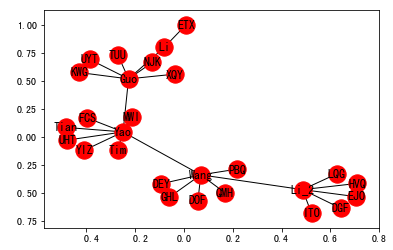

In [229]:
nx.draw_networkx(social_network)

In [240]:
sorted(nx.pagerank(social_network).items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.14018616244938112),
 ('Guo', 0.12625952492883674),
 ('Wang', 0.12354105488402628),
 ('Li_2', 0.11100157862592008),
 ('Li', 0.04009295437632798),
 ('ETX', 0.022595018111845305),
 ('DGF', 0.021279981196290158),
 ('HVQ', 0.021279981196290158),
 ('LQG', 0.021279981196290158),
 ('ITO', 0.021279981196290158),
 ('EJO', 0.021279981196290158),
 ('NJK', 0.02088716348418851),
 ('XQY', 0.02088716348418851),
 ('UYT', 0.02088716348418851),
 ('TUU', 0.02088716348418851),
 ('KWG', 0.02088716348418851),
 ('DOF', 0.020557581368083087),
 ('PBQ', 0.020557581368083087),
 ('QMH', 0.020557581368083087),
 ('GHL', 0.020557581368083087),
 ('DEY', 0.020557581368083087),
 ('Tian', 0.020450012730142263),
 ('Tim', 0.020450012730142263),
 ('FCS', 0.020450012730142263),
 ('UHT', 0.020450012730142263),
 ('YIZ', 0.020450012730142263),
 ('MWI', 0.020450012730142263)]

## Summary

1. Build A Search Engine from Zero
2. Inverse Index -> quick retrieval 
3. Tfidf -> Similarity Ranking
4. PageRank -> Web Page Importance 

##### distributed python programming  https://p16.praetorian.com/blog/multi-core-and-distributed-programming-in-python